### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6"> Import Libraries

In [6]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns

from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression

from sklearn import metrics, model_selection
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,roc_auc_score,roc_curve, precision_recall_curve

from sklearn.model_selection import train_test_split, GridSearchCV


%matplotlib inline
sns.set(color_codes=True)
sns.set_palette('Accent_r')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.expand_frame_repr', False)

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6"> Load Dataset

In [5]:
df = pd.read_csv('Comp_Fin_Data.csv')
df.head()

Num  Networth Next Year  Total assets  Net worth  Total income  Change in stock  Total expenses  Profit after tax  PBDITA    PBT  Cash profit  PBDITA as % of total income  PBT as % of total income  PAT as % of total income  Cash profit as % of total income  PAT as % of net worth   Sales  Income from fincial services  Other income  Total capital  Reserves and funds  Borrowings  Current liabilities & provisions  Deferred tax liability  Shareholders funds  Cumulative retained profits  Capital employed  TOL/TNW  Total term liabilities / tangible net worth  Contingent liabilities / Net worth (%)  Contingent liabilities  Net fixed assets  Investments  Current assets  Net working capital  Quick ratio (times)  Current ratio (times)  Debt to equity ratio (times)  Cash to current liabilities (times)  Cash to average cost of sales per day  Creditors turnover  Debtors turnover  Finished goods turnover  WIP turnover  Raw material turnover  Shares outstanding  Equity face value    EPS  Adjusted EPS  Total liabilities  PE on BSE
0    1               395.3         827.6      336.5         534.1             13.5           508.7              38.9   124.4   64.6         95.2                        23.29                     12.10                      7.28                             17.82                  12.27   533.5                           0.6           NaN           87.6               249.0       390.7                              43.9                    56.4               336.5                        248.9             727.2     1.28                                         0.99                                  186.21                   626.6             461.1         18.1           257.6                163.1                 0.99                   2.52                          1.16                                 0.06                                   5.41               11.60              5.65                     3.99          3.37                  14.87           8760056.0               10.0   4.44          4.44              827.6        NaN
1    2                36.2          67.7       24.3         137.9             -3.7           131.0               3.2     5.5    1.0          3.8                         3.99                      0.73                      2.32                              2.76                   0.00   135.5                           NaN           0.2           11.9                 4.3        16.6                              23.7                     3.1                24.3                         -8.2              40.9     1.53                                         0.21                                   47.74                    11.6              18.5          0.2            39.0                  3.9                 0.67                   1.11                          0.68                                 0.02                                   1.62                 NaN               NaN                      NaN           NaN                    NaN                 NaN                NaN   0.00          0.00               67.7        NaN
2    3                84.0         238.4       78.9         331.2            -18.1           309.2               3.9    25.8   10.5          9.4                         7.79                      3.17                      1.18                              2.84                   5.07   330.6                           0.6           NaN           25.0                56.7        44.7                             102.2                     9.8                78.9                         53.1             123.6     1.70                                         0.33                                   30.42                    24.0              56.8          0.2           158.3                 38.3                 1.11                   1.31                          0.57                                 0.19                                  26.42                2.24              2.51                    17.6

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6"> Renaming Column Names

In [7]:
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/', '_to_').str.replace('[', '_').str.replace(']', '').str.replace('-', '_')

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6"> Basic Exploration

In [13]:
print('Number of Rows(Companies) =', df.shape[0])
print('Number of Columns =', df.shape[1])

Number of Rows(Companies) = 4256
Number of Columns = 51


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Num                                             4256 non-null   int64  
 1   Networth_Next_Year                              4256 non-null   float64
 2   Total_assets                                    4256 non-null   float64
 3   Net_worth                                       4256 non-null   float64
 4   Total_income                                    4025 non-null   float64
 5   Change_in_stock                                 3706 non-null   float64
 6   Total_expenses                                  4091 non-null   float64
 7   Profit_after_tax                                4102 non-null   float64
 8   PBDITA                                          4102 non-null   float64
 9   PBT                                      

In [15]:
df.shape

(4256, 51)

In [16]:
df.head()

Num  Networth_Next_Year  Total_assets  Net_worth  Total_income  Change_in_stock  Total_expenses  Profit_after_tax  PBDITA    PBT  Cash_profit  PBDITA_as_perc_of_total_income  PBT_as_perc_of_total_income  PAT_as_perc_of_total_income  Cash_profit_as_perc_of_total_income  PAT_as_perc_of_net_worth   Sales  Income_from_fincial_services  Other_income  Total_capital  Reserves_and_funds  Borrowings  Current_liabilities_&_provisions  Deferred_tax_liability  Shareholders_funds  Cumulative_retained_profits  Capital_employed  TOL_to_TNW  Total_term_liabilities__to__tangible_net_worth  Contingent_liabilities__to__Net_worth_perc  Contingent_liabilities  Net_fixed_assets  Investments  Current_assets  Net_working_capital  Quick_ratio_times  Current_ratio_times  Debt_to_equity_ratio_times  Cash_to_current_liabilities_times  Cash_to_average_cost_of_sales_per_day  Creditors_turnover  Debtors_turnover  Finished_goods_turnover  WIP_turnover  Raw_material_turnover  Shares_outstanding  Equity_face_value    EPS  Adjusted_EPS  Total_liabilities  PE_on_BSE
0    1               395.3         827.6      336.5         534.1             13.5           508.7              38.9   124.4   64.6         95.2                           23.29                        12.10                         7.28                                17.82                     12.27   533.5                           0.6           NaN           87.6               249.0       390.7                              43.9                    56.4               336.5                        248.9             727.2        1.28                                            0.99                                      186.21                   626.6             461.1         18.1           257.6                163.1               0.99                 2.52                        1.16                               0.06                                   5.41               11.60              5.65                     3.99          3.37                  14.87           8760056.0               10.0   4.44          4.44              827.6        NaN
1    2                36.2          67.7       24.3         137.9             -3.7           131.0               3.2     5.5    1.0          3.8                            3.99                         0.73                         2.32                                 2.76                      0.00   135.5                           NaN           0.2           11.9                 4.3        16.6                              23.7                     3.1                24.3                         -8.2              40.9        1.53                                            0.21                                       47.74                    11.6              18.5          0.2            39.0                  3.9               0.67                 1.11                        0.68                               0.02                                   1.62                 NaN               NaN                      NaN           NaN                    NaN                 NaN                NaN   0.00          0.00               67.7        NaN
2    3                84.0         238.4       78.9         331.2            -18.1           309.2               3.9    25.8   10.5          9.4                            7.79                         3.17                         1.18                                 2.84                      5.07   330.6                           0.6           NaN           25.0                56.7        44.7                             102.2                     9.8                78.9                         53.1             123.6        1.70                                            0.33                                       30.42                    24.0              56.8          0.2           158.3                 38.3               1.11                 1.31                        0.57                               0.19                                 

In [17]:
df.describe().T

count          mean           std           min          25%          50%           75%           max
Num                                             4256.0  2.128500e+03  1.228746e+03  1.000000e+00     1064.750     2128.500  3.192250e+03  4.256000e+03
Networth_Next_Year                              4256.0  1.344741e+03  1.593674e+04 -7.426560e+04        3.975       72.100  3.308250e+02  8.057734e+05
Total_assets                                    4256.0  3.573617e+03  3.007444e+04  1.000000e-01       91.300      315.500  1.120800e+03  1.176509e+06
Net_worth                                       4256.0  1.351950e+03  1.296131e+04  0.000000e+00       31.475      104.800  3.898500e+02  6.131516e+05
Total_income                                    4025.0  4.688190e+03  5.391895e+04  0.000000e+00      107.100      455.100  1.485000e+03  2.442828e+06
Change_in_stock                                 3706.0  4.370248e+01  4.369150e+02 -3.029400e+03       -1.800        1.600  1.840000e+01  1.418550e+04
Total_expenses                                  4091.0  4.356301e+03  5.139809e+04 -1.000000e-01       96.800      426.800  1.395700e+03  2.366035e+06
Profit_after_tax                                4102.0  2.950506e+02  3.079902e+03 -3.908300e+03        0.500        9.000  5.330000e+01  1.194391e+05
PBDITA                                          4102.0  6.059406e+02  5.646231e+03 -4.407000e+02        6.925       36.900  1.587000e+02  2.085765e+05
PBT                                             4102.0  4.102590e+02  4.217415e+03 -3.894800e+03        0.800       12.600  7.417500e+01  1.452926e+05
Cash_profit                                     4102.0  4.082675e+02  4.143926e+03 -2.245700e+03        2.900       19.400  9.625000e+01  1.769118e+05
PBDITA_as_perc_of_total_income                  4177.0  3.179892e+00  1.722566e+02 -6.400000e+03        4.970        9.680  1.647000e+01  1.000000e+02
PBT_as_perc_of_total_income                     4177.0 -1.819683e+01  4.199111e+02 -2.134000e+04        0.560        3.340  8.940000e+00  1.000000e+02
PAT_as_perc_of_total_income                     4177.0 -2.003367e+01  4.235762e+02 -2.134000e+04        0.350        2.370  6.420000e+00  1.500000e+02
Cash_profit_as_perc_of_total_income             4177.0 -9.021278e+00  2.999574e+02 -1.502000e+04        2.000        5.660  1.073000e+01  1.000000e+02
PAT_as_perc_of_net_worth                        4256.0  1.016786e+01  6.153240e+01 -7.487200e+02        0.000        8.040  2.020250e+01  2.466670e+03
Sales                                           3951.0  4.645685e+03  5.308090e+04  1.000000e-01      113.350      468.600  1.481200e+03  2.384984e+06
Income_from_fincial_services                    3145.0  8.136006e+01  1.042759e+03  0.000000e+00        0.500        1.900  9.800000e+00  5.193820e+04
Other_income                                    2700.0  5.595289e+01  1.178415e+03  0.000000e+00        0.400        1.500  6.200000e+00  4.285670e+04
Total_capital                                   4251.0  2.245577e+02  1.684951e+03  1.000000e-01       13.200       42.600  1.031500e+02  7.827320e+04
Reserves_and_funds                              4158.0  1.210562e+03  1.281623e+04 -6.525900e+03        5.300       55.150  2.825250e+02  6.251378e+05
Borrowings                                      3825.0  1.176248e+03  8.581249e+03  1.000000e-01       24.400       99.800  3.583000e+02  2.782573e+05
Current_liabilities_&_provisions                4146.0  9.606314e+02  9.140536e+03  1.000000e-01       17.500       70.300  2.659250e+02  3.522403e+05
Deferred_tax_liability                          2887.0  2.344951e+02  2.106253e+03  1.000000e-01        3.200       13.500  5.130000e+01  7.279660e+04
Shareholders_funds                              4256.0  1.376487e+03  1.301069e+04  0.000000e+00       32.300      107.600  4.089000e+02  6.131516e+05
Cumulative_retained_profits                     4211.0  9.371820e+02  9.853096e+03 -6.534300e+03        1.100       37.400 

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6"> Checking Duplicates

In [18]:
print('Number of Duplicates =', df.duplicated().sum().sum())

Number of Duplicates = 0


### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6"> Creating Target/Response Variable

* We consider 'Networth Next Year' as our Default Variable
* SO, we call negative values as Default = 1
* And, positive values as Default = 0

In [20]:
df_orig = df.copy()
df['default'] = np.where(df['Networth_Next_Year']>=0, 0, 1)
df[['default', 'Networth_Next_Year']].head().to_csv('target_head.csv')
df[['default', 'Networth_Next_Year']].tail().to_csv('target_tail.csv')

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#9B59B6"> Dropping variable 'Networth Next Year'

In [21]:
df.drop('Networth_Next_Year', axis=1, inplace=True)
df.head()

Num  Total_assets  Net_worth  Total_income  Change_in_stock  Total_expenses  Profit_after_tax  PBDITA    PBT  Cash_profit  PBDITA_as_perc_of_total_income  PBT_as_perc_of_total_income  PAT_as_perc_of_total_income  Cash_profit_as_perc_of_total_income  PAT_as_perc_of_net_worth   Sales  Income_from_fincial_services  Other_income  Total_capital  Reserves_and_funds  Borrowings  Current_liabilities_&_provisions  Deferred_tax_liability  Shareholders_funds  Cumulative_retained_profits  Capital_employed  TOL_to_TNW  Total_term_liabilities__to__tangible_net_worth  Contingent_liabilities__to__Net_worth_perc  Contingent_liabilities  Net_fixed_assets  Investments  Current_assets  Net_working_capital  Quick_ratio_times  Current_ratio_times  Debt_to_equity_ratio_times  Cash_to_current_liabilities_times  Cash_to_average_cost_of_sales_per_day  Creditors_turnover  Debtors_turnover  Finished_goods_turnover  WIP_turnover  Raw_material_turnover  Shares_outstanding  Equity_face_value    EPS  Adjusted_EPS  Total_liabilities  PE_on_BSE  default
0    1         827.6      336.5         534.1             13.5           508.7              38.9   124.4   64.6         95.2                           23.29                        12.10                         7.28                                17.82                     12.27   533.5                           0.6           NaN           87.6               249.0       390.7                              43.9                    56.4               336.5                        248.9             727.2        1.28                                            0.99                                      186.21                   626.6             461.1         18.1           257.6                163.1               0.99                 2.52                        1.16                               0.06                                   5.41               11.60              5.65                     3.99          3.37                  14.87           8760056.0               10.0   4.44          4.44              827.6        NaN        0
1    2          67.7       24.3         137.9             -3.7           131.0               3.2     5.5    1.0          3.8                            3.99                         0.73                         2.32                                 2.76                      0.00   135.5                           NaN           0.2           11.9                 4.3        16.6                              23.7                     3.1                24.3                         -8.2              40.9        1.53                                            0.21                                       47.74                    11.6              18.5          0.2            39.0                  3.9               0.67                 1.11                        0.68                               0.02                                   1.62                 NaN               NaN                      NaN           NaN                    NaN                 NaN                NaN   0.00          0.00               67.7        NaN        0
2    3         238.4       78.9         331.2            -18.1           309.2               3.9    25.8   10.5          9.4                            7.79                         3.17                         1.18                                 2.84                      5.07   330.6                           0.6           NaN           25.0                56.7        44.7                             102.2                     9.8                78.9                         53.1             123.6        1.70                                            0.33                                       30.42                    24.0              56.8          0.2           158.3                 38.3               1.11                 1.31                        0.57                               0.19                                  26.42                2.24              2.51         

In [22]:
df.shape

(4256, 51)

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6"> Missing Value Treatment

In [24]:

df.isnull().sum()

Num                                                  0
Total_assets                                         0
Net_worth                                            0
Total_income                                       231
Change_in_stock                                    550
Total_expenses                                     165
Profit_after_tax                                   154
PBDITA                                             154
PBT                                                154
Cash_profit                                        154
PBDITA_as_perc_of_total_income                      79
PBT_as_perc_of_total_income                         79
PAT_as_perc_of_total_income                         79
Cash_profit_as_perc_of_total_income                 79
PAT_as_perc_of_net_worth                             0
Sales                                              305
Income_from_fincial_services                      1111
Other_income                                      1556
Total_capital                                        5
Reserves_and_funds                                  98
Borrowings                                         431
Current_liabilities_&_provisions                   110
Deferred_tax_liability                            1369
Shareholders_funds                                   0
Cumulative_retained_profits                         45
Capital_employed                                     0
TOL_to_TNW                                           0
Total_term_liabilities__to__tangible_net_worth       0
Contingent_liabilities__to__Net_worth_perc           0
Contingent_liabilities                            1402
Net_fixed_assets                                   132
Investments                                       1715
Current_assets                                      80
Net_working_capital                                 37
Quick_ratio_times                                  105
Current_ratio_times                                105
Debt_to_equity_ratio_times                           0
Cash_to_current_liabilities_times                  105
Cash_to_average_cost_of_sales_per_day              100
Creditors_turnover                                 391
Debtors_turnover                                   385
Finished_goods_turnover                            874
WIP_turnover                                       764
Raw_material_turnover                              428
Shares_outstanding                                 810
Equity_face_value                                  810
EPS                                                  0
Adjusted_EPS                                         0
Total_liabilities                                    0
PE_on_BSE                                         2627
default                                              0
dtype: int64

In [25]:
print('PERCENT OF MISSING VALUES TO THE WHOLE DATA --->')
print('')
round(df.isna().sum()*100/df.shape[0], 2)

PERCENT OF MISSING VALUES TO THE WHOLE DATA --->



Num                                                0.00
Total_assets                                       0.00
Net_worth                                          0.00
Total_income                                       5.43
Change_in_stock                                   12.92
Total_expenses                                     3.88
Profit_after_tax                                   3.62
PBDITA                                             3.62
PBT                                                3.62
Cash_profit                                        3.62
PBDITA_as_perc_of_total_income                     1.86
PBT_as_perc_of_total_income                        1.86
PAT_as_perc_of_total_income                        1.86
Cash_profit_as_perc_of_total_income                1.86
PAT_as_perc_of_net_worth                           0.00
Sales                                              7.17
Income_from_fincial_services                      26.10
Other_income                                      36.56
Total_capital                                      0.12
Reserves_and_funds                                 2.30
Borrowings                                        10.13
Current_liabilities_&_provisions                   2.58
Deferred_tax_liability                            32.17
Shareholders_funds                                 0.00
Cumulative_retained_profits                        1.06
Capital_employed                                   0.00
TOL_to_TNW                                         0.00
Total_term_liabilities__to__tangible_net_worth     0.00
Contingent_liabilities__to__Net_worth_perc         0.00
Contingent_liabilities                            32.94
Net_fixed_assets                                   3.10
Investments                                       40.30
Current_assets                                     1.88
Net_working_capital                                0.87
Quick_ratio_times                                  2.47
Current_ratio_times                                2.47
Debt_to_equity_ratio_times                         0.00
Cash_to_current_liabilities_times                  2.47
Cash_to_average_cost_of_sales_per_day              2.35
Creditors_turnover                                 9.19
Debtors_turnover                                   9.05
Finished_goods_turnover                           20.54
WIP_turnover                                      17.95
Raw_material_turnover                             10.06
Shares_outstanding                                19.03
Equity_face_value                                 19.03
EPS                                                0.00
Adjusted_EPS                                       0.00
Total_liabilities                                  0.00
PE_on_BSE                                         61.72
default                                            0.00
dtype: float64

In [26]:
print('Percent of Total Missing Values in the data =' ,(df.isna().sum().sum()*100/df.size).round(2), "%")

Percent of Total Missing Values in the data = 8.19 %


### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6"> Checking Zero Values

In [27]:
(df.drop('default', axis=1)==0).sum().sort_values(ascending=False)

Contingent_liabilities__to__Net_worth_perc        1402
Total_term_liabilities__to__tangible_net_worth     733
Adjusted_EPS                                       720
EPS                                                719
PAT_as_perc_of_net_worth                           537
Debt_to_equity_ratio_times                         460
Raw_material_turnover                              424
Cash_to_current_liabilities_times                  319
Debtors_turnover                                   247
PAT_as_perc_of_total_income                        216
PBT_as_perc_of_total_income                        215
Creditors_turnover                                 208
Cash_to_average_cost_of_sales_per_day              197
Cash_profit_as_perc_of_total_income                196
PBDITA_as_perc_of_total_income                     187
TOL_to_TNW                                          88
Change_in_stock                                     87
PBT                                                 78
Profit_after_tax                                    78
Quick_ratio_times                                   70
Cash_profit                                         69
PBDITA                                              60
Current_ratio_times                                 51
Investments                                         20
WIP_turnover                                        17
Net_working_capital                                 15
Cumulative_retained_profits                         12
Finished_goods_turnover                             10
Net_fixed_assets                                     7
Reserves_and_funds                                   5
Total_expenses                                       5
Other_income                                         3
Total_income                                         2
Net_worth                                            1
Income_from_fincial_services                         1
Shareholders_funds                                   1
Capital_employed                                     1
Total_liabilities                                    0
Shares_outstanding                                   0
Equity_face_value                                    0
Num                                                  0
Current_assets                                       0
Contingent_liabilities                               0
Total_assets                                         0
Deferred_tax_liability                               0
Current_liabilities_&_provisions                     0
Borrowings                                           0
Total_capital                                        0
Sales                                                0
PE_on_BSE                                            0
dtype: int64

In [28]:
round(((df.drop('default', axis=1)==0).sum())*100/df.shape[0], 2).sort_values(ascending=False)

Contingent_liabilities__to__Net_worth_perc        32.94
Total_term_liabilities__to__tangible_net_worth    17.22
Adjusted_EPS                                      16.92
EPS                                               16.89
PAT_as_perc_of_net_worth                          12.62
Debt_to_equity_ratio_times                        10.81
Raw_material_turnover                              9.96
Cash_to_current_liabilities_times                  7.50
Debtors_turnover                                   5.80
PAT_as_perc_of_total_income                        5.08
PBT_as_perc_of_total_income                        5.05
Creditors_turnover                                 4.89
Cash_to_average_cost_of_sales_per_day              4.63
Cash_profit_as_perc_of_total_income                4.61
PBDITA_as_perc_of_total_income                     4.39
TOL_to_TNW                                         2.07
Change_in_stock                                    2.04
PBT                                                1.83
Profit_after_tax                                   1.83
Quick_ratio_times                                  1.64
Cash_profit                                        1.62
PBDITA                                             1.41
Current_ratio_times                                1.20
Investments                                        0.47
WIP_turnover                                       0.40
Net_working_capital                                0.35
Cumulative_retained_profits                        0.28
Finished_goods_turnover                            0.23
Net_fixed_assets                                   0.16
Reserves_and_funds                                 0.12
Total_expenses                                     0.12
Other_income                                       0.07
Total_income                                       0.05
Net_worth                                          0.02
Income_from_fincial_services                       0.02
Shareholders_funds                                 0.02
Capital_employed                                   0.02
Total_liabilities                                  0.00
Shares_outstanding                                 0.00
Equity_face_value                                  0.00
Num                                                0.00
Current_assets                                     0.00
Contingent_liabilities                             0.00
Total_assets                                       0.00
Deferred_tax_liability                             0.00
Current_liabilities_&_provisions                   0.00
Borrowings                                         0.00
Total_capital                                      0.00
Sales                                              0.00
PE_on_BSE                                          0.00
dtype: float64

In [29]:
((df.drop('default', axis=1)==0).sum().sum())*100/df.drop('default', axis=1).size

3.506109022556391

* There are many variables with a lot of zero values (15.1%)
* They may be correct values at times, but also seems like a missing data replaced with zero
* Let us for this analysis, decide to ignore and drop all variables with number of zeros greater than 30%
* We drop the top 9 variables from above

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#9B59B6"> Dropping Variables with zeros greater than 30%

In [31]:
df.columns

Index(['Num', 'Total_assets', 'Net_worth', 'Total_income', 'Change_in_stock', 'Total_expenses', 'Profit_after_tax', 'PBDITA', 'PBT', 'Cash_profit', 'PBDITA_as_perc_of_total_income', 'PBT_as_perc_of_total_income', 'PAT_as_perc_of_total_income', 'Cash_profit_as_perc_of_total_income', 'PAT_as_perc_of_net_worth', 'Sales', 'Income_from_fincial_services', 'Other_income', 'Total_capital', 'Reserves_and_funds', 'Borrowings', 'Current_liabilities_&_provisions', 'Deferred_tax_liability', 'Shareholders_funds', 'Cumulative_retained_profits', 'Capital_employed', 'TOL_to_TNW', 'Total_term_liabilities__to__tangible_net_worth', 'Contingent_liabilities__to__Net_worth_perc', 'Contingent_liabilities', 'Net_fixed_assets', 'Investments', 'Current_assets', 'Net_working_capital', 'Quick_ratio_times', 'Current_ratio_times', 'Debt_to_equity_ratio_times', 'Cash_to_current_liabilities_times', 'Cash_to_average_cost_of_sales_per_day', 'Creditors_turnover', 'Debtors_turnover', 'Finished_goods_turnover',
       'WIP

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6"> Converting other Zeros to Missing Values for Treatment

In [32]:
df1 = df.drop('default', axis=1)
df1[df1==0] = np.nan
(df1==0).sum()
(df1==0).shape
df1.shape

Num                                               0
Total_assets                                      0
Net_worth                                         0
Total_income                                      0
Change_in_stock                                   0
Total_expenses                                    0
Profit_after_tax                                  0
PBDITA                                            0
PBT                                               0
Cash_profit                                       0
PBDITA_as_perc_of_total_income                    0
PBT_as_perc_of_total_income                       0
PAT_as_perc_of_total_income                       0
Cash_profit_as_perc_of_total_income               0
PAT_as_perc_of_net_worth                          0
Sales                                             0
Income_from_fincial_services                      0
Other_income                                      0
Total_capital                                     0
Reserves_and_funds                                0
Borrowings                                        0
Current_liabilities_&_provisions                  0
Deferred_tax_liability                            0
Shareholders_funds                                0
Cumulative_retained_profits                       0
Capital_employed                                  0
TOL_to_TNW                                        0
Total_term_liabilities__to__tangible_net_worth    0
Contingent_liabilities__to__Net_worth_perc        0
Contingent_liabilities                            0
Net_fixed_assets                                  0
Investments                                       0
Current_assets                                    0
Net_working_capital                               0
Quick_ratio_times                                 0
Current_ratio_times                               0
Debt_to_equity_ratio_times                        0
Cash_to_current_liabilities_times                 0
Cash_to_average_cost_of_sales_per_day             0
Creditors_turnover                                0
Debtors_turnover                                  0
Finished_goods_turnover                           0
WIP_turnover                                      0
Raw_material_turnover                             0
Shares_outstanding                                0
Equity_face_value                                 0
EPS                                               0
Adjusted_EPS                                      0
Total_liabilities                                 0
PE_on_BSE                                         0
dtype: int64

(4256, 50)

(4256, 50)

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6"> Visualising Missing Values

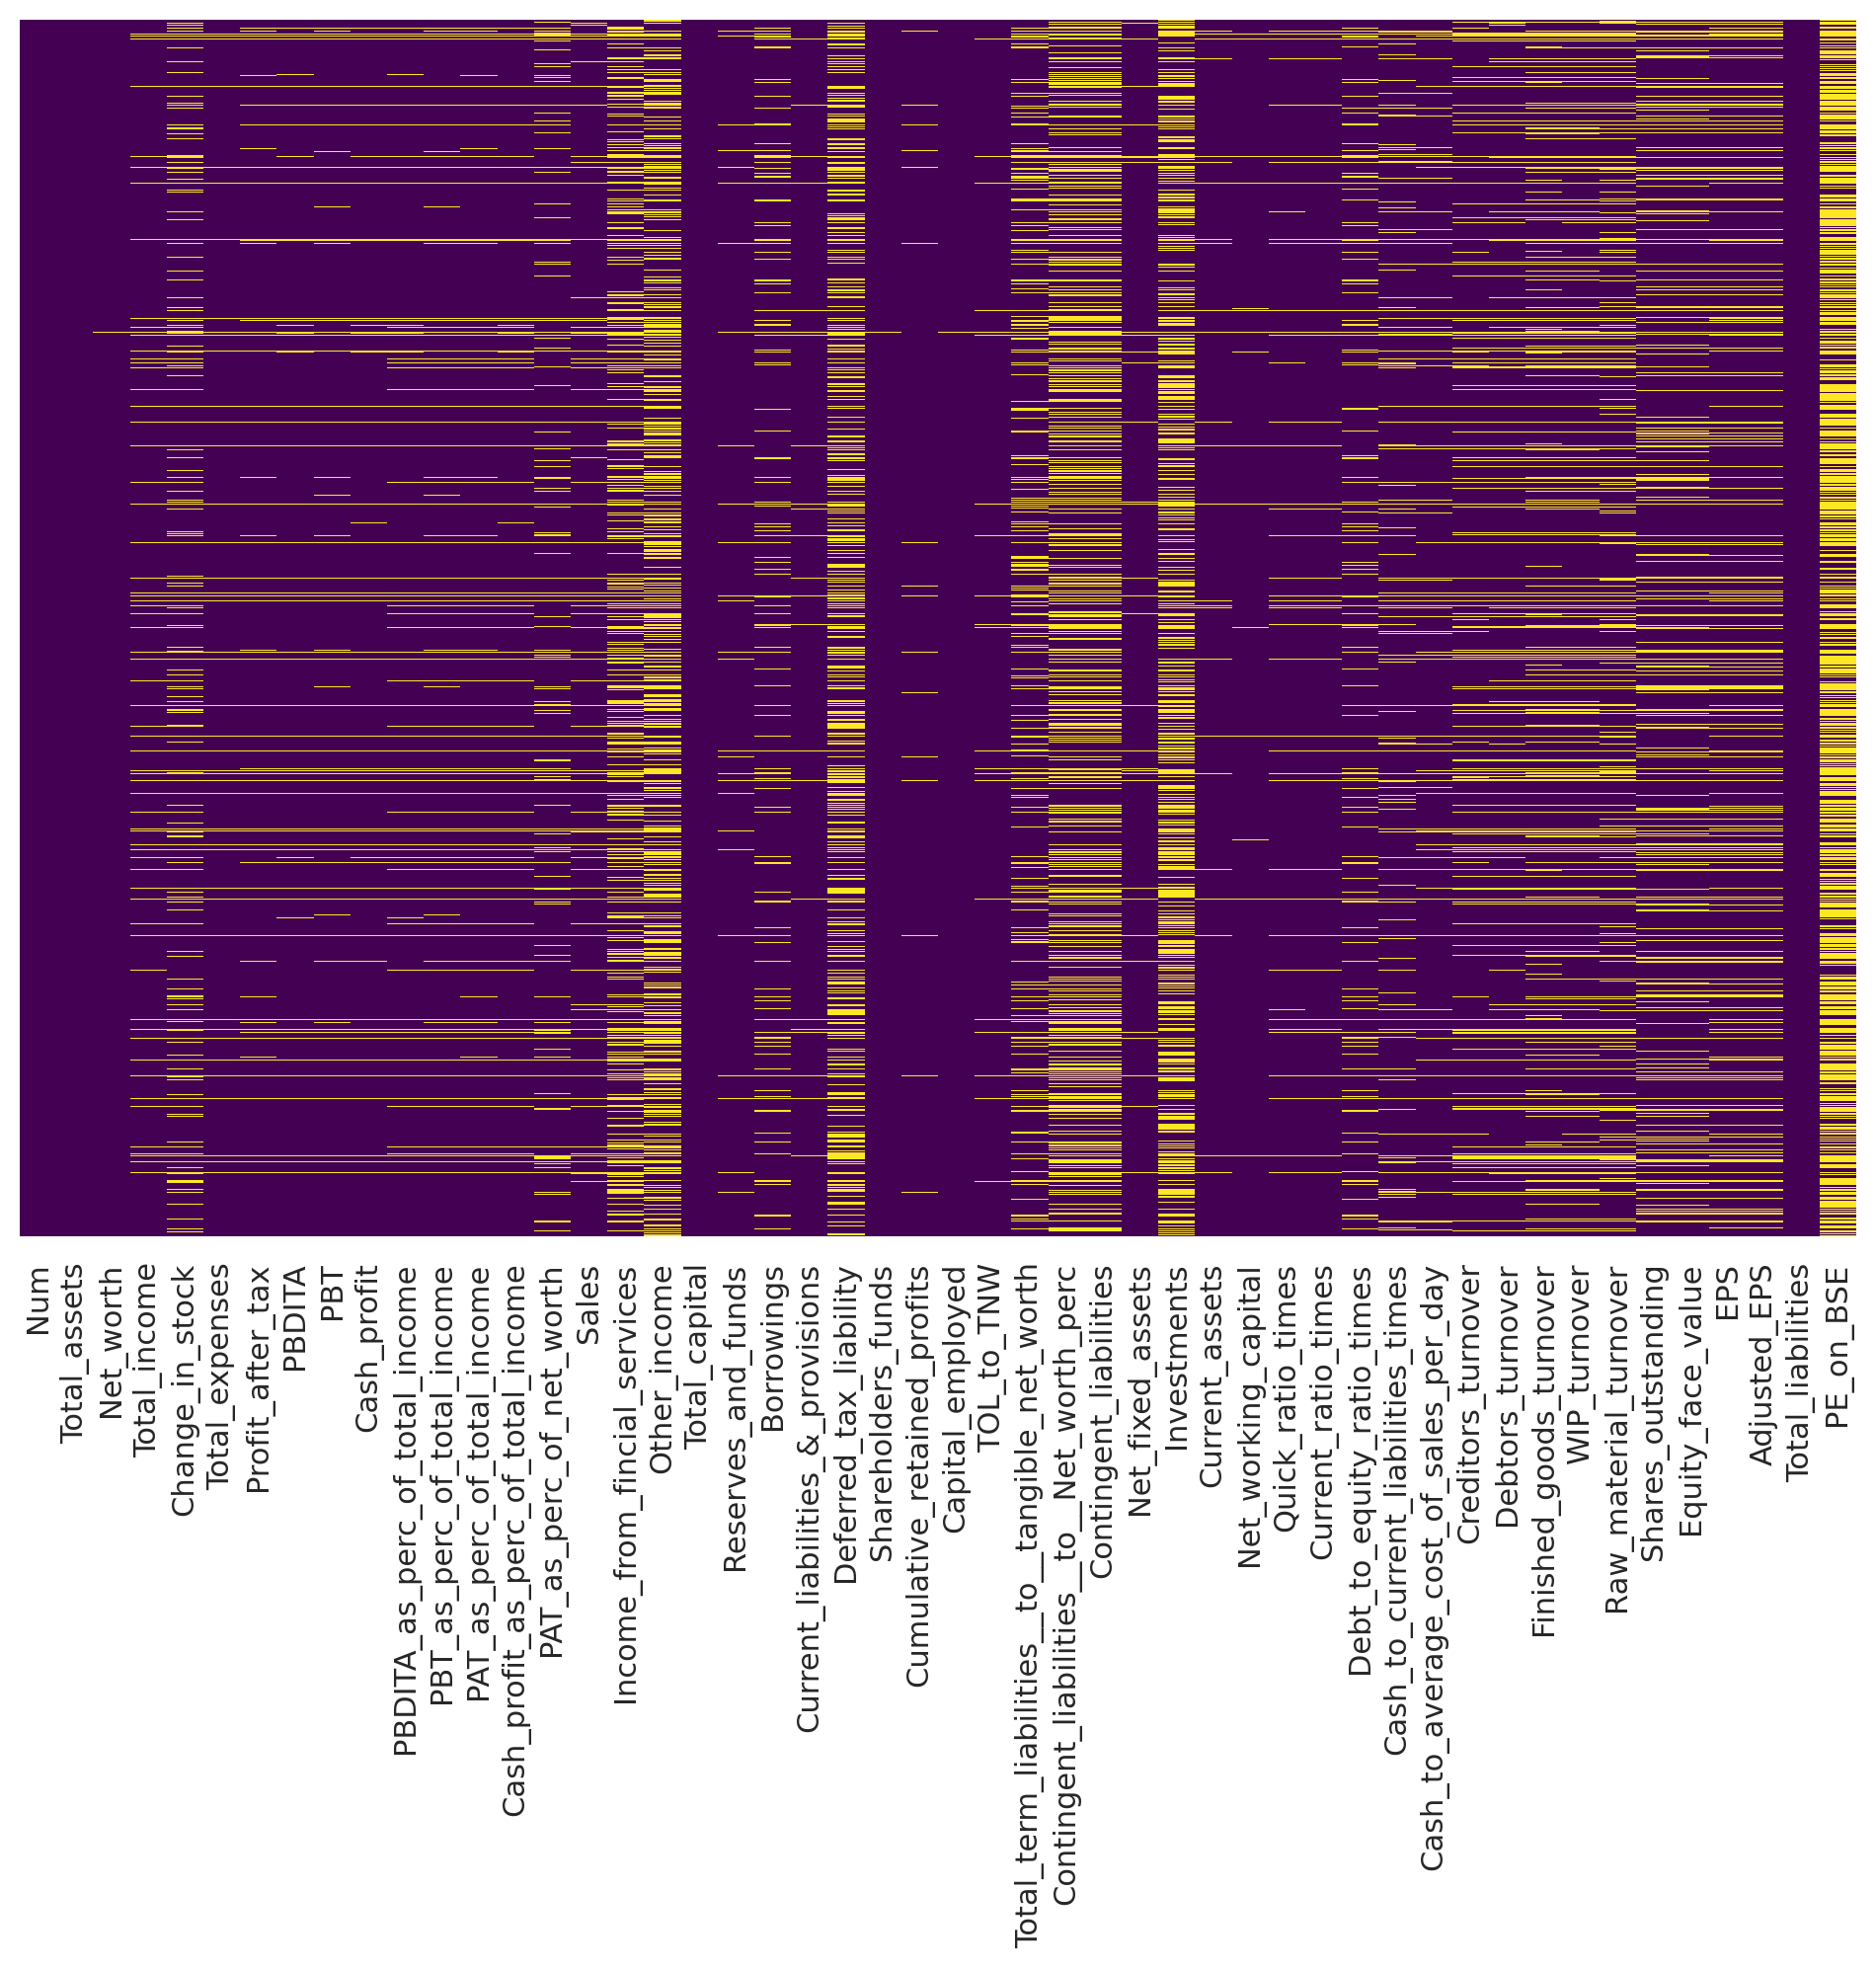

In [37]:
plt.figure(figsize = (12,8))
sns.heatmap(df1.isnull(), cbar = False, cmap = 'viridis', yticklabels = False)
plt.savefig('missing_vis.jpg', bbox_inches='tight');
plt.show();

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6"> Checking Missing Values by Rows

In [38]:
df1['default'] = df['default']
df_rows = df1[df1.isna().sum(axis=1)>5]
df_rows.shape

(1418, 51)

In [39]:
df1['default'].value_counts()
df_rows['default'].value_counts()

default
0    4022
1     234
Name: count, dtype: int64

default
0    1280
1     138
Name: count, dtype: int64

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6"> Split Target and Predictor Variables

In [40]:
df_x = df1.drop('default', axis=1)
df_y = df1['default']

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6"> Impute Null Values using KNN Imputer
    n_neighbors=10

In [41]:
df1.isna().sum()

Num                                                  0
Total_assets                                         0
Net_worth                                            1
Total_income                                       233
Change_in_stock                                    637
Total_expenses                                     170
Profit_after_tax                                   232
PBDITA                                             214
PBT                                                232
Cash_profit                                        223
PBDITA_as_perc_of_total_income                     266
PBT_as_perc_of_total_income                        294
PAT_as_perc_of_total_income                        295
Cash_profit_as_perc_of_total_income                275
PAT_as_perc_of_net_worth                           537
Sales                                              305
Income_from_fincial_services                      1112
Other_income                                      1559
Total_capital                                        5
Reserves_and_funds                                 103
Borrowings                                         431
Current_liabilities_&_provisions                   110
Deferred_tax_liability                            1369
Shareholders_funds                                   1
Cumulative_retained_profits                         57
Capital_employed                                     1
TOL_to_TNW                                          88
Total_term_liabilities__to__tangible_net_worth     733
Contingent_liabilities__to__Net_worth_perc        1402
Contingent_liabilities                            1402
Net_fixed_assets                                   139
Investments                                       1735
Current_assets                                      80
Net_working_capital                                 52
Quick_ratio_times                                  175
Current_ratio_times                                156
Debt_to_equity_ratio_times                         460
Cash_to_current_liabilities_times                  424
Cash_to_average_cost_of_sales_per_day              297
Creditors_turnover                                 599
Debtors_turnover                                   632
Finished_goods_turnover                            884
WIP_turnover                                       781
Raw_material_turnover                              852
Shares_outstanding                                 810
Equity_face_value                                  810
EPS                                                719
Adjusted_EPS                                       720
Total_liabilities                                    0
PE_on_BSE                                         2627
default                                              0
dtype: int64

In [42]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=10)

df_imputed = pd.DataFrame(imputer.fit_transform(df1), columns = df1.columns)

df_imputed.isnull().sum()

Num                                               0
Total_assets                                      0
Net_worth                                         0
Total_income                                      0
Change_in_stock                                   0
Total_expenses                                    0
Profit_after_tax                                  0
PBDITA                                            0
PBT                                               0
Cash_profit                                       0
PBDITA_as_perc_of_total_income                    0
PBT_as_perc_of_total_income                       0
PAT_as_perc_of_total_income                       0
Cash_profit_as_perc_of_total_income               0
PAT_as_perc_of_net_worth                          0
Sales                                             0
Income_from_fincial_services                      0
Other_income                                      0
Total_capital                                     0
Reserves_and_funds                                0
Borrowings                                        0
Current_liabilities_&_provisions                  0
Deferred_tax_liability                            0
Shareholders_funds                                0
Cumulative_retained_profits                       0
Capital_employed                                  0
TOL_to_TNW                                        0
Total_term_liabilities__to__tangible_net_worth    0
Contingent_liabilities__to__Net_worth_perc        0
Contingent_liabilities                            0
Net_fixed_assets                                  0
Investments                                       0
Current_assets                                    0
Net_working_capital                               0
Quick_ratio_times                                 0
Current_ratio_times                               0
Debt_to_equity_ratio_times                        0
Cash_to_current_liabilities_times                 0
Cash_to_average_cost_of_sales_per_day             0
Creditors_turnover                                0
Debtors_turnover                                  0
Finished_goods_turnover                           0
WIP_turnover                                      0
Raw_material_turnover                             0
Shares_outstanding                                0
Equity_face_value                                 0
EPS                                               0
Adjusted_EPS                                      0
Total_liabilities                                 0
PE_on_BSE                                         0
default                                           0
dtype: int64

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6"> Outlier Treatment using IQR method

In [43]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [44]:
df_x = df_imputed.drop('default', axis=1)
df_y = df_imputed['default']

In [45]:
for column in df_x.columns:
    lr,ur=remove_outlier(df_x[column])
    df_x[column]=np.where(df_x[column]>ur,ur,df_x[column])
    df_x[column]=np.where(df_x[column]<lr,lr,df_x[column])

In [46]:
df = pd.concat([df_x, df_y], axis = 1)

In [47]:
df.shape

(4256, 51)

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6">Correlation Heatmap

In [48]:
#calculate column correlations and make a seaborn heatmap - Before standardisation

plt.figure(figsize=(40,40))
p=sns.heatmap(df_x.corr(), annot=True,cmap='plasma',square=True, fmt='.1g')
plt.savefig('heatmap_dfx_55vars.jpg', bbox_inches='tight');

Output hidden; open in https://colab.research.google.com to view.

* We see a lot of red patches showing high correlation between variables
* This gives rise to issues of Multi-Collinearity
* Lets check for Multi-Collinearity using Variance Inflation Factor

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6"> Check Multi-Colinearity using Variance Inflation Factor

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [50]:
X = df_x.copy()
f = calc_vif(X).sort_values(by = 'VIF', ascending = False)
f

variables         VIF
1                                     Total_assets         inf
48                               Total_liabilities         inf
3                                     Total_income  282.352182
15                                           Sales  259.704825
5                                   Total_expenses  191.505271
23                              Shareholders_funds  123.181111
2                                        Net_worth  109.718244
25                                Capital_employed   83.669827
8                                              PBT   54.082487
6                                 Profit_after_tax   51.110181
7                                           PBDITA   30.596495
45                               Equity_face_value   26.855528
11                     PBT_as_perc_of_total_income   24.178659
12                     PAT_as_perc_of_total_income   22.842299
9                                      Cash_profit   22.817256
32                                  Current_assets   19.141363
21                Current_liabilities_&_provisions   15.658353
19                              Reserves_and_funds   13.206414
46                                             EPS   12.652217
47                                    Adjusted_EPS   11.784966
30                                Net_fixed_assets   10.838088
24                     Cumulative_retained_profits    8.852672
20                                      Borrowings    8.340487
13             Cash_profit_as_perc_of_total_income    7.517175
18                                   Total_capital    6.117583
10                  PBDITA_as_perc_of_total_income    5.893976
22                          Deferred_tax_liability    5.844487
34                               Quick_ratio_times    5.682916
44                              Shares_outstanding    5.339809
35                             Current_ratio_times    4.691081
36                      Debt_to_equity_ratio_times    4.464847
37               Cash_to_current_liabilities_times    4.141068
29                          Contingent_liabilities    3.626918
27  Total_term_liabilities__to__tangible_net_worth    3.493289
38           Cash_to_average_cost_of_sales_per_day    3.250112
26                                      TOL_to_TNW    3.218235
16                    Income_from_fincial_services    2.710184
14                        PAT_as_perc_of_net_worth    2.589761
42                                    WIP_turnover    2.267945
31                                     Investments    2.262957
17                                    Other_income    2.123952
33                             Net_working_capital    2.075949
41                         Finished_goods_turnover    2.024494
28      Contingent_liabilities__to__Net_worth_perc    1.944336
40                                Debtors_turnover    1.726995
39                              Creditors_turnover    1.588710
4                                  Change_in_stock    1.300916
43                           Raw_material_turnover    1.285409
49                                       PE_on_BSE    1.163830
0                                              Num    1.038047

In [51]:
X.shape
X.columns

(4256, 50)

Index(['Num', 'Total_assets', 'Net_worth', 'Total_income', 'Change_in_stock', 'Total_expenses', 'Profit_after_tax', 'PBDITA', 'PBT', 'Cash_profit', 'PBDITA_as_perc_of_total_income', 'PBT_as_perc_of_total_income', 'PAT_as_perc_of_total_income', 'Cash_profit_as_perc_of_total_income', 'PAT_as_perc_of_net_worth', 'Sales', 'Income_from_fincial_services', 'Other_income', 'Total_capital', 'Reserves_and_funds', 'Borrowings', 'Current_liabilities_&_provisions', 'Deferred_tax_liability', 'Shareholders_funds', 'Cumulative_retained_profits', 'Capital_employed', 'TOL_to_TNW', 'Total_term_liabilities__to__tangible_net_worth', 'Contingent_liabilities__to__Net_worth_perc', 'Contingent_liabilities', 'Net_fixed_assets', 'Investments', 'Current_assets', 'Net_working_capital', 'Quick_ratio_times', 'Current_ratio_times', 'Debt_to_equity_ratio_times', 'Cash_to_current_liabilities_times', 'Cash_to_average_cost_of_sales_per_day', 'Creditors_turnover', 'Debtors_turnover', 'Finished_goods_turnover',
       'WIP

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6"> Dropping Variables recursively with VIF greater than 5

* We check VIF of all predictor variables
* We arrange these variables in decreasing order of VIF
* We check if the top variable has VIF > 5
* If yes, then we drop ONLY this Top Variable and check for VIF again
* We run this in a loop and drop variables one by one till we get max VIF < 5

In [52]:
import time
start = time.time()

for i in range(55):
    v = calc_vif(X).sort_values(by = 'VIF', ascending = False)
    if (v.iloc[0,1] > 5):
        X = X.drop(columns=v.iloc[0,0])

end = time.time()
print('Time taken =', end-start)

Time taken = 23.318047285079956


### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#9B59B6"> Check VIF again

In [53]:
calc_vif(X).sort_values(by = 'VIF', ascending = False)


variables       VIF
6                           Deferred_tax_liability  4.917146
11                          Contingent_liabilities  4.900678
14                               Quick_ratio_times  4.896654
8                                       TOL_to_TNW  4.328055
20                              Shares_outstanding  4.092226
9   Total_term_liabilities__to__tangible_net_worth  3.995087
4                     Income_from_fincial_services  3.979468
7                      Cumulative_retained_profits  3.879521
17                                Debtors_turnover  3.788413
0                                              Num  3.508014
16                              Creditors_turnover  3.457683
5                                     Other_income  3.412272
19                           Raw_material_turnover  3.365949
12                                     Investments  3.293901
10      Contingent_liabilities__to__Net_worth_perc  3.278795
2              Cash_profit_as_perc_of_total_income  2.700119
15           Cash_to_average_cost_of_sales_per_day  2.542334
3                         PAT_as_perc_of_net_worth  2.455301
18                         Finished_goods_turnover  2.198639
21                                    Adjusted_EPS  2.053176
22                                       PE_on_BSE  1.829127
13                             Net_working_capital  1.822081
1                                  Change_in_stock  1.343006

In [54]:
X.shape
X.head()

(4256, 23)

Num  Change_in_stock  Cash_profit_as_perc_of_total_income  PAT_as_perc_of_net_worth  Income_from_fincial_services  Other_income  Deferred_tax_liability  Cumulative_retained_profits  TOL_to_TNW  Total_term_liabilities__to__tangible_net_worth  Contingent_liabilities__to__Net_worth_perc  Contingent_liabilities  Investments  Net_working_capital  Quick_ratio_times  Cash_to_average_cost_of_sales_per_day  Creditors_turnover  Debtors_turnover  Finished_goods_turnover  Raw_material_turnover  Shares_outstanding  Adjusted_EPS  PE_on_BSE
0  1.0          13.5000                                17.82                    12.270                          0.60          2.84                    56.4                     248.9000        1.28                                            0.99                                   169.30375                295.2625        18.10             163.1000               0.99                                   5.41              11.600             5.650                    3.990                 14.870           8760056.0         4.440   5101.998
1  2.0          -3.7000                                 2.76                     6.491                          1.05          0.20                     3.1                      -8.2000        1.53                                            0.21                                    47.74000                 11.6000         0.20               3.9000               0.67                                   1.62              20.717             6.715                   19.175                 10.561           2141018.0         5.389     62.444
2  3.0         -18.1000                                 2.84                     5.070                          0.60          3.09                     9.8                      53.1000        1.70                                            0.33                                    30.42000                 24.0000         0.20              38.3000               1.11                                  26.42               2.240             2.510                   17.670                  8.350           3312777.4         5.845     17.336
3  4.0          38.2125                                 2.11                    13.170                          2.00          8.40                     0.1                     506.3375        3.69                                            0.22                                    10.79000                155.7000        68.50             215.7125               0.99                                  15.93               3.480             1.910                   18.140                 11.110          10000000.0        17.600   5101.811
4  5.0           3.4000                                 1.00                    -1.480                          0.20          0.80                     4.3                      35.8000        0.81                                            0.44                                    40.82400                  9.1300         2.75              20.8000               0.35                                   0.85              21.670            25.305                   45.870                 19.930            107315.0        -6.520   5105.303

* After dropping variables one by one with high VIF (>5)
* We are left with final 27 predictor variables for modelling

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6"> Scale the data using Standard Scaler

In [55]:
sc = StandardScaler()
scaled_x = pd.DataFrame(sc.fit_transform(X), columns=X.columns)
scaled_x.shape
scaled_x.head()

(4256, 23)

Num  Change_in_stock  Cash_profit_as_perc_of_total_income  PAT_as_perc_of_net_worth  Income_from_fincial_services  Other_income  Deferred_tax_liability  Cumulative_retained_profits  TOL_to_TNW  Total_term_liabilities__to__tangible_net_worth  Contingent_liabilities__to__Net_worth_perc  Contingent_liabilities  Investments  Net_working_capital  Quick_ratio_times  Cash_to_average_cost_of_sales_per_day  Creditors_turnover  Debtors_turnover  Finished_goods_turnover  Raw_material_turnover  Shares_outstanding  Adjusted_EPS  PE_on_BSE
0 -1.731644         0.407547                             1.363749                  0.021286                     -0.668850      0.105052                1.064963                     0.627834   -0.419261                                        0.022237                                    2.053040                2.028480    -0.083061             1.292070           0.238330                              -0.662251            0.134401         -0.582978                -0.926422               0.587336            0.280668     -0.172184   1.151463
1 -1.730830        -0.583364                            -0.485902                 -0.292684                     -0.595536     -0.810689               -0.680644                    -0.654606   -0.287961                                       -0.776585                                   -0.089025               -0.663843    -0.792146            -0.425781          -0.307726                              -0.821458            1.219250         -0.435422                -0.473544               0.017498           -0.630089     -0.080146  -0.839075
2 -1.730016        -1.412963                            -0.476076                 -0.369886                     -0.668850      0.191770               -0.461215                    -0.348835   -0.198678                                       -0.653689                                   -0.394220               -0.546151    -0.792146            -0.054587           0.443100                               0.220318           -0.979363         -1.018025                -0.518429              -0.274893           -0.468859     -0.035921  -0.856891
3 -1.729202         1.831260                            -0.565734                  0.070183                     -0.440761      2.033658               -0.778896                     1.911957    0.846465                                       -0.766343                                   -0.740119                0.703852     1.913470             1.859786           0.238330                              -0.220336           -0.831813         -1.101155                -0.504412               0.090100            0.451280      1.104125   1.151389
4 -1.728388        -0.174325                            -0.702063                 -0.725745                     -0.734019     -0.602566               -0.641343                    -0.435129   -0.666103                                       -0.541035                                   -0.210892               -0.687286    -0.691131            -0.243421          -0.853782                              -0.853803            1.332649          2.140222                 0.322609               1.256490           -0.909920     -1.235128   1.152769

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#9B59B6"> Concatenate Predictor and Target Variables for Logistic Regression using Stats Model

In [56]:
df_1 = pd.concat([scaled_x, df_y], axis=1)
df_1.head()
df_1.shape

Num  Change_in_stock  Cash_profit_as_perc_of_total_income  PAT_as_perc_of_net_worth  Income_from_fincial_services  Other_income  Deferred_tax_liability  Cumulative_retained_profits  TOL_to_TNW  Total_term_liabilities__to__tangible_net_worth  Contingent_liabilities__to__Net_worth_perc  Contingent_liabilities  Investments  Net_working_capital  Quick_ratio_times  Cash_to_average_cost_of_sales_per_day  Creditors_turnover  Debtors_turnover  Finished_goods_turnover  Raw_material_turnover  Shares_outstanding  Adjusted_EPS  PE_on_BSE  default
0 -1.731644         0.407547                             1.363749                  0.021286                     -0.668850      0.105052                1.064963                     0.627834   -0.419261                                        0.022237                                    2.053040                2.028480    -0.083061             1.292070           0.238330                              -0.662251            0.134401         -0.582978                -0.926422               0.587336            0.280668     -0.172184   1.151463      0.0
1 -1.730830        -0.583364                            -0.485902                 -0.292684                     -0.595536     -0.810689               -0.680644                    -0.654606   -0.287961                                       -0.776585                                   -0.089025               -0.663843    -0.792146            -0.425781          -0.307726                              -0.821458            1.219250         -0.435422                -0.473544               0.017498           -0.630089     -0.080146  -0.839075      0.0
2 -1.730016        -1.412963                            -0.476076                 -0.369886                     -0.668850      0.191770               -0.461215                    -0.348835   -0.198678                                       -0.653689                                   -0.394220               -0.546151    -0.792146            -0.054587           0.443100                               0.220318           -0.979363         -1.018025                -0.518429              -0.274893           -0.468859     -0.035921  -0.856891      0.0
3 -1.729202         1.831260                            -0.565734                  0.070183                     -0.440761      2.033658               -0.778896                     1.911957    0.846465                                       -0.766343                                   -0.740119                0.703852     1.913470             1.859786           0.238330                              -0.220336           -0.831813         -1.101155                -0.504412               0.090100            0.451280      1.104125   1.151389      0.0
4 -1.728388        -0.174325                            -0.702063                 -0.725745                     -0.734019     -0.602566               -0.641343                    -0.435129   -0.666103                                       -0.541035                                   -0.210892               -0.687286    -0.691131            -0.243421          -0.853782                              -0.853803            1.332649          2.140222                 0.322609               1.256490           -0.909920     -1.235128   1.152769      0.0

(4256, 24)

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6"> Split the whole data into Train and Test 67-33

In [57]:

X_train, X_test, y_train, y_test = train_test_split(scaled_x, df_y,
                                                    test_size = 0.33, random_state=42)

In [58]:
df1_train = pd.concat([X_train, y_train], axis=1)

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6"> Logistic Regression using StatsModel

In [59]:
scaled_x.columns
scaled_x.shape

Index(['Num', 'Change_in_stock', 'Cash_profit_as_perc_of_total_income', 'PAT_as_perc_of_net_worth', 'Income_from_fincial_services', 'Other_income', 'Deferred_tax_liability', 'Cumulative_retained_profits', 'TOL_to_TNW', 'Total_term_liabilities__to__tangible_net_worth', 'Contingent_liabilities__to__Net_worth_perc', 'Contingent_liabilities', 'Investments', 'Net_working_capital', 'Quick_ratio_times', 'Cash_to_average_cost_of_sales_per_day', 'Creditors_turnover', 'Debtors_turnover', 'Finished_goods_turnover', 'Raw_material_turnover', 'Shares_outstanding', 'Adjusted_EPS', 'PE_on_BSE'], dtype='object')

(4256, 23)

### <span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#02A3FF"> MODEL 1

In [60]:
import statsmodels.api as SM

# f1 = 'default ~ Equity_Paid_Up + Total_Debt + Other_Income + Selling_Cost + Adjusted_PAT + CEPS_annualised_Unit_Curr + Cash_Flow_From_Investing_Activities + Cash_Flow_From_Financing_Activities + Cash_Flow_From_Operating_Activities + ROG-Capital_Employed_perc + ROG-Gross_Block_perc + ROG-Net_Sales_perc + ROG-Cost_of_Production_perc + ROG-PAT_perc + Current_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + CPM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Value_of_Output_to_Total_Assets + Value_of_Output_to_Gross_Block + Gross_Block + Net_Working_Capital + Current_Assets + Book_Value_Adj_Unit_Curr'
model_1 = SM.Logit(y_train, X_train).fit()
print(model_1.summary())

Optimization terminated successfully.
         Current function value: 0.672572
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2851
Model:                          Logit   Df Residuals:                     2828
Method:                           MLE   Df Model:                           22
Date:                Sun, 02 Feb 2025   Pseudo R-squ.:                  -2.126
Time:                        13:31:46   Log-Likelihood:                -1917.5
converged:                       True   LL-Null:                       -613.44
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Num                                 

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6"> Metrics of Model 1

<Axes: >

Text(0.5, 19.049999999999997, 'Predicted')

Text(46.25, 0.5, 'Actuals')

Text(0.5, 1.0, 'TRAIN MODEL 1')

              precision    recall  f1-score   support

         0.0       0.99      0.60      0.75      2692
         1.0       0.12      0.93      0.21       159

    accuracy                           0.62      2851
   macro avg       0.56      0.76      0.48      2851
weighted avg       0.94      0.62      0.72      2851



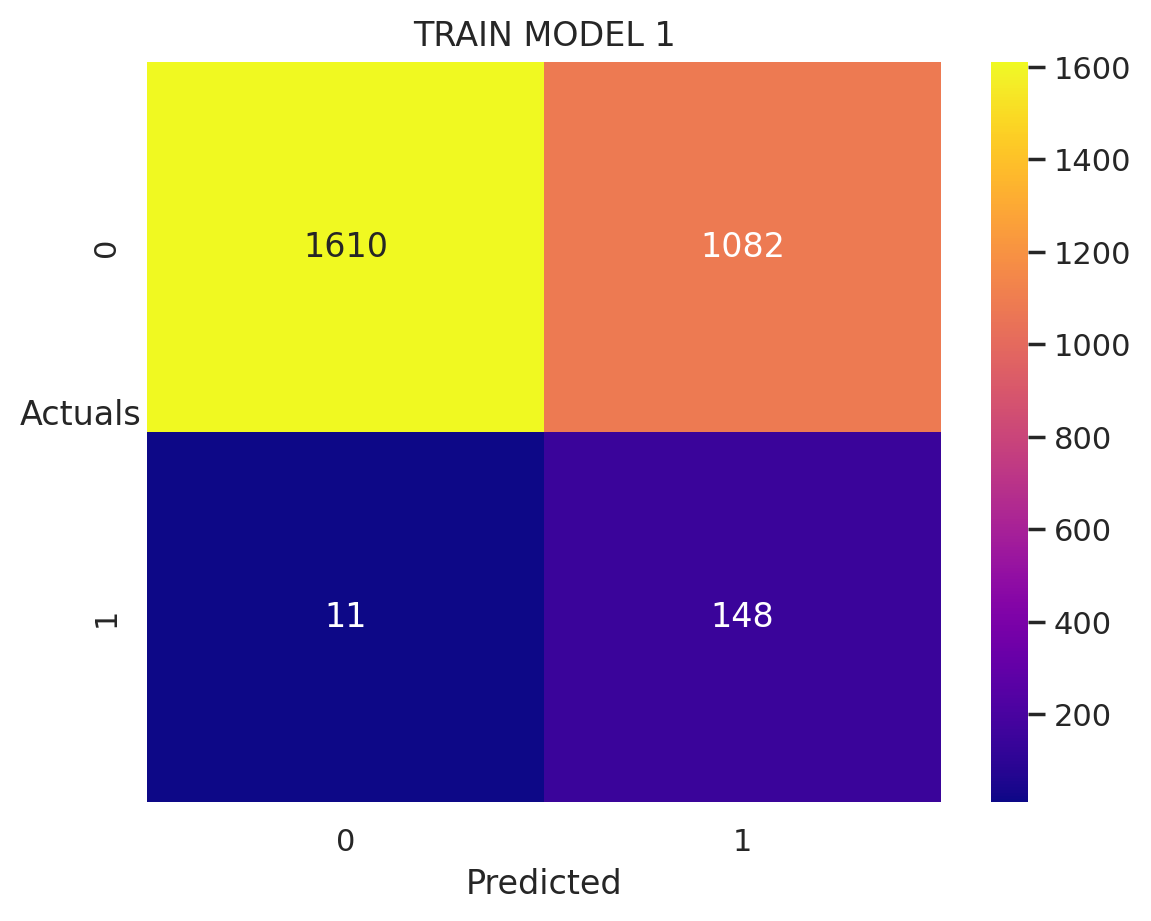

In [62]:
## MODEL 1 TRAIN

y_prob_pred_train = model_1.predict(X_train)

y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('TRAIN MODEL 1')

print(metrics.classification_report(y_train,y_class_pred))

<Axes: >

Text(0.5, 19.049999999999997, 'Predicted')

Text(46.25, 0.5, 'Actuals')

Text(0.5, 1.0, 'TEST MODEL 1')

              precision    recall  f1-score   support

         0.0       0.99      0.59      0.74      1330
         1.0       0.11      0.93      0.20        75

    accuracy                           0.61      1405
   macro avg       0.55      0.76      0.47      1405
weighted avg       0.95      0.61      0.71      1405



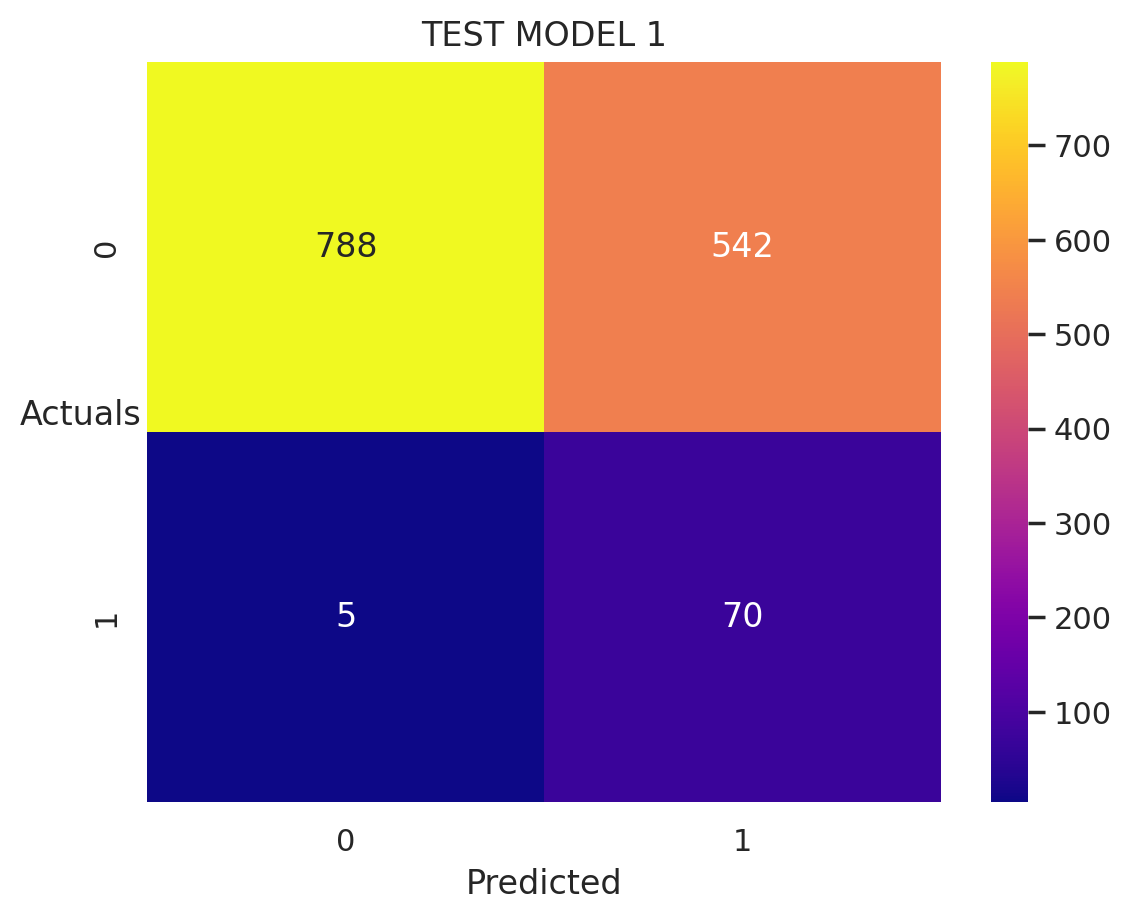

In [64]:
## MODEL 2 TEST

y_prob_pred_test = model_1.predict(X_test)

y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('TEST MODEL 1')

print(metrics.classification_report(y_test,y_class_pred))

In [65]:
X_test.shape

(1405, 23)

### <span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#02A3FF"> MODEL 2

In [66]:
v = pd.DataFrame(model_1.pvalues.sort_values(ascending=False), columns=['pvalue']).reset_index()
v

index    pvalue
0                               Creditors_turnover  0.986558
1                                 Debtors_turnover  0.985248
2                     Income_from_fincial_services  0.922177
3                          Finished_goods_turnover  0.917732
4                                  Change_in_stock  0.785586
5                                     Adjusted_EPS  0.739857
6                                        PE_on_BSE  0.636829
7                               Shares_outstanding  0.613842
8                           Deferred_tax_liability  0.514112
9                      Cumulative_retained_profits  0.509312
10                             Net_working_capital  0.490404
11                                             Num  0.410291
12                               Quick_ratio_times  0.402181
13                                    Other_income  0.353548
14                           Raw_material_turnover  0.332971
15      Contingent_liabilities__to__Net_worth_perc  0.326096
16                          Contingent_liabilities  0.308860
17  Total_term_liabilities__to__tangible_net_worth  0.277907
18                                     Investments  0.174404
19             Cash_profit_as_perc_of_total_income  0.116957
20           Cash_to_average_cost_of_sales_per_day  0.111299
21                                      TOL_to_TNW  0.010728
22                        PAT_as_perc_of_net_worth  0.000024

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6"> Dropping Variables recursively with p-values greater than 0.05

* We check p-values of all predictor variables
* We arrange these variables in decreasing order of p-values
* We check if the top predictor variable has p-value > 0.05
* If yes, then it means that this variable is not significant in predicting default at 95% Confidence
* Hence, we drop ONLY this Top Variable and check for p-values again
* We run this in a loop and drop variables one by one till we get all p-values < 0.05

In [67]:
import time
start = time.time()

for i in range(25):
    model_2 = SM.Logit(y_train, X_train).fit()
    v = pd.DataFrame(model_2.pvalues.sort_values(ascending=False), columns=['pvalue']).reset_index()
    if (v.iloc[0,1] > 0.05):
        X_train = X_train.drop(columns=v.iloc[0,0])

end = time.time()
print('Time taken =', end-start)

Optimization terminated successfully.
         Current function value: 0.672572
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.672572
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.672572
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.672573
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.672575
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.672589
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.672607
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.672640
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.672693
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.672773
  

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#9B59B6"> Check p-values again

In [68]:
print(model_2.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2851
Model:                          Logit   Df Residuals:                     2849
Method:                           MLE   Df Model:                            1
Date:                Sun, 02 Feb 2025   Pseudo R-squ.:                  -2.139
Time:                        13:32:47   Log-Likelihood:                -1925.7
converged:                       True   LL-Null:                       -613.44
Covariance Type:            nonrobust   LLR p-value:                     1.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
PAT_as_perc_of_net_worth    -0.2901      0.039     -7.374      0.000      -0.367      -0.213
TOL_to_TNW                   0.2230      0.039      5.756      0.000       0.147       0.

* We note that only those variables are included in the model which p-values less than 0.05
* All other variables with p-values > 0.05 are recursively dropped one by one

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#9B59B6"> Re-setting the Test set with only the required 11 variables chosen

In [69]:
X_train.shape

(2851, 2)

In [70]:
y_train.shape

(2851,)

In [71]:
X_test = X_test[X_train.columns]

In [72]:
X_test.shape

(1405, 2)

In [73]:
X_test.columns

Index(['PAT_as_perc_of_net_worth', 'TOL_to_TNW'], dtype='object')

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6"> Metrics of Model 2

<Axes: >

Text(0.5, 19.049999999999997, 'Predicted')

Text(46.25, 0.5, 'Actuals')

Text(0.5, 1.0, 'TRAIN MODEL 2')

              precision    recall  f1-score   support

         0.0       0.99      0.60      0.74      2692
         1.0       0.12      0.89      0.20       159

    accuracy                           0.61      2851
   macro avg       0.55      0.74      0.47      2851
weighted avg       0.94      0.61      0.71      2851



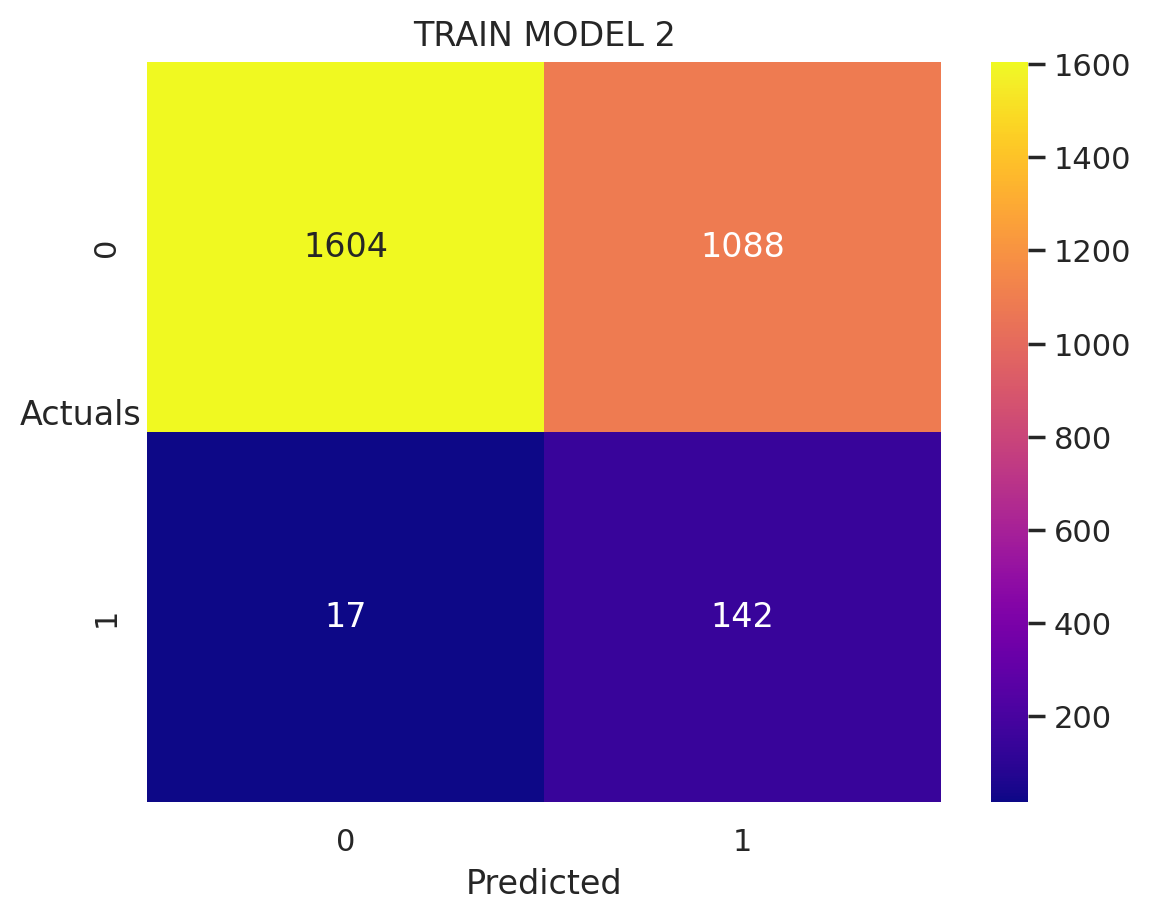

In [74]:
## MODEL 2 TRAIN

y_prob_pred_train = model_2.predict(X_train)

y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('TRAIN MODEL 2')

print(metrics.classification_report(y_train,y_class_pred))

<Axes: >

Text(0.5, 19.049999999999997, 'Predicted')

Text(46.25, 0.5, 'Actuals')

Text(0.5, 1.0, 'TEST MODEL 2')

              precision    recall  f1-score   support

         0.0       0.99      0.59      0.74      1330
         1.0       0.11      0.87      0.19        75

    accuracy                           0.60      1405
   macro avg       0.55      0.73      0.46      1405
weighted avg       0.94      0.60      0.71      1405



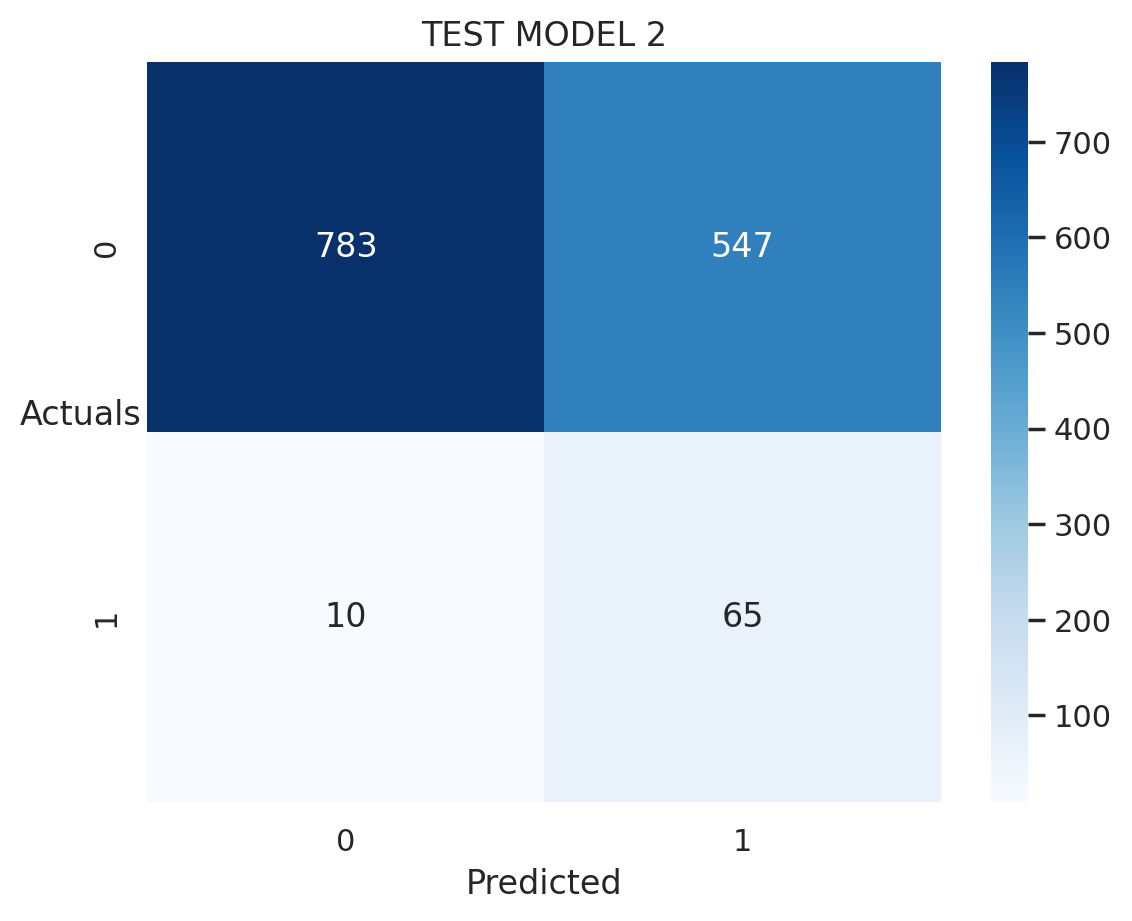

In [75]:
## MODEL 2 TEST

y_prob_pred_test = model_2.predict(X_test)

y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('TEST MODEL 2')

print(metrics.classification_report(y_test,y_class_pred))

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6"> Import Libraries

In [76]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns

from scipy.stats import zscore                                        # ZSCORE SCALING
from sklearn.preprocessing import StandardScaler                      # ZScore
from sklearn.preprocessing import MinMaxScaler                        # Min Max Scaler

from sklearn.linear_model import LogisticRegression                   # Logistic Regression

from sklearn import metrics, model_selection                          # Evaluation Metrics
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,roc_auc_score,roc_curve, precision_recall_curve

from sklearn.model_selection import train_test_split, GridSearchCV    # Train test Split and Grid Search


%matplotlib inline
sns.set(color_codes=True)
sns.set_palette('Accent_r')

%config InlineBackend.figure_format ='retina'

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6"> Load Dataset

In [78]:
df = pd.read_csv('Comp_Fin_Data.csv')
df.head()

Num  Networth Next Year  Total assets  Net worth  Total income  Change in stock  Total expenses  Profit after tax  PBDITA    PBT  Cash profit  PBDITA as % of total income  PBT as % of total income  PAT as % of total income  Cash profit as % of total income  PAT as % of net worth   Sales  Income from fincial services  Other income  Total capital  Reserves and funds  Borrowings  Current liabilities & provisions  Deferred tax liability  Shareholders funds  Cumulative retained profits  Capital employed  TOL/TNW  Total term liabilities / tangible net worth  Contingent liabilities / Net worth (%)  Contingent liabilities  Net fixed assets  Investments  Current assets  Net working capital  Quick ratio (times)  Current ratio (times)  Debt to equity ratio (times)  Cash to current liabilities (times)  Cash to average cost of sales per day  Creditors turnover  Debtors turnover  Finished goods turnover  WIP turnover  Raw material turnover  Shares outstanding  Equity face value    EPS  Adjusted EPS  Total liabilities  PE on BSE
0    1               395.3         827.6      336.5         534.1             13.5           508.7              38.9   124.4   64.6         95.2                        23.29                     12.10                      7.28                             17.82                  12.27   533.5                           0.6           NaN           87.6               249.0       390.7                              43.9                    56.4               336.5                        248.9             727.2     1.28                                         0.99                                  186.21                   626.6             461.1         18.1           257.6                163.1                 0.99                   2.52                          1.16                                 0.06                                   5.41               11.60              5.65                     3.99          3.37                  14.87           8760056.0               10.0   4.44          4.44              827.6        NaN
1    2                36.2          67.7       24.3         137.9             -3.7           131.0               3.2     5.5    1.0          3.8                         3.99                      0.73                      2.32                              2.76                   0.00   135.5                           NaN           0.2           11.9                 4.3        16.6                              23.7                     3.1                24.3                         -8.2              40.9     1.53                                         0.21                                   47.74                    11.6              18.5          0.2            39.0                  3.9                 0.67                   1.11                          0.68                                 0.02                                   1.62                 NaN               NaN                      NaN           NaN                    NaN                 NaN                NaN   0.00          0.00               67.7        NaN
2    3                84.0         238.4       78.9         331.2            -18.1           309.2               3.9    25.8   10.5          9.4                         7.79                      3.17                      1.18                              2.84                   5.07   330.6                           0.6           NaN           25.0                56.7        44.7                             102.2                     9.8                78.9                         53.1             123.6     1.70                                         0.33                                   30.42                    24.0              56.8          0.2           158.3                 38.3                 1.11                   1.31                          0.57                                 0.19                                  26.42                2.24              2.51                    17.6

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6"> Renaming Column Names

In [79]:
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/', '_to_').str.replace('[', '_').str.replace(']', '').str.replace('-', '_')

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6"> Basic Exploration

In [82]:
print('Number of Rows(Companies) =', df.shape[0])
print('Number of Columns =', df.shape[1])

Number of Rows(Companies) = 4256
Number of Columns = 51


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Num                                             4256 non-null   int64  
 1   Networth_Next_Year                              4256 non-null   float64
 2   Total_assets                                    4256 non-null   float64
 3   Net_worth                                       4256 non-null   float64
 4   Total_income                                    4025 non-null   float64
 5   Change_in_stock                                 3706 non-null   float64
 6   Total_expenses                                  4091 non-null   float64
 7   Profit_after_tax                                4102 non-null   float64
 8   PBDITA                                          4102 non-null   float64
 9   PBT                                      

In [84]:
df.head()

Num  Networth_Next_Year  Total_assets  Net_worth  Total_income  Change_in_stock  Total_expenses  Profit_after_tax  PBDITA    PBT  Cash_profit  PBDITA_as_perc_of_total_income  PBT_as_perc_of_total_income  PAT_as_perc_of_total_income  Cash_profit_as_perc_of_total_income  PAT_as_perc_of_net_worth   Sales  Income_from_fincial_services  Other_income  Total_capital  Reserves_and_funds  Borrowings  Current_liabilities_&_provisions  Deferred_tax_liability  Shareholders_funds  Cumulative_retained_profits  Capital_employed  TOL_to_TNW  Total_term_liabilities__to__tangible_net_worth  Contingent_liabilities__to__Net_worth_perc  Contingent_liabilities  Net_fixed_assets  Investments  Current_assets  Net_working_capital  Quick_ratio_times  Current_ratio_times  Debt_to_equity_ratio_times  Cash_to_current_liabilities_times  Cash_to_average_cost_of_sales_per_day  Creditors_turnover  Debtors_turnover  Finished_goods_turnover  WIP_turnover  Raw_material_turnover  Shares_outstanding  Equity_face_value    EPS  Adjusted_EPS  Total_liabilities  PE_on_BSE
0    1               395.3         827.6      336.5         534.1             13.5           508.7              38.9   124.4   64.6         95.2                           23.29                        12.10                         7.28                                17.82                     12.27   533.5                           0.6           NaN           87.6               249.0       390.7                              43.9                    56.4               336.5                        248.9             727.2        1.28                                            0.99                                      186.21                   626.6             461.1         18.1           257.6                163.1               0.99                 2.52                        1.16                               0.06                                   5.41               11.60              5.65                     3.99          3.37                  14.87           8760056.0               10.0   4.44          4.44              827.6        NaN
1    2                36.2          67.7       24.3         137.9             -3.7           131.0               3.2     5.5    1.0          3.8                            3.99                         0.73                         2.32                                 2.76                      0.00   135.5                           NaN           0.2           11.9                 4.3        16.6                              23.7                     3.1                24.3                         -8.2              40.9        1.53                                            0.21                                       47.74                    11.6              18.5          0.2            39.0                  3.9               0.67                 1.11                        0.68                               0.02                                   1.62                 NaN               NaN                      NaN           NaN                    NaN                 NaN                NaN   0.00          0.00               67.7        NaN
2    3                84.0         238.4       78.9         331.2            -18.1           309.2               3.9    25.8   10.5          9.4                            7.79                         3.17                         1.18                                 2.84                      5.07   330.6                           0.6           NaN           25.0                56.7        44.7                             102.2                     9.8                78.9                         53.1             123.6        1.70                                            0.33                                       30.42                    24.0              56.8          0.2           158.3                 38.3               1.11                 1.31                        0.57                               0.19                                 

In [85]:
df.describe().T

count          mean           std           min          25%          50%           75%           max
Num                                             4256.0  2.128500e+03  1.228746e+03  1.000000e+00     1064.750     2128.500  3.192250e+03  4.256000e+03
Networth_Next_Year                              4256.0  1.344741e+03  1.593674e+04 -7.426560e+04        3.975       72.100  3.308250e+02  8.057734e+05
Total_assets                                    4256.0  3.573617e+03  3.007444e+04  1.000000e-01       91.300      315.500  1.120800e+03  1.176509e+06
Net_worth                                       4256.0  1.351950e+03  1.296131e+04  0.000000e+00       31.475      104.800  3.898500e+02  6.131516e+05
Total_income                                    4025.0  4.688190e+03  5.391895e+04  0.000000e+00      107.100      455.100  1.485000e+03  2.442828e+06
Change_in_stock                                 3706.0  4.370248e+01  4.369150e+02 -3.029400e+03       -1.800        1.600  1.840000e+01  1.418550e+04
Total_expenses                                  4091.0  4.356301e+03  5.139809e+04 -1.000000e-01       96.800      426.800  1.395700e+03  2.366035e+06
Profit_after_tax                                4102.0  2.950506e+02  3.079902e+03 -3.908300e+03        0.500        9.000  5.330000e+01  1.194391e+05
PBDITA                                          4102.0  6.059406e+02  5.646231e+03 -4.407000e+02        6.925       36.900  1.587000e+02  2.085765e+05
PBT                                             4102.0  4.102590e+02  4.217415e+03 -3.894800e+03        0.800       12.600  7.417500e+01  1.452926e+05
Cash_profit                                     4102.0  4.082675e+02  4.143926e+03 -2.245700e+03        2.900       19.400  9.625000e+01  1.769118e+05
PBDITA_as_perc_of_total_income                  4177.0  3.179892e+00  1.722566e+02 -6.400000e+03        4.970        9.680  1.647000e+01  1.000000e+02
PBT_as_perc_of_total_income                     4177.0 -1.819683e+01  4.199111e+02 -2.134000e+04        0.560        3.340  8.940000e+00  1.000000e+02
PAT_as_perc_of_total_income                     4177.0 -2.003367e+01  4.235762e+02 -2.134000e+04        0.350        2.370  6.420000e+00  1.500000e+02
Cash_profit_as_perc_of_total_income             4177.0 -9.021278e+00  2.999574e+02 -1.502000e+04        2.000        5.660  1.073000e+01  1.000000e+02
PAT_as_perc_of_net_worth                        4256.0  1.016786e+01  6.153240e+01 -7.487200e+02        0.000        8.040  2.020250e+01  2.466670e+03
Sales                                           3951.0  4.645685e+03  5.308090e+04  1.000000e-01      113.350      468.600  1.481200e+03  2.384984e+06
Income_from_fincial_services                    3145.0  8.136006e+01  1.042759e+03  0.000000e+00        0.500        1.900  9.800000e+00  5.193820e+04
Other_income                                    2700.0  5.595289e+01  1.178415e+03  0.000000e+00        0.400        1.500  6.200000e+00  4.285670e+04
Total_capital                                   4251.0  2.245577e+02  1.684951e+03  1.000000e-01       13.200       42.600  1.031500e+02  7.827320e+04
Reserves_and_funds                              4158.0  1.210562e+03  1.281623e+04 -6.525900e+03        5.300       55.150  2.825250e+02  6.251378e+05
Borrowings                                      3825.0  1.176248e+03  8.581249e+03  1.000000e-01       24.400       99.800  3.583000e+02  2.782573e+05
Current_liabilities_&_provisions                4146.0  9.606314e+02  9.140536e+03  1.000000e-01       17.500       70.300  2.659250e+02  3.522403e+05
Deferred_tax_liability                          2887.0  2.344951e+02  2.106253e+03  1.000000e-01        3.200       13.500  5.130000e+01  7.279660e+04
Shareholders_funds                              4256.0  1.376487e+03  1.301069e+04  0.000000e+00       32.300      107.600  4.089000e+02  6.131516e+05
Cumulative_retained_profits                     4211.0  9.371820e+02  9.853096e+03 -6.534300e+03        1.100       37.400 

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6"> Checking Duplicates

In [86]:
print('Number of Duplicates =', df.duplicated().sum().sum())

Number of Duplicates = 0


Unique Identifiers do not add any value to model building, hence dropping them

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6"> Creating Target/Response Variable

* We consider 'Networth Next Year' as our Default Variable
* SO, we call negative values as Default = 1
* And, positive values as Default = 0

In [88]:
df_orig = df.copy()
df['default'] = np.where(df['Networth_Next_Year']>=0, 0, 1)
df[['default', 'Networth_Next_Year']].head()
df[['default', 'Networth_Next_Year']].tail()

default  Networth_Next_Year
0        0               395.3
1        0                36.2
2        0                84.0
3        0              2041.4
4        0                41.8

default  Networth_Next_Year
4251        0                 0.2
4252        0                93.3
4253        0               932.2
4254        0                64.6
4255        0                 0.0

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#9B59B6"> Dropping variable 'Networth Next Year'

In [89]:
df.drop('Networth_Next_Year', axis=1, inplace=True)
df.head()

Num  Total_assets  Net_worth  Total_income  Change_in_stock  Total_expenses  Profit_after_tax  PBDITA    PBT  Cash_profit  PBDITA_as_perc_of_total_income  PBT_as_perc_of_total_income  PAT_as_perc_of_total_income  Cash_profit_as_perc_of_total_income  PAT_as_perc_of_net_worth   Sales  Income_from_fincial_services  Other_income  Total_capital  Reserves_and_funds  Borrowings  Current_liabilities_&_provisions  Deferred_tax_liability  Shareholders_funds  Cumulative_retained_profits  Capital_employed  TOL_to_TNW  Total_term_liabilities__to__tangible_net_worth  Contingent_liabilities__to__Net_worth_perc  Contingent_liabilities  Net_fixed_assets  Investments  Current_assets  Net_working_capital  Quick_ratio_times  Current_ratio_times  Debt_to_equity_ratio_times  Cash_to_current_liabilities_times  Cash_to_average_cost_of_sales_per_day  Creditors_turnover  Debtors_turnover  Finished_goods_turnover  WIP_turnover  Raw_material_turnover  Shares_outstanding  Equity_face_value    EPS  Adjusted_EPS  Total_liabilities  PE_on_BSE  default
0    1         827.6      336.5         534.1             13.5           508.7              38.9   124.4   64.6         95.2                           23.29                        12.10                         7.28                                17.82                     12.27   533.5                           0.6           NaN           87.6               249.0       390.7                              43.9                    56.4               336.5                        248.9             727.2        1.28                                            0.99                                      186.21                   626.6             461.1         18.1           257.6                163.1               0.99                 2.52                        1.16                               0.06                                   5.41               11.60              5.65                     3.99          3.37                  14.87           8760056.0               10.0   4.44          4.44              827.6        NaN        0
1    2          67.7       24.3         137.9             -3.7           131.0               3.2     5.5    1.0          3.8                            3.99                         0.73                         2.32                                 2.76                      0.00   135.5                           NaN           0.2           11.9                 4.3        16.6                              23.7                     3.1                24.3                         -8.2              40.9        1.53                                            0.21                                       47.74                    11.6              18.5          0.2            39.0                  3.9               0.67                 1.11                        0.68                               0.02                                   1.62                 NaN               NaN                      NaN           NaN                    NaN                 NaN                NaN   0.00          0.00               67.7        NaN        0
2    3         238.4       78.9         331.2            -18.1           309.2               3.9    25.8   10.5          9.4                            7.79                         3.17                         1.18                                 2.84                      5.07   330.6                           0.6           NaN           25.0                56.7        44.7                             102.2                     9.8                78.9                         53.1             123.6        1.70                                            0.33                                       30.42                    24.0              56.8          0.2           158.3                 38.3               1.11                 1.31                        0.57                               0.19                                  26.42                2.24              2.51         

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6"> Missing Value Treatment

In [91]:

df.isnull().sum()

Num                                                  0
Total_assets                                         0
Net_worth                                            0
Total_income                                       231
Change_in_stock                                    550
Total_expenses                                     165
Profit_after_tax                                   154
PBDITA                                             154
PBT                                                154
Cash_profit                                        154
PBDITA_as_perc_of_total_income                      79
PBT_as_perc_of_total_income                         79
PAT_as_perc_of_total_income                         79
Cash_profit_as_perc_of_total_income                 79
PAT_as_perc_of_net_worth                             0
Sales                                              305
Income_from_fincial_services                      1111
Other_income                                      1556
Total_capital                                        5
Reserves_and_funds                                  98
Borrowings                                         431
Current_liabilities_&_provisions                   110
Deferred_tax_liability                            1369
Shareholders_funds                                   0
Cumulative_retained_profits                         45
Capital_employed                                     0
TOL_to_TNW                                           0
Total_term_liabilities__to__tangible_net_worth       0
Contingent_liabilities__to__Net_worth_perc           0
Contingent_liabilities                            1402
Net_fixed_assets                                   132
Investments                                       1715
Current_assets                                      80
Net_working_capital                                 37
Quick_ratio_times                                  105
Current_ratio_times                                105
Debt_to_equity_ratio_times                           0
Cash_to_current_liabilities_times                  105
Cash_to_average_cost_of_sales_per_day              100
Creditors_turnover                                 391
Debtors_turnover                                   385
Finished_goods_turnover                            874
WIP_turnover                                       764
Raw_material_turnover                              428
Shares_outstanding                                 810
Equity_face_value                                  810
EPS                                                  0
Adjusted_EPS                                         0
Total_liabilities                                    0
PE_on_BSE                                         2627
default                                              0
dtype: int64

In [93]:

round(df.isna().sum()*100/df.shape[0], 2)

Num                                                0.00
Total_assets                                       0.00
Net_worth                                          0.00
Total_income                                       5.43
Change_in_stock                                   12.92
Total_expenses                                     3.88
Profit_after_tax                                   3.62
PBDITA                                             3.62
PBT                                                3.62
Cash_profit                                        3.62
PBDITA_as_perc_of_total_income                     1.86
PBT_as_perc_of_total_income                        1.86
PAT_as_perc_of_total_income                        1.86
Cash_profit_as_perc_of_total_income                1.86
PAT_as_perc_of_net_worth                           0.00
Sales                                              7.17
Income_from_fincial_services                      26.10
Other_income                                      36.56
Total_capital                                      0.12
Reserves_and_funds                                 2.30
Borrowings                                        10.13
Current_liabilities_&_provisions                   2.58
Deferred_tax_liability                            32.17
Shareholders_funds                                 0.00
Cumulative_retained_profits                        1.06
Capital_employed                                   0.00
TOL_to_TNW                                         0.00
Total_term_liabilities__to__tangible_net_worth     0.00
Contingent_liabilities__to__Net_worth_perc         0.00
Contingent_liabilities                            32.94
Net_fixed_assets                                   3.10
Investments                                       40.30
Current_assets                                     1.88
Net_working_capital                                0.87
Quick_ratio_times                                  2.47
Current_ratio_times                                2.47
Debt_to_equity_ratio_times                         0.00
Cash_to_current_liabilities_times                  2.47
Cash_to_average_cost_of_sales_per_day              2.35
Creditors_turnover                                 9.19
Debtors_turnover                                   9.05
Finished_goods_turnover                           20.54
WIP_turnover                                      17.95
Raw_material_turnover                             10.06
Shares_outstanding                                19.03
Equity_face_value                                 19.03
EPS                                                0.00
Adjusted_EPS                                       0.00
Total_liabilities                                  0.00
PE_on_BSE                                         61.72
default                                            0.00
dtype: float64

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6"> Checking Zero Values

In [94]:
(df.drop('default', axis=1)==0).sum().sort_values(ascending=False)

Contingent_liabilities__to__Net_worth_perc        1402
Total_term_liabilities__to__tangible_net_worth     733
Adjusted_EPS                                       720
EPS                                                719
PAT_as_perc_of_net_worth                           537
Debt_to_equity_ratio_times                         460
Raw_material_turnover                              424
Cash_to_current_liabilities_times                  319
Debtors_turnover                                   247
PAT_as_perc_of_total_income                        216
PBT_as_perc_of_total_income                        215
Creditors_turnover                                 208
Cash_to_average_cost_of_sales_per_day              197
Cash_profit_as_perc_of_total_income                196
PBDITA_as_perc_of_total_income                     187
TOL_to_TNW                                          88
Change_in_stock                                     87
PBT                                                 78
Profit_after_tax                                    78
Quick_ratio_times                                   70
Cash_profit                                         69
PBDITA                                              60
Current_ratio_times                                 51
Investments                                         20
WIP_turnover                                        17
Net_working_capital                                 15
Cumulative_retained_profits                         12
Finished_goods_turnover                             10
Net_fixed_assets                                     7
Reserves_and_funds                                   5
Total_expenses                                       5
Other_income                                         3
Total_income                                         2
Net_worth                                            1
Income_from_fincial_services                         1
Shareholders_funds                                   1
Capital_employed                                     1
Total_liabilities                                    0
Shares_outstanding                                   0
Equity_face_value                                    0
Num                                                  0
Current_assets                                       0
Contingent_liabilities                               0
Total_assets                                         0
Deferred_tax_liability                               0
Current_liabilities_&_provisions                     0
Borrowings                                           0
Total_capital                                        0
Sales                                                0
PE_on_BSE                                            0
dtype: int64

In [95]:
round(((df.drop('default', axis=1)==0).sum())*100/df.shape[0], 2).sort_values(ascending=False)

Contingent_liabilities__to__Net_worth_perc        32.94
Total_term_liabilities__to__tangible_net_worth    17.22
Adjusted_EPS                                      16.92
EPS                                               16.89
PAT_as_perc_of_net_worth                          12.62
Debt_to_equity_ratio_times                        10.81
Raw_material_turnover                              9.96
Cash_to_current_liabilities_times                  7.50
Debtors_turnover                                   5.80
PAT_as_perc_of_total_income                        5.08
PBT_as_perc_of_total_income                        5.05
Creditors_turnover                                 4.89
Cash_to_average_cost_of_sales_per_day              4.63
Cash_profit_as_perc_of_total_income                4.61
PBDITA_as_perc_of_total_income                     4.39
TOL_to_TNW                                         2.07
Change_in_stock                                    2.04
PBT                                                1.83
Profit_after_tax                                   1.83
Quick_ratio_times                                  1.64
Cash_profit                                        1.62
PBDITA                                             1.41
Current_ratio_times                                1.20
Investments                                        0.47
WIP_turnover                                       0.40
Net_working_capital                                0.35
Cumulative_retained_profits                        0.28
Finished_goods_turnover                            0.23
Net_fixed_assets                                   0.16
Reserves_and_funds                                 0.12
Total_expenses                                     0.12
Other_income                                       0.07
Total_income                                       0.05
Net_worth                                          0.02
Income_from_fincial_services                       0.02
Shareholders_funds                                 0.02
Capital_employed                                   0.02
Total_liabilities                                  0.00
Shares_outstanding                                 0.00
Equity_face_value                                  0.00
Num                                                0.00
Current_assets                                     0.00
Contingent_liabilities                             0.00
Total_assets                                       0.00
Deferred_tax_liability                             0.00
Current_liabilities_&_provisions                   0.00
Borrowings                                         0.00
Total_capital                                      0.00
Sales                                              0.00
PE_on_BSE                                          0.00
dtype: float64

* There are many variables with a lot of zero values
* They may be correct values at times, but also seems like a missing data replaced with zero
* Let us for this analysis, decide to ignore and drop all variables with number of zeros greater than 30%
* We drop the top 9 variables from above

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#9B59B6"> Dropping Variables with zeros greater than 30%

In [ ]:
df.columns

Index(['Equity_Paid_Up', 'Networth', 'Capital_Employed', 'Total_Debt', 'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output', 'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT', 'PAT', 'Adjusted_PAT', 'CP', 'Book_Value_Unit_Curr', 'CEPS_annualised_Unit_Curr', 'Cash_Flow_From_Operating_Activities', 'Cash_Flow_From_Investing_Activities', 'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc', 'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc', 'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc', 'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc', 'ROG_PBIDT_perc', 'ROG_PBDT_perc', 'ROG_PBIT_perc', 'ROG_PBT_perc', 'ROG_PAT_perc', 'ROG_CP_perc', 'Current_Ratio_Latest', 'Fixed_Assets_Ratio_Latest', 'Debtors_Ratio_Latest', 'Total_Asset_Turnover_Ratio_Latest', 'Interest_Cover_Ratio_Latest', 'PBIDTM_perc_Latest', 'PBITM_perc_Latest', 'PBDTM_perc_Latest', 'CPM_perc_Latest', 'APATM_perc_Latest', 'Debtors_Velocity_Days', 'Creditors_Velocity_Days',
       'Value_of_Out

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6"> Converting other Zeros to Missing Values for Treatment

In [100]:
df1 = df.drop('default', axis=1)
df1[df1==0] = np.nan
(df1==0).sum()
(df1==0).shape
df1.shape

Num                                               0
Total_assets                                      0
Net_worth                                         0
Total_income                                      0
Change_in_stock                                   0
Total_expenses                                    0
Profit_after_tax                                  0
PBDITA                                            0
PBT                                               0
Cash_profit                                       0
PBDITA_as_perc_of_total_income                    0
PBT_as_perc_of_total_income                       0
PAT_as_perc_of_total_income                       0
Cash_profit_as_perc_of_total_income               0
PAT_as_perc_of_net_worth                          0
Sales                                             0
Income_from_fincial_services                      0
Other_income                                      0
Total_capital                                     0
Reserves_and_funds                                0
Borrowings                                        0
Current_liabilities_&_provisions                  0
Deferred_tax_liability                            0
Shareholders_funds                                0
Cumulative_retained_profits                       0
Capital_employed                                  0
TOL_to_TNW                                        0
Total_term_liabilities__to__tangible_net_worth    0
Contingent_liabilities__to__Net_worth_perc        0
Contingent_liabilities                            0
Net_fixed_assets                                  0
Investments                                       0
Current_assets                                    0
Net_working_capital                               0
Quick_ratio_times                                 0
Current_ratio_times                               0
Debt_to_equity_ratio_times                        0
Cash_to_current_liabilities_times                 0
Cash_to_average_cost_of_sales_per_day             0
Creditors_turnover                                0
Debtors_turnover                                  0
Finished_goods_turnover                           0
WIP_turnover                                      0
Raw_material_turnover                             0
Shares_outstanding                                0
Equity_face_value                                 0
EPS                                               0
Adjusted_EPS                                      0
Total_liabilities                                 0
PE_on_BSE                                         0
dtype: int64

(4256, 50)

(4256, 50)

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6"> Visualising Missing Values

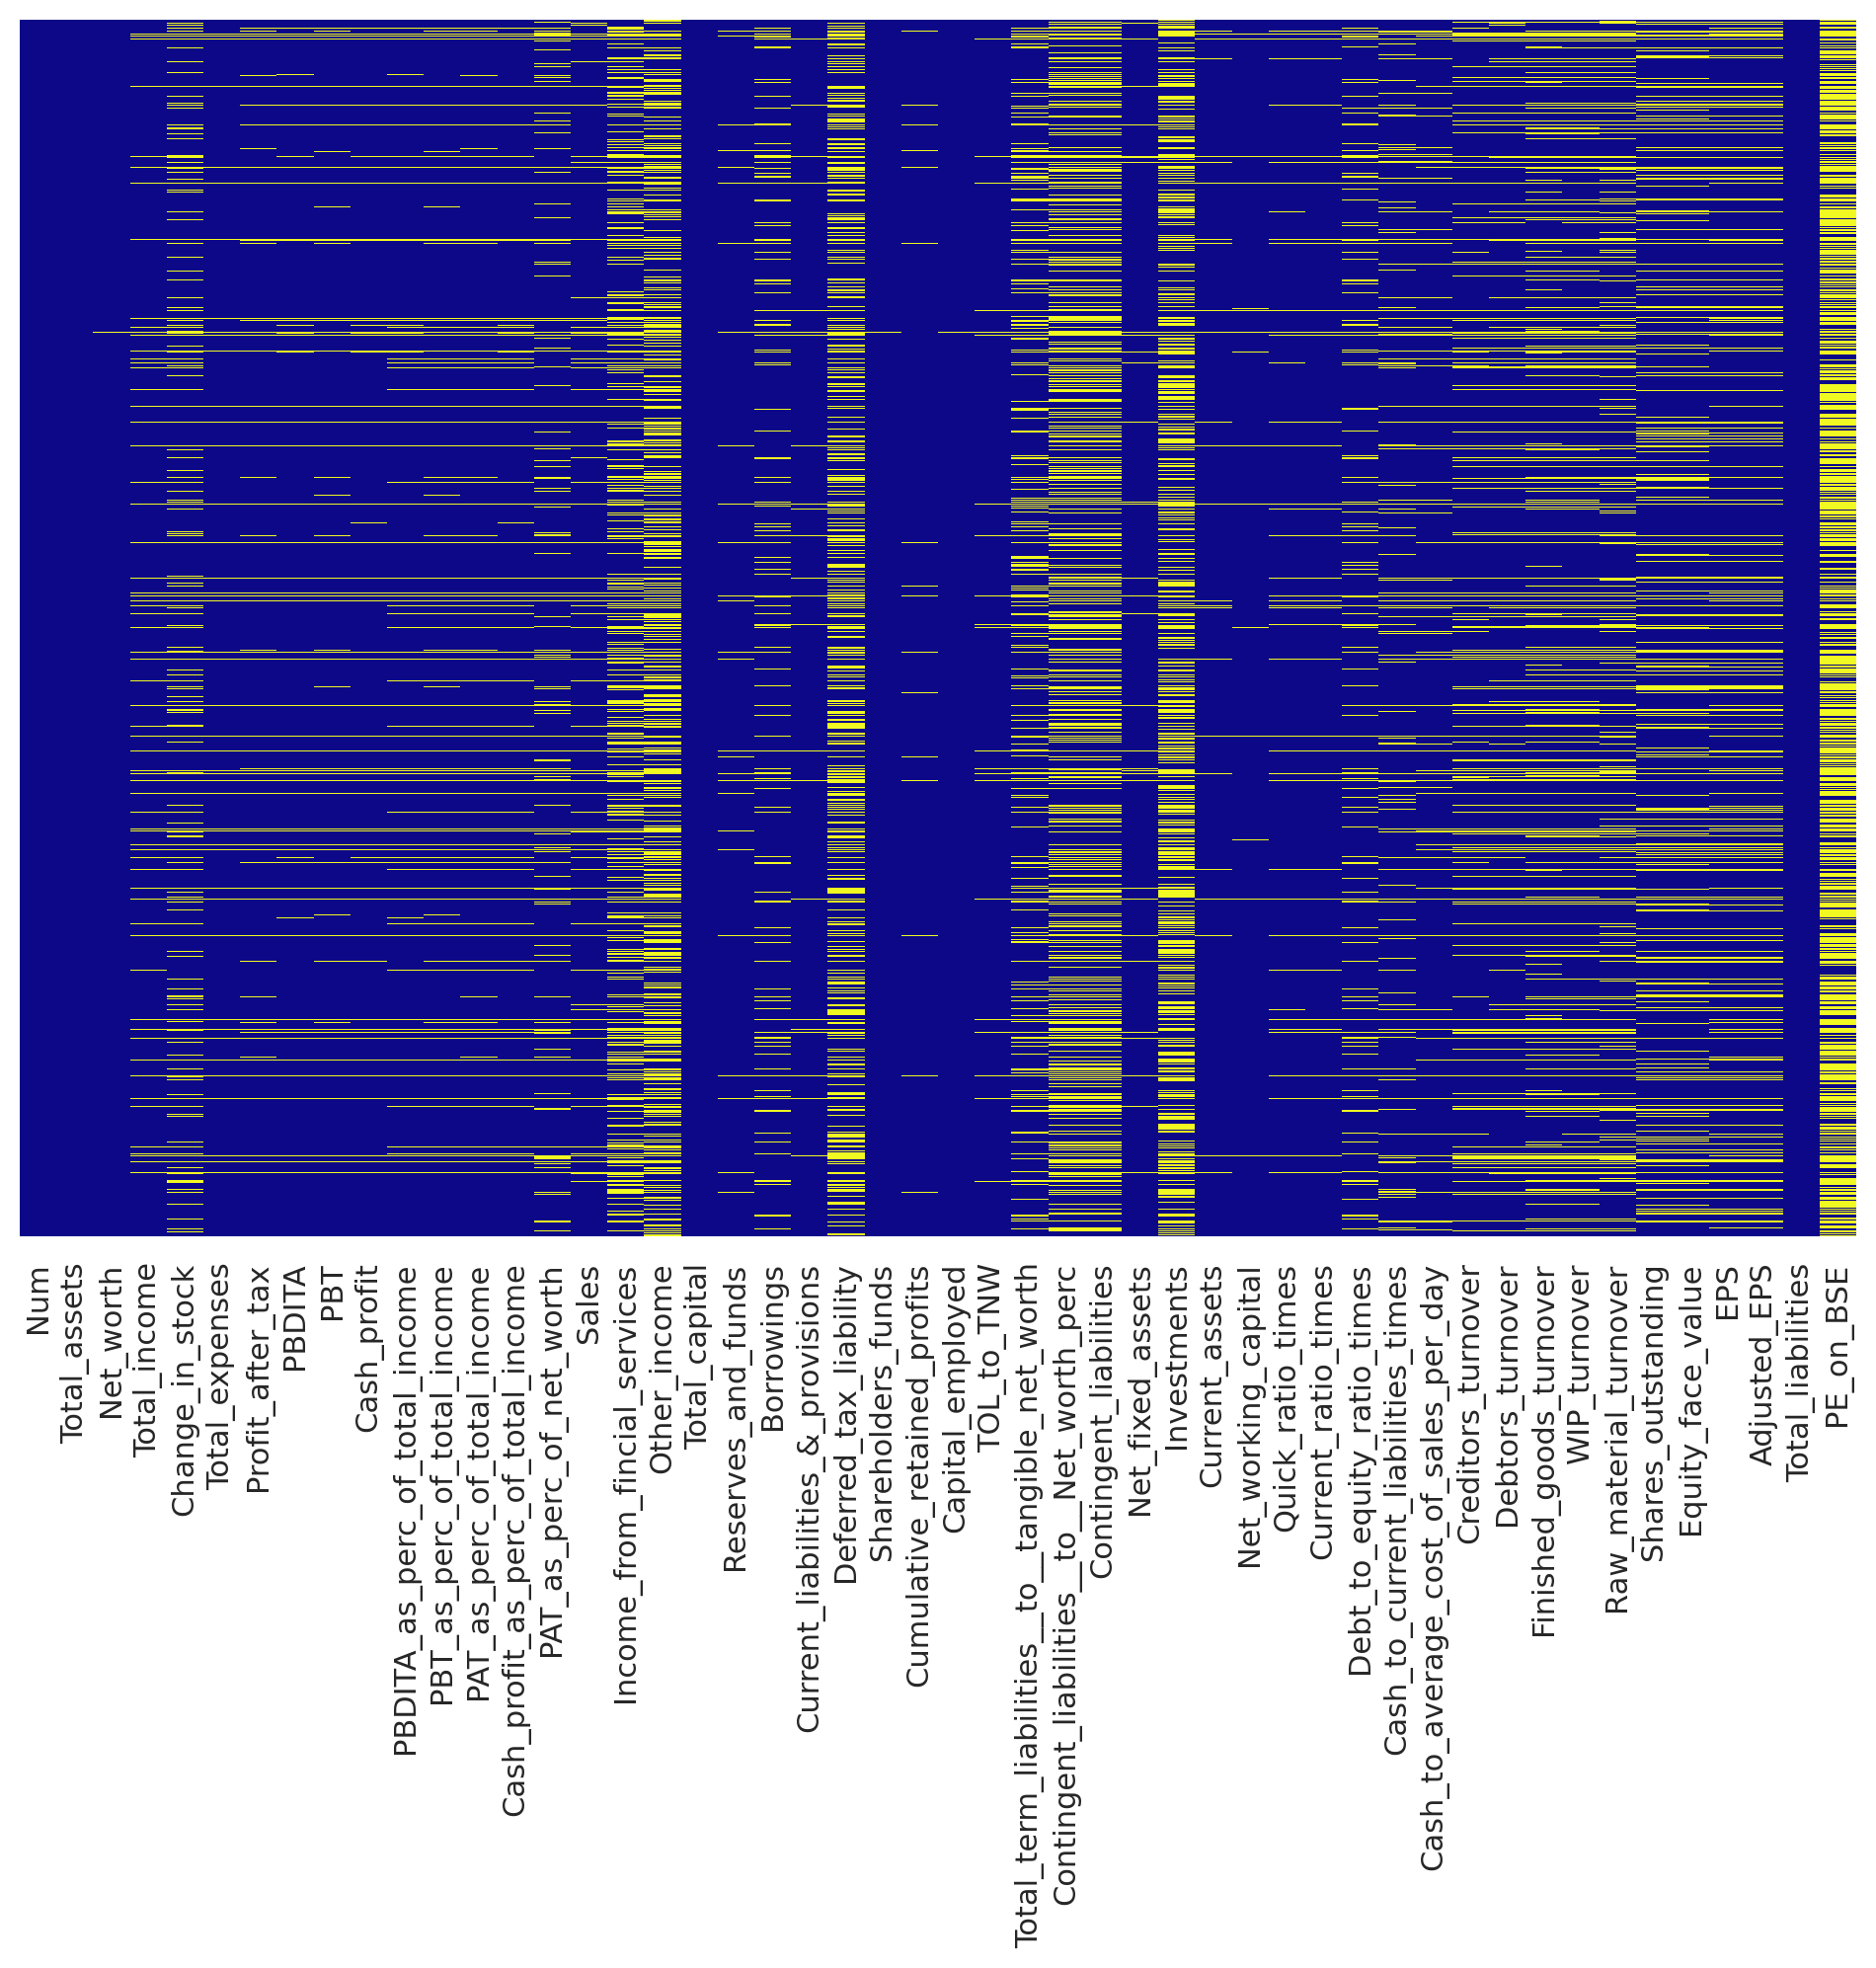

In [101]:
plt.figure(figsize = (12,8))
sns.heatmap(df1.isnull(), cbar = False, cmap = 'plasma', yticklabels = False)
plt.show();

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6"> Checking Missing Values by Rows

* We check for rows with more than 5 missing values
* Out of these rows, we note that 164 out of 387 defaults exist
* Hence, we ll not drop these rows
* But, also conclude that more the missing or zero values, higher is the probability of default

In [102]:
df1['default'] = df['default']
df_rows = df1[df1.isna().sum(axis=1)>5]
df_rows.shape

(1418, 51)

In [103]:
df1['default'].value_counts()
df_rows['default'].value_counts()

default
0    4022
1     234
Name: count, dtype: int64

default
0    1280
1     138
Name: count, dtype: int64

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6"> Split Target and Predictor Variables

In [104]:
df_x = df1.drop('default', axis=1)
df_y = df1['default']

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6"> Impute Null Values using KNN Imputer
    n_neighbors=10

In [105]:
df1.isna().sum()

Num                                                  0
Total_assets                                         0
Net_worth                                            1
Total_income                                       233
Change_in_stock                                    637
Total_expenses                                     170
Profit_after_tax                                   232
PBDITA                                             214
PBT                                                232
Cash_profit                                        223
PBDITA_as_perc_of_total_income                     266
PBT_as_perc_of_total_income                        294
PAT_as_perc_of_total_income                        295
Cash_profit_as_perc_of_total_income                275
PAT_as_perc_of_net_worth                           537
Sales                                              305
Income_from_fincial_services                      1112
Other_income                                      1559
Total_capital                                        5
Reserves_and_funds                                 103
Borrowings                                         431
Current_liabilities_&_provisions                   110
Deferred_tax_liability                            1369
Shareholders_funds                                   1
Cumulative_retained_profits                         57
Capital_employed                                     1
TOL_to_TNW                                          88
Total_term_liabilities__to__tangible_net_worth     733
Contingent_liabilities__to__Net_worth_perc        1402
Contingent_liabilities                            1402
Net_fixed_assets                                   139
Investments                                       1735
Current_assets                                      80
Net_working_capital                                 52
Quick_ratio_times                                  175
Current_ratio_times                                156
Debt_to_equity_ratio_times                         460
Cash_to_current_liabilities_times                  424
Cash_to_average_cost_of_sales_per_day              297
Creditors_turnover                                 599
Debtors_turnover                                   632
Finished_goods_turnover                            884
WIP_turnover                                       781
Raw_material_turnover                              852
Shares_outstanding                                 810
Equity_face_value                                  810
EPS                                                719
Adjusted_EPS                                       720
Total_liabilities                                    0
PE_on_BSE                                         2627
default                                              0
dtype: int64

In [106]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=10)

df_imputed = pd.DataFrame(imputer.fit_transform(df1), columns = df1.columns)

df_imputed.isnull().sum()

Num                                               0
Total_assets                                      0
Net_worth                                         0
Total_income                                      0
Change_in_stock                                   0
Total_expenses                                    0
Profit_after_tax                                  0
PBDITA                                            0
PBT                                               0
Cash_profit                                       0
PBDITA_as_perc_of_total_income                    0
PBT_as_perc_of_total_income                       0
PAT_as_perc_of_total_income                       0
Cash_profit_as_perc_of_total_income               0
PAT_as_perc_of_net_worth                          0
Sales                                             0
Income_from_fincial_services                      0
Other_income                                      0
Total_capital                                     0
Reserves_and_funds                                0
Borrowings                                        0
Current_liabilities_&_provisions                  0
Deferred_tax_liability                            0
Shareholders_funds                                0
Cumulative_retained_profits                       0
Capital_employed                                  0
TOL_to_TNW                                        0
Total_term_liabilities__to__tangible_net_worth    0
Contingent_liabilities__to__Net_worth_perc        0
Contingent_liabilities                            0
Net_fixed_assets                                  0
Investments                                       0
Current_assets                                    0
Net_working_capital                               0
Quick_ratio_times                                 0
Current_ratio_times                               0
Debt_to_equity_ratio_times                        0
Cash_to_current_liabilities_times                 0
Cash_to_average_cost_of_sales_per_day             0
Creditors_turnover                                0
Debtors_turnover                                  0
Finished_goods_turnover                           0
WIP_turnover                                      0
Raw_material_turnover                             0
Shares_outstanding                                0
Equity_face_value                                 0
EPS                                               0
Adjusted_EPS                                      0
Total_liabilities                                 0
PE_on_BSE                                         0
default                                           0
dtype: int64

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6"> Outlier Treatment using Z-Score method

$z-score$ = $\frac{x - mean}{std. dev}$

We'll cap all values to 3 and -3 which lie beyond them

In [107]:
df_x = df_imputed.drop('default', axis=1)
df_y = df_imputed['default']

In [108]:
sc = StandardScaler()
scaled_x = pd.DataFrame(sc.fit_transform(df_x), columns=df_x.columns)
scaled_x.shape
scaled_x.head()

(4256, 50)

Num  Total_assets  Net_worth  Total_income  Change_in_stock  Total_expenses  Profit_after_tax    PBDITA       PBT  Cash_profit  PBDITA_as_perc_of_total_income  PBT_as_perc_of_total_income  PAT_as_perc_of_total_income  Cash_profit_as_perc_of_total_income  PAT_as_perc_of_net_worth     Sales  Income_from_fincial_services  Other_income  Total_capital  Reserves_and_funds  Borrowings  Current_liabilities_&_provisions  Deferred_tax_liability  Shareholders_funds  Cumulative_retained_profits  Capital_employed  TOL_to_TNW  Total_term_liabilities__to__tangible_net_worth  Contingent_liabilities__to__Net_worth_perc  Contingent_liabilities  Net_fixed_assets  Investments  Current_assets  Net_working_capital  Quick_ratio_times  Current_ratio_times  Debt_to_equity_ratio_times  Cash_to_current_liabilities_times  Cash_to_average_cost_of_sales_per_day  Creditors_turnover  Debtors_turnover  Finished_goods_turnover  WIP_turnover  Raw_material_turnover  Shares_outstanding  Equity_face_value       EPS  Adjusted_EPS  Total_liabilities  PE_on_BSE
0 -1.731644     -0.091318  -0.078354     -0.074559        -0.061372       -0.073163         -0.081279 -0.083093 -0.080000    -0.073479                        0.126805                     0.081962                     0.074541                             0.097951                  0.008233 -0.074091                     -0.067416     -0.035589      -0.081210           -0.073799   -0.083650                         -0.098882               -0.062251           -0.079943                    -0.069246         -0.083264   -0.137888                                       -0.085600                                    0.191551               -0.002492         -0.057803    -0.080919       -0.106147             0.000466          -0.062365             0.015538                   -0.134521                          -0.114681                              -0.066936           -0.095895         -0.148393                -0.152836     -0.169998              -0.022329           -0.065388           0.047520  0.016079      0.016178          -0.091318   1.102923
1 -1.730830     -0.116588  -0.102444     -0.082114        -0.103538       -0.080658         -0.093085 -0.104541 -0.095360    -0.095945                        0.016284                     0.054824                     0.062806                             0.047622                 -0.083834 -0.081872                     -0.066914     -0.038401      -0.126168           -0.093116   -0.129603                         -0.101121               -0.092926           -0.103941                    -0.095480         -0.116752   -0.125940                                       -0.134274                                   -0.151111               -0.064735         -0.093766    -0.084322       -0.127877            -0.049789          -0.097060            -0.098821                   -0.165111                          -0.123062                              -0.068443            0.028634         -0.136022                -0.122643     -0.122045              -0.035136           -0.108054           0.048069  0.016152      0.016251          -0.116588  -0.809599
2 -1.730016     -0.110912  -0.098231     -0.078428        -0.138839       -0.077122         -0.092854 -0.100879 -0.093066    -0.094568                        0.038045                     0.060648                     0.060109                             0.047890                 -0.106473 -0.078058                     -0.067416     -0.035323      -0.118388           -0.088980   -0.126151                         -0.092420               -0.089070           -0.099744                    -0.089225         -0.112717   -0.117815                                       -0.126786                                   -0.193972               -0.063480         -0.090654    -0.084322       -0.116018            -0.038930          -0.049354            -0.082600                   -0.172121                          -0.087444                              -0.058580           -0.223742  

In [109]:
for column in df_x.columns:
    lr = -3
    ur = 3
    df_x[column]=np.where(df_x[column]>ur,ur,df_x[column])
    df_x[column]=np.where(df_x[column]<lr,lr,df_x[column])

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6">Correlation Heatmap

In [110]:
#calculate column correlations and make a seaborn heatmap - Before standardisation

plt.figure(figsize=(40,40))
p=sns.heatmap(df_x.corr(), annot=True,cmap='plasma',square=True, fmt='.1g')

Output hidden; open in https://colab.research.google.com to view.

* We see a lot of red patches showing high correlation between variables
* This gives rise to issues of Multi-Collinearity
* Lets check for Multi-Collinearity using Variance Inflation Factor

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6"> Check Multi-Colinearity using Variance Inflation Factor

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [112]:
X = df_x.copy()
f = calc_vif(X).sort_values(by = 'VIF', ascending = False)
f

variables          VIF
48                               Total_liabilities          inf
1                                     Total_assets          inf
23                              Shareholders_funds  2318.960846
2                                        Net_worth  2204.474895
25                                Capital_employed   710.862630
0                                              Num   452.885691
44                              Shares_outstanding   192.068452
41                         Finished_goods_turnover   157.825821
45                               Equity_face_value   150.731863
15                                           Sales   141.571040
3                                     Total_income   131.280169
5                                   Total_expenses    79.133570
42                                    WIP_turnover    74.415914
30                                Net_fixed_assets    63.408153
40                                Debtors_turnover    62.031378
46                                             EPS    58.954720
47                                    Adjusted_EPS    55.777285
32                                  Current_assets    55.497066
18                                   Total_capital    50.601011
39                              Creditors_turnover    49.089276
28      Contingent_liabilities__to__Net_worth_perc    43.597968
21                Current_liabilities_&_provisions    42.527515
20                                      Borrowings    41.378651
43                           Raw_material_turnover    40.995317
8                                              PBT    40.739483
29                          Contingent_liabilities    37.012984
6                                 Profit_after_tax    35.388898
11                     PBT_as_perc_of_total_income    33.770946
7                                           PBDITA    28.658190
12                     PAT_as_perc_of_total_income    27.129368
10                  PBDITA_as_perc_of_total_income    24.732435
9                                      Cash_profit    24.029085
35                             Current_ratio_times    21.753148
13             Cash_profit_as_perc_of_total_income    21.273675
38           Cash_to_average_cost_of_sales_per_day    17.022670
22                          Deferred_tax_liability    14.603865
34                               Quick_ratio_times    12.667021
36                      Debt_to_equity_ratio_times     8.459680
31                                     Investments     8.069323
14                        PAT_as_perc_of_net_worth     7.809710
26                                      TOL_to_TNW     7.395904
19                              Reserves_and_funds     6.834693
24                     Cumulative_retained_profits     5.959953
27  Total_term_liabilities__to__tangible_net_worth     5.427185
16                    Income_from_fincial_services     4.217055
17                                    Other_income     3.728430
49                                       PE_on_BSE     3.339480
37               Cash_to_current_liabilities_times     2.799739
33                             Net_working_capital     2.168180
4                                  Change_in_stock     1.159460

In [113]:
X.shape
X.columns

(4256, 50)

Index(['Num', 'Total_assets', 'Net_worth', 'Total_income', 'Change_in_stock', 'Total_expenses', 'Profit_after_tax', 'PBDITA', 'PBT', 'Cash_profit', 'PBDITA_as_perc_of_total_income', 'PBT_as_perc_of_total_income', 'PAT_as_perc_of_total_income', 'Cash_profit_as_perc_of_total_income', 'PAT_as_perc_of_net_worth', 'Sales', 'Income_from_fincial_services', 'Other_income', 'Total_capital', 'Reserves_and_funds', 'Borrowings', 'Current_liabilities_&_provisions', 'Deferred_tax_liability', 'Shareholders_funds', 'Cumulative_retained_profits', 'Capital_employed', 'TOL_to_TNW', 'Total_term_liabilities__to__tangible_net_worth', 'Contingent_liabilities__to__Net_worth_perc', 'Contingent_liabilities', 'Net_fixed_assets', 'Investments', 'Current_assets', 'Net_working_capital', 'Quick_ratio_times', 'Current_ratio_times', 'Debt_to_equity_ratio_times', 'Cash_to_current_liabilities_times', 'Cash_to_average_cost_of_sales_per_day', 'Creditors_turnover', 'Debtors_turnover', 'Finished_goods_turnover',
       'WIP

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6"> Dropping Variables recursively with VIF greater than 5

* We check VIF of all predictor variables
* We arrange these variables in decreasing order of VIF
* We check if the top variable has VIF > 5
* If yes, then we drop ONLY this Top Variable and check for VIF again
* We run this in a loop and drop variables one by one till we get max VIF < 5

In [114]:
import time
start = time.time()

for i in range(55):
    v = calc_vif(X).sort_values(by = 'VIF', ascending = False)
    if (v.iloc[0,1] > 5):
        X = X.drop(columns=v.iloc[0,0])

end = time.time()
print('Time taken =', end-start)

Time taken = 21.402206659317017


### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#9B59B6"> Check VIF again

In [115]:
calc_vif(X).sort_values(by = 'VIF', ascending = False)


variables       VIF
8                                Quick_ratio_times  4.305866
5                                       TOL_to_TNW  4.154003
2                     Income_from_fincial_services  3.480750
3                                     Other_income  3.286961
6   Total_term_liabilities__to__tangible_net_worth  3.240538
11                                       PE_on_BSE  2.820642
1                      PAT_as_perc_of_total_income  2.595838
10                                    Adjusted_EPS  2.530715
9                Cash_to_current_liabilities_times  2.514539
4                      Cumulative_retained_profits  2.215286
7                              Net_working_capital  1.617002
0                                  Change_in_stock  1.142358

In [116]:
X.shape
X.head()

(4256, 12)

Change_in_stock  PAT_as_perc_of_total_income  Income_from_fincial_services  Other_income  Cumulative_retained_profits  TOL_to_TNW  Total_term_liabilities__to__tangible_net_worth  Net_working_capital  Quick_ratio_times  Cash_to_current_liabilities_times  Adjusted_EPS  PE_on_BSE
0              3.0                         3.00                          0.60          2.84                          3.0        1.28                                            0.99                  3.0               0.99                               0.06           3.0        3.0
1             -3.0                         2.32                          1.05          0.20                         -3.0        1.53                                            0.21                  3.0               0.67                               0.02           3.0        3.0
2             -3.0                         1.18                          0.60          3.00                          3.0        1.70                                            0.33                  3.0               1.11                               0.19           3.0        3.0
3              3.0                         2.11                          2.00          3.00                          3.0        3.00                                            0.22                  3.0               0.99                               0.07           3.0        3.0
4              3.0                        -0.18                          0.20          0.80                          3.0        0.81                                            0.44                  3.0               0.35                               0.05          -3.0        3.0

* After dropping variables one by one with high VIF (>5)
* We are left with final 23 predictor variables for modelling

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6"> Split the whole data into Train and Test 67-33

In [117]:

X_train, X_test, y_train, y_test = train_test_split(X, df_y,
                                                    test_size = 0.33, random_state=42)

In [118]:
X.shape
df_y.shape

(4256, 12)

(4256,)

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6"> Logistic Regression using StatsModel

### <span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#02A3FF"> MODEL 3

In [119]:
import statsmodels.api as SM

# f1 = 'default ~ Equity_Paid_Up + Total_Debt + Other_Income + Selling_Cost + Adjusted_PAT + CEPS_annualised_Unit_Curr + Cash_Flow_From_Investing_Activities + Cash_Flow_From_Financing_Activities + Cash_Flow_From_Operating_Activities + ROG-Capital_Employed_perc + ROG-Gross_Block_perc + ROG-Net_Sales_perc + ROG-Cost_of_Production_perc + ROG-PAT_perc + Current_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + CPM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Value_of_Output_to_Total_Assets + Value_of_Output_to_Gross_Block + Gross_Block + Net_Working_Capital + Current_Assets + Book_Value_Adj_Unit_Curr'
model_3 = SM.Logit(y_train, X_train).fit()
print(model_3.summary())

Optimization terminated successfully.
         Current function value: 0.158232
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2851
Model:                          Logit   Df Residuals:                     2839
Method:                           MLE   Df Model:                           11
Date:                Sun, 02 Feb 2025   Pseudo R-squ.:                  0.2646
Time:                        13:50:01   Log-Likelihood:                -451.12
converged:                       True   LL-Null:                       -613.44
Covariance Type:            nonrobust   LLR p-value:                 5.574e-63
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Change_in_stock                     

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6"> Metrics of Model 3

<Axes: >

Text(0.5, 19.049999999999997, 'Predicted')

Text(46.25, 0.5, 'Actuals')

Text(0.5, 1.0, 'TRAIN MODEL 3')

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      2692
         1.0       0.43      0.30      0.35       159

    accuracy                           0.94      2851
   macro avg       0.70      0.64      0.66      2851
weighted avg       0.93      0.94      0.93      2851



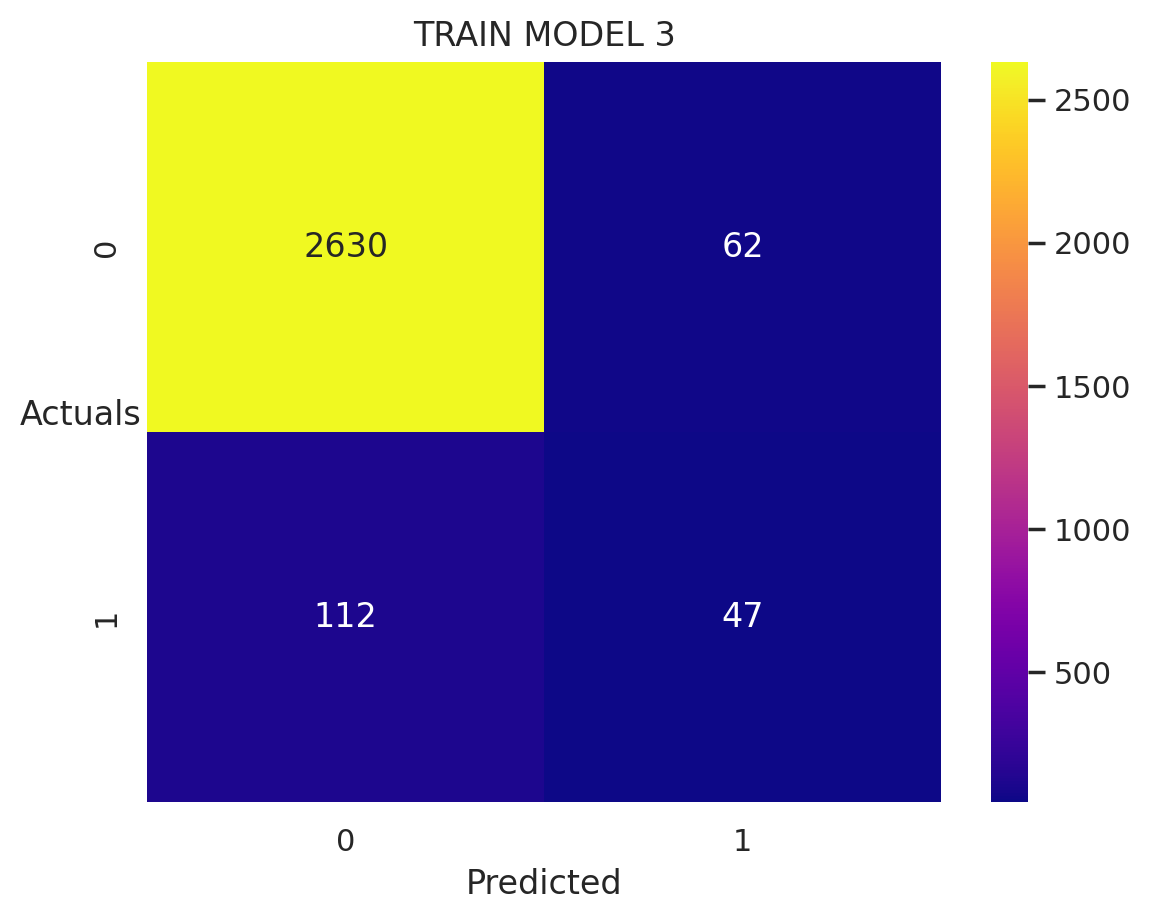

In [120]:
## MODEL 3 TRAIN

y_prob_pred_train = model_3.predict(X_train)

y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('TRAIN MODEL 3')

print(metrics.classification_report(y_train,y_class_pred))

<Axes: >

Text(0.5, 19.049999999999997, 'Predicted')

Text(46.25, 0.5, 'Actuals')

Text(0.5, 1.0, 'TEST MODEL 1')

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97      1330
         1.0       0.37      0.27      0.31        75

    accuracy                           0.94      1405
   macro avg       0.66      0.62      0.64      1405
weighted avg       0.93      0.94      0.93      1405



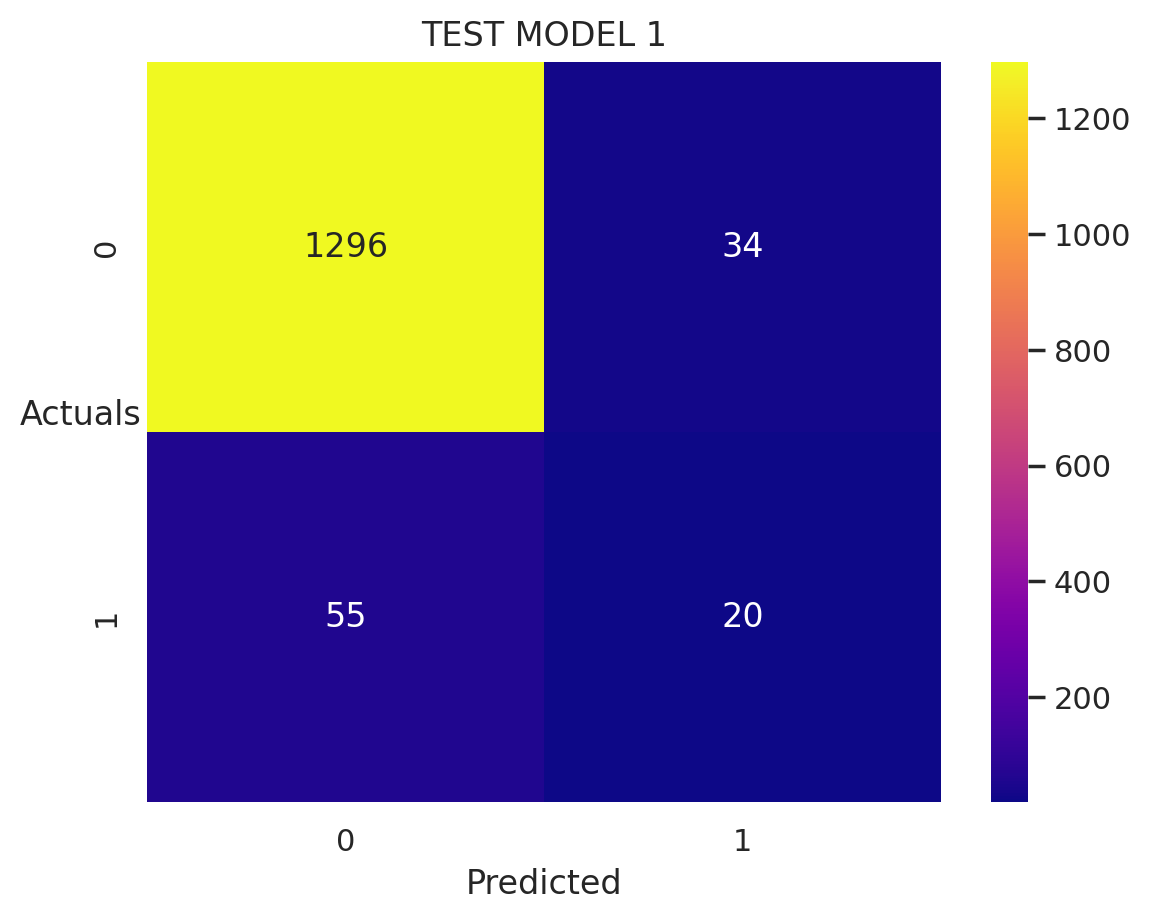

In [122]:
## MODEL 3 TEST

y_prob_pred_test = model_3.predict(X_test)

y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('TEST MODEL 1')

print(metrics.classification_report(y_test,y_class_pred))

In [123]:
X_test.shape

(1405, 12)

### <span style="font-family: Arial; font-weight:bold;font-size:1.4em;color:#02A3FF"> MODEL 4

In [124]:

X_train, X_test, y_train, y_test = train_test_split(X, df_y,
                                                    test_size = 0.33, random_state=42)

In [125]:
v = pd.DataFrame(model_3.pvalues.sort_values(ascending=False), columns=['pvalue']).reset_index()
v

index        pvalue
0                                  Change_in_stock  5.220845e-01
1                Cash_to_current_liabilities_times  1.780305e-01
2                                        PE_on_BSE  4.468270e-02
3   Total_term_liabilities__to__tangible_net_worth  5.099119e-03
4                              Net_working_capital  1.640703e-03
5                                       TOL_to_TNW  1.710797e-04
6                                     Adjusted_EPS  4.438646e-05
7                     Income_from_fincial_services  6.133158e-06
8                      PAT_as_perc_of_total_income  2.804415e-08
9                      Cumulative_retained_profits  1.278763e-08
10                                    Other_income  4.746734e-09
11                               Quick_ratio_times  6.156341e-12

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6"> Dropping Variables recursively with p-values greater than 0.05

* We check p-values of all predictor variables
* We arrange these variables in decreasing order of p-values
* We check if the top predictor variable has p-value > 0.05
* If yes, then it means that this variable is not significant in predicting default at 95% Confidence
* Hence, we drop ONLY this Top Variable and check for p-values again
* We run this in a loop and drop variables one by one till we get all p-values < 0.05

In [126]:
import time
start = time.time()

for i in range(23):
    model_4 = SM.Logit(y_train, X_train).fit()
    v = pd.DataFrame(model_4.pvalues.sort_values(ascending=False), columns=['pvalue']).reset_index()
    if (v.iloc[0,1] > 0.05):
        X_train = X_train.drop(columns=v.iloc[0,0])

end = time.time()
print('Time taken =', end-start)

Optimization terminated successfully.
         Current function value: 0.158232
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.158305
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.158612
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.158612
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.158612
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.158612
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.158612
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.158612
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.158612
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.158612
  

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#9B59B6"> Check p-values again

In [127]:
print(model_4.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2851
Model:                          Logit   Df Residuals:                     2841
Method:                           MLE   Df Model:                            9
Date:                Sun, 02 Feb 2025   Pseudo R-squ.:                  0.2628
Time:                        13:51:24   Log-Likelihood:                -452.20
converged:                       True   LL-Null:                       -613.44
Covariance Type:            nonrobust   LLR p-value:                 4.433e-64
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
PAT_as_perc_of_total_income                       -0.2454      0.044     -5.560      0.000      -0.332      -0.159
Income_from_fincial_ser

* We note that only those variables are included in the model which p-values less than 0.05
* All other variables with p-values > 0.05 are recursively dropped one by one

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#9B59B6"> Re-setting the Test set with only the required 9 variables chosen

In [128]:
X_train.shape

(2851, 10)

In [129]:
y_train.shape

(2851,)

In [131]:
X_test = X_test[X_train.columns]

In [132]:
X_test.shape

(1405, 10)

In [133]:
X_test.columns

Index(['PAT_as_perc_of_total_income', 'Income_from_fincial_services', 'Other_income', 'Cumulative_retained_profits', 'TOL_to_TNW', 'Total_term_liabilities__to__tangible_net_worth', 'Net_working_capital', 'Quick_ratio_times', 'Adjusted_EPS', 'PE_on_BSE'], dtype='object')

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6"> Metrics of Model 4

<Axes: >

Text(0.5, 19.049999999999997, 'Predicted')

Text(46.25, 0.5, 'Actuals')

Text(0.5, 1.0, 'TRAIN MODEL 4')

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      2692
         1.0       0.45      0.31      0.37       159

    accuracy                           0.94      2851
   macro avg       0.70      0.64      0.67      2851
weighted avg       0.93      0.94      0.94      2851



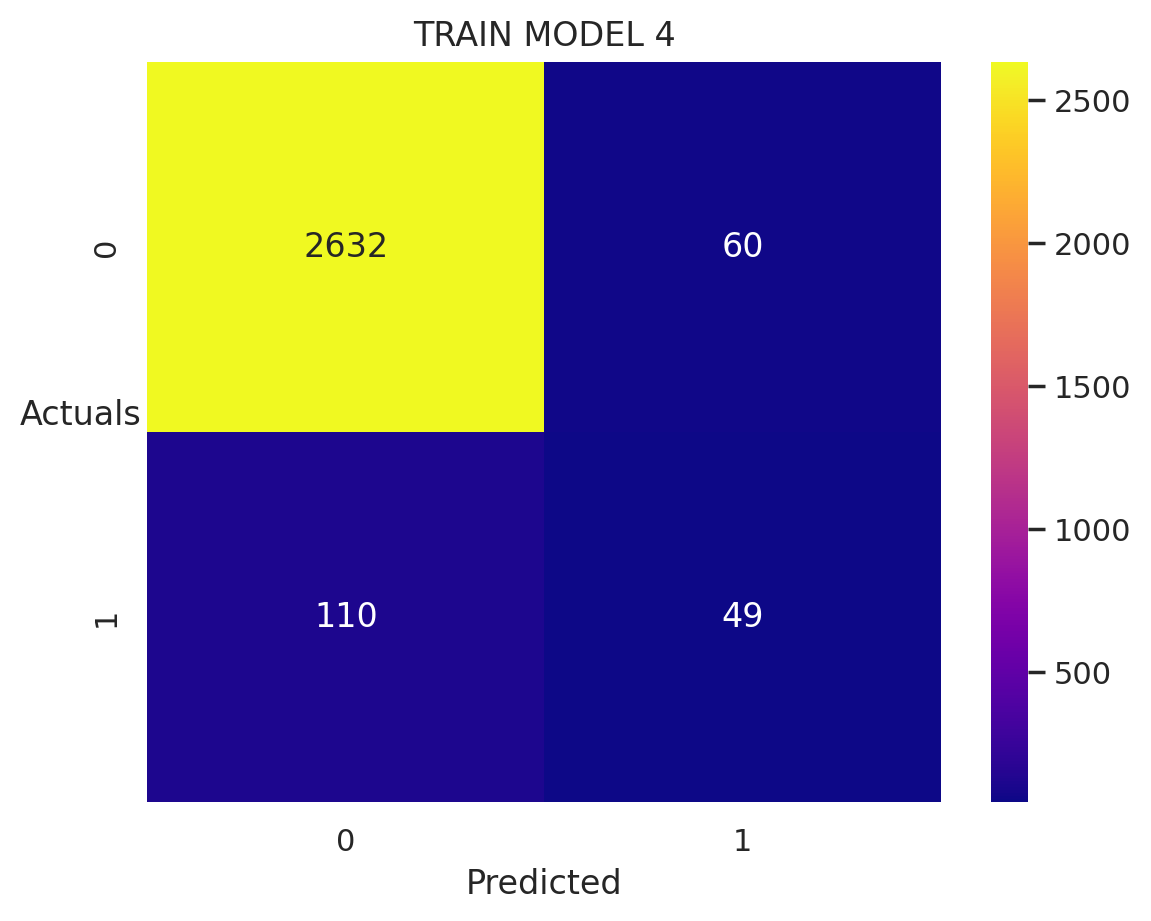

In [134]:
## MODEL 4 TRAIN

y_prob_pred_train = model_4.predict(X_train)

y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('TRAIN MODEL 4')

print(metrics.classification_report(y_train,y_class_pred))

<Axes: >

Text(0.5, 19.049999999999997, 'Predicted')

Text(46.25, 0.5, 'Actuals')

Text(0.5, 1.0, 'TEST MODEL 4')

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97      1330
         1.0       0.35      0.25      0.29        75

    accuracy                           0.93      1405
   macro avg       0.65      0.61      0.63      1405
weighted avg       0.93      0.93      0.93      1405



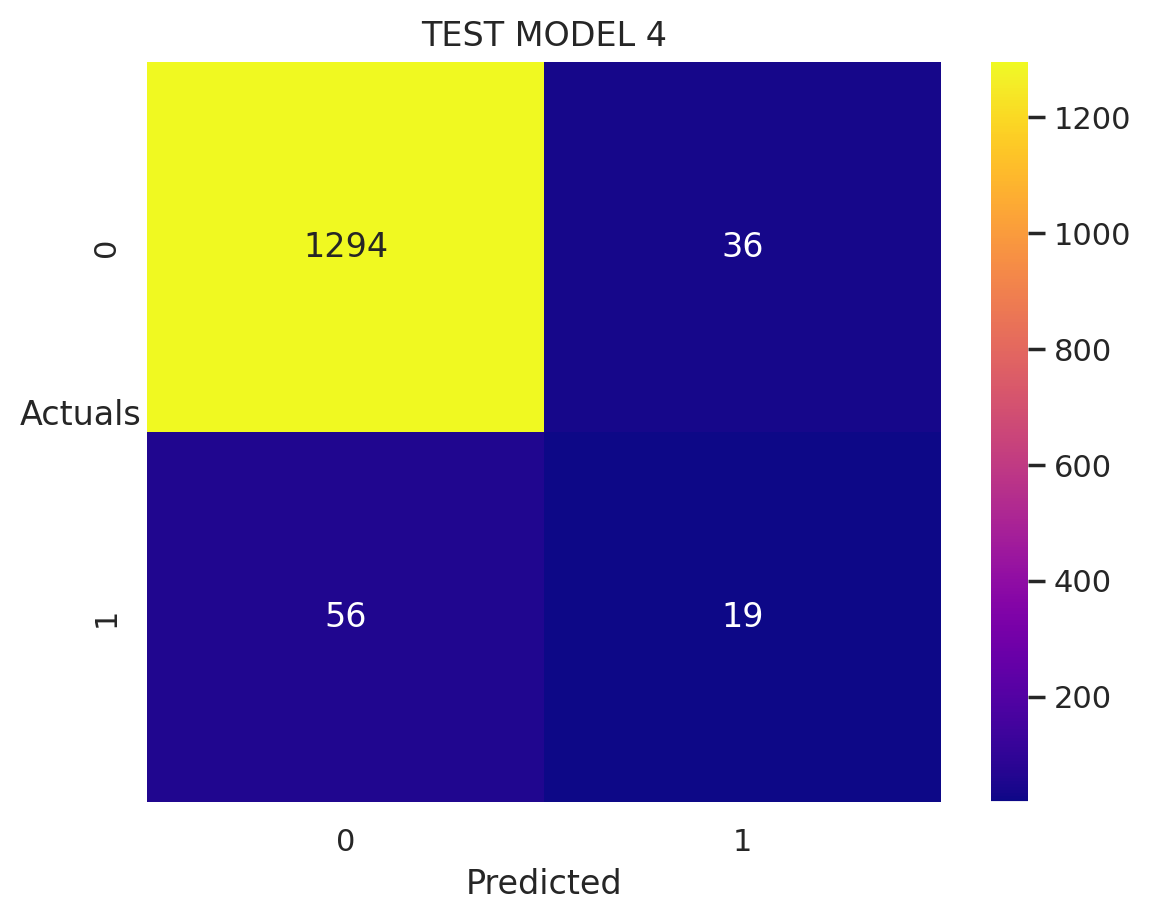

In [135]:
## MODEL 4 TEST

y_prob_pred_test = model_4.predict(X_test)

y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('TEST MODEL 4')

print(metrics.classification_report(y_test,y_class_pred))

* Model 3 has the best metrics
* But, Model 4 is also just slightly behind
* But majorly, Model 4 has only 9 predictors versus 23 of Model 3
* Hence, lets decide to continue with more analysis on Model 4

In [136]:
X_train.shape

(2851, 10)

In [ ]:
final_cols = X_train.columns
final_cols

Index(['Selling_Cost', 'PBIDT', 'ROG_Net_Worth_perc', 'ROG_Capital_Employed_perc', 'ROG_Total_Assets_perc', 'Current_Ratio_Latest', 'Interest_Cover_Ratio_Latest', 'APATM_perc_Latest', 'Book_Value_Adj_Unit_Curr'], dtype='object')

In [137]:
data = pd.concat([X_train, y_train], axis=1)
data1 = pd.concat([X_test, y_test], axis=1)
data.shape
data1.shape

(2851, 11)

(1405, 11)

In [138]:
final_data = pd.concat([data, data1], axis=0)
final_data.shape

(4256, 11)

In [139]:
final_data.to_csv('final_data.csv')
final_data.to_excel('final_data.xlsx')

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6"> Model 5

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00B1C6"> Logistic Regression - Fine Tuning by using GridSearchCV

In [140]:
X_train.shape

(2851, 10)

In [141]:
grid={'penalty':['l2','none', 'l1'],
      'solver':['lbfgs', 'liblinear', 'sag', 'saga', 'newton-cg'],
      'tol':[0.0001,0.00001]}

In [142]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [143]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 10,n_jobs=-1,scoring='f1', verbose=True)

In [144]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none', 'l1'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga',
                                    'newton-cg'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1', verbose=True)

In [145]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='liblinear')


In [146]:
best_model = grid_search.best_estimator_

In [147]:
logit4_train_score = best_model.score(X_train, y_train)
logit4_test_score = best_model.score(X_test, y_test)
logit4_test_f1 = metrics.f1_score(y_test, best_model.predict(X_test))
logit4_test_f0 = metrics.f1_score(y_test, best_model.predict(X_test), pos_label=0)

print('Regularised Logistic Regression Train Score =', round(logit4_train_score, 4))
print('Regularised Logistic Regression Test Score =', round(logit4_test_score, 4))
print('Regularised Logistic Regression f1 Test Score for "1" =', round(logit4_test_f1, 4))
print('Regularised Logistic Regression f1 Test Score for "0" =', round(logit4_test_f0, 4))

Regularised Logistic Regression Train Score = 0.9498
Regularised Logistic Regression Test Score = 0.9523
Regularised Logistic Regression f1 Test Score for "1" = 0.3619
Regularised Logistic Regression f1 Test Score for "0" = 0.9752


In [148]:
print('TEST REGULARISED MODEL')
print('')
print(metrics.classification_report(y_test, best_model.predict(X_test)))

TEST REGULARISED MODEL

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1330
         1.0       0.63      0.25      0.36        75

    accuracy                           0.95      1405
   macro avg       0.80      0.62      0.67      1405
weighted avg       0.94      0.95      0.94      1405



### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6"> Model 6

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#9B59B6"> Choosing Optimal Threshold for Model 4

In [149]:
X_train.shape

(2851, 10)

In [150]:
from sklearn.metrics import roc_curve

y_prob_pred_train = model_4.predict(X_train)
fpr, tpr, thresholds = roc_curve(y_train,y_prob_pred_train)

In [151]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.06015824257451113

<Axes: >

Text(0.5, 19.049999999999997, 'Predicted')

Text(46.25, 0.5, 'Actuals')

Text(0.5, 1.0, 'TRAIN MODEL 6')

              precision    recall  f1-score   support

         0.0       0.99      0.80      0.89      2692
         1.0       0.20      0.84      0.32       159

    accuracy                           0.80      2851
   macro avg       0.59      0.82      0.60      2851
weighted avg       0.94      0.80      0.85      2851



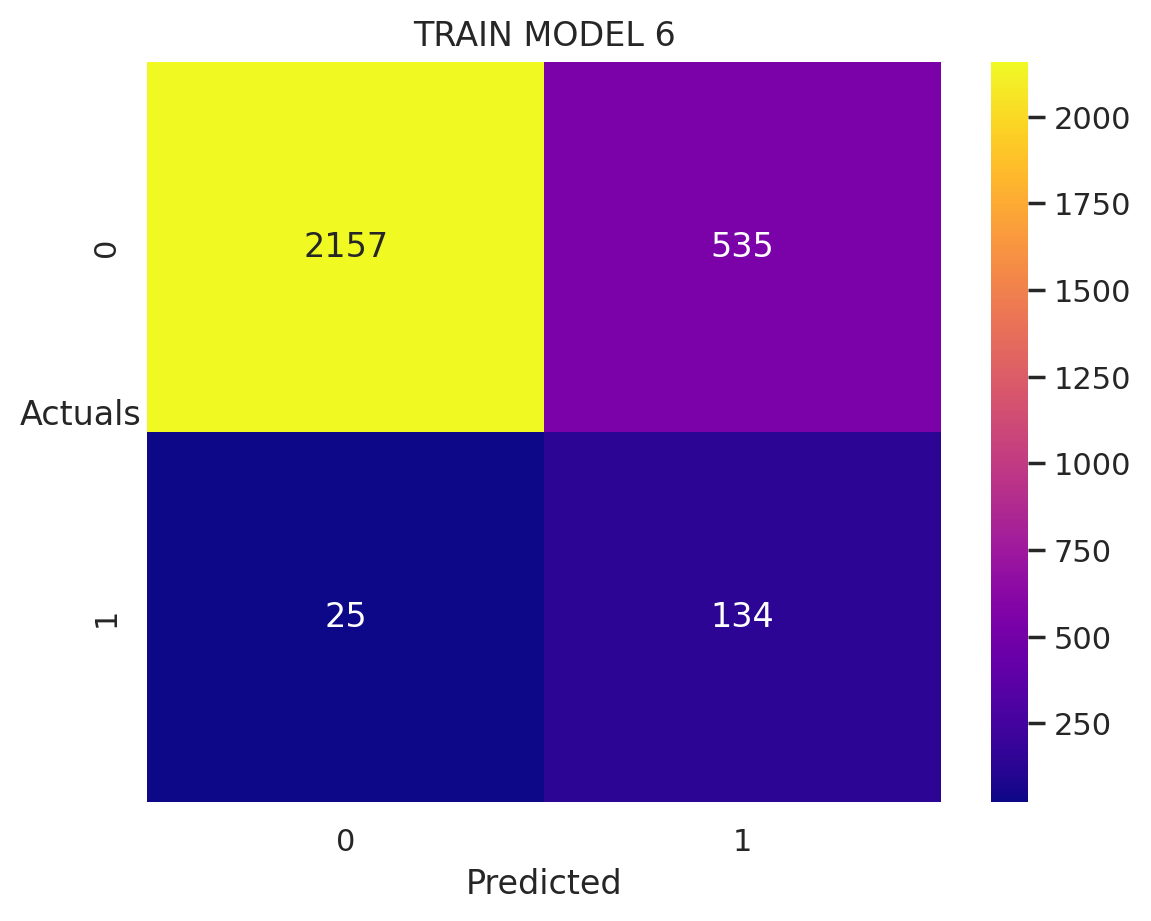

In [153]:
## MODEL 6 TRAIN

y_prob_pred_train = model_4.predict(X_train)

y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>optimal_threshold:
        a=1
    else:
        a=0
    y_class_pred.append(a)

from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('TRAIN MODEL 6')

print(metrics.classification_report(y_train,y_class_pred))

<Axes: >

Text(0.5, 19.049999999999997, 'Predicted')

Text(46.25, 0.5, 'Actuals')

Text(0.5, 1.0, 'TEST MODEL 6')

              precision    recall  f1-score   support

         0.0       0.98      0.78      0.87      1330
         1.0       0.17      0.79      0.28        75

    accuracy                           0.78      1405
   macro avg       0.58      0.78      0.57      1405
weighted avg       0.94      0.78      0.84      1405



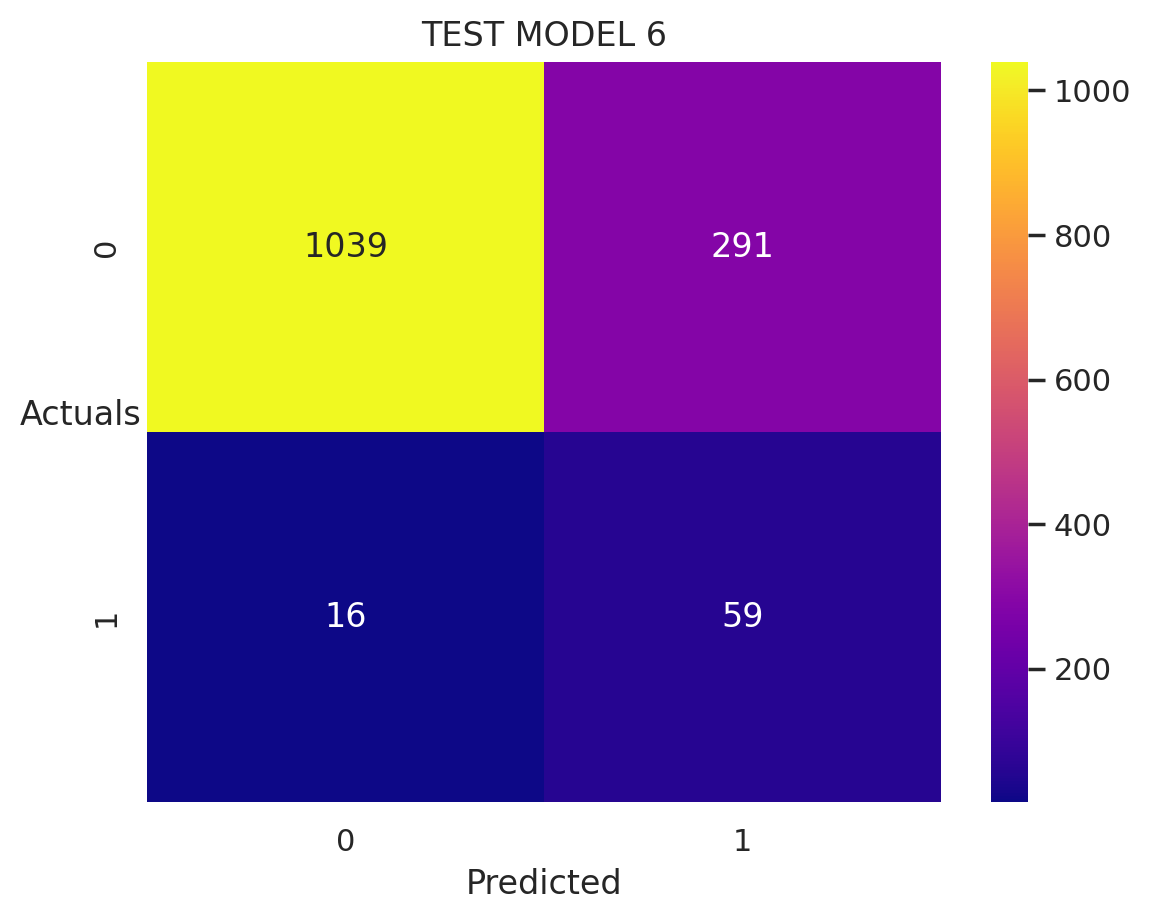

In [154]:
## MODEL 6 TEST

y_prob_pred_test = model_4.predict(X_test)

y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>optimal_threshold:
        a=1
    else:
        a=0
    y_class_pred.append(a)

from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('TEST MODEL 6')

print(metrics.classification_report(y_test,y_class_pred))

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6"> Model 7

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#9B59B6"> Using Recursive Feature Elimination Method to choose features

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, df_y,
                                                    test_size = 0.33, random_state=42)


#### For modeling we will use Logistic Regression with recursive feature elimination
from sklearn.feature_selection import RFE

LogR = LogisticRegression()

selector = RFE(estimator = LogR, n_features_to_select=15, step=1)

selector = selector.fit(X_train, y_train)

df = pd.DataFrame({'Feature': X.columns, 'Rank': selector.ranking_})

In [156]:
df.sort_values(by='Rank')

Feature  Rank
0                                  Change_in_stock     1
1                      PAT_as_perc_of_total_income     1
2                     Income_from_fincial_services     1
3                                     Other_income     1
4                      Cumulative_retained_profits     1
5                                       TOL_to_TNW     1
6   Total_term_liabilities__to__tangible_net_worth     1
7                              Net_working_capital     1
8                                Quick_ratio_times     1
9                Cash_to_current_liabilities_times     1
10                                    Adjusted_EPS     1
11                                       PE_on_BSE     1

In [158]:
pred_train = selector.predict(X_train)
pred_test = selector.predict(X_test)

print(confusion_matrix(y_train, pred_train))

print(classification_report(y_train, pred_train))

[[2661   31]
 [ 115   44]]
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      2692
         1.0       0.59      0.28      0.38       159

    accuracy                           0.95      2851
   macro avg       0.77      0.63      0.67      2851
weighted avg       0.94      0.95      0.94      2851



In [159]:
print(confusion_matrix(y_test, pred_test))

print(classification_report(y_test, pred_test))

[[1321    9]
 [  55   20]]
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1330
         1.0       0.69      0.27      0.38        75

    accuracy                           0.95      1405
   macro avg       0.82      0.63      0.68      1405
weighted avg       0.95      0.95      0.94      1405



### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6"> Model 8

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#9B59B6"> Using SMOTE to Balance the target Variable 'default'

We use SMOTE on Model 7 - RFE

In [160]:

df = df[df['Rank'] == 1]

l = df['Feature'].values
list(l)

X = X[l]
X.columns
X.shape

['Change_in_stock',
 'PAT_as_perc_of_total_income',
 'Income_from_fincial_services',
 'Other_income',
 'Cumulative_retained_profits',
 'TOL_to_TNW',
 'Total_term_liabilities__to__tangible_net_worth',
 'Net_working_capital',
 'Quick_ratio_times',
 'Cash_to_current_liabilities_times',
 'Adjusted_EPS',
 'PE_on_BSE']

Index(['Change_in_stock', 'PAT_as_perc_of_total_income', 'Income_from_fincial_services', 'Other_income', 'Cumulative_retained_profits', 'TOL_to_TNW', 'Total_term_liabilities__to__tangible_net_worth', 'Net_working_capital', 'Quick_ratio_times', 'Cash_to_current_liabilities_times', 'Adjusted_EPS', 'PE_on_BSE'], dtype='object')

(4256, 12)

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, df_y,
                                                    test_size = 0.33, random_state=42)

In [163]:
X_train.shape

(2851, 12)

In [164]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=33)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [165]:
selector_smote = selector.fit(X_res, y_res)

In [166]:
selector_smote.n_features_


12

In [167]:
smote_model8 = pd.DataFrame({'Feature': X_train.columns, 'Rank': selector_smote.ranking_})
smote_model8 = smote_model8[smote_model8['Rank'] == 1]
smote_model8

Feature  Rank
0                                  Change_in_stock     1
1                      PAT_as_perc_of_total_income     1
2                     Income_from_fincial_services     1
3                                     Other_income     1
4                      Cumulative_retained_profits     1
5                                       TOL_to_TNW     1
6   Total_term_liabilities__to__tangible_net_worth     1
7                              Net_working_capital     1
8                                Quick_ratio_times     1
9                Cash_to_current_liabilities_times     1
10                                    Adjusted_EPS     1
11                                       PE_on_BSE     1

In [168]:
smote_model8.to_csv('smote_model8.csv')

In [169]:
l = smote_model8['Feature'].values
list(l)
l

['Change_in_stock',
 'PAT_as_perc_of_total_income',
 'Income_from_fincial_services',
 'Other_income',
 'Cumulative_retained_profits',
 'TOL_to_TNW',
 'Total_term_liabilities__to__tangible_net_worth',
 'Net_working_capital',
 'Quick_ratio_times',
 'Cash_to_current_liabilities_times',
 'Adjusted_EPS',
 'PE_on_BSE']

array(['Change_in_stock', 'PAT_as_perc_of_total_income',
       'Income_from_fincial_services', 'Other_income',
       'Cumulative_retained_profits', 'TOL_to_TNW',
       'Total_term_liabilities__to__tangible_net_worth',
       'Net_working_capital', 'Quick_ratio_times',
       'Cash_to_current_liabilities_times', 'Adjusted_EPS', 'PE_on_BSE'],
      dtype=object)

In [170]:
data15 = X[l]
data15['default'] = df_y
data15_orig = df_imputed[l]
data15_orig['default'] = df_y

data15.to_csv('data15.csv')
data15_orig.to_csv('data15_orig.csv')

In [171]:
df_orig_new = df_orig.copy()
df_orig_new = df_orig_new[l]
df_orig_new['default'] = df_y
df_orig_new.to_csv('df_orig15.csv')

In [172]:
pred_train_smote = selector_smote.predict(X_res)
pred_test_smote = selector_smote.predict(X_test)

In [173]:
print(classification_report(y_res, pred_train_smote))

              precision    recall  f1-score   support

         0.0       0.86      0.85      0.86      2692
         1.0       0.85      0.87      0.86      2692

    accuracy                           0.86      5384
   macro avg       0.86      0.86      0.86      5384
weighted avg       0.86      0.86      0.86      5384



In [174]:
print(classification_report(y_test, pred_test_smote))

              precision    recall  f1-score   support

         0.0       0.99      0.85      0.91      1330
         1.0       0.24      0.84      0.37        75

    accuracy                           0.85      1405
   macro avg       0.61      0.85      0.64      1405
weighted avg       0.95      0.85      0.89      1405



In [175]:
X_res.shape
y_res.shape

(5384, 12)

(5384,)

In [176]:
X_test.shape
y_test.shape

(1405, 12)

(1405,)

In [177]:
import statsmodels.api as SM

# f1 = 'default ~ Equity_Paid_Up + Total_Debt + Other_Income + Selling_Cost + Adjusted_PAT + CEPS_annualised_Unit_Curr + Cash_Flow_From_Investing_Activities + Cash_Flow_From_Financing_Activities + Cash_Flow_From_Operating_Activities + ROG-Capital_Employed_perc + ROG-Gross_Block_perc + ROG-Net_Sales_perc + ROG-Cost_of_Production_perc + ROG-PAT_perc + Current_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + CPM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Value_of_Output_to_Total_Assets + Value_of_Output_to_Gross_Block + Gross_Block + Net_Working_Capital + Current_Assets + Book_Value_Adj_Unit_Curr'
model_8 = SM.Logit(y_res, X_res).fit()
print(model_8.summary())



Optimization terminated successfully.
         Current function value: 0.340383
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 5384
Model:                          Logit   Df Residuals:                     5372
Method:                           MLE   Df Model:                           11
Date:                Sun, 02 Feb 2025   Pseudo R-squ.:                  0.5089
Time:                        13:55:02   Log-Likelihood:                -1832.6
converged:                       True   LL-Null:                       -3731.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Change_in_stock                     

In [178]:
LRresult1 = (model_8.summary().tables[1])
LRresult1 = pd.DataFrame(LRresult1)
LRresult1.to_csv('model_8_summary.csv')

<Axes: >

Text(0.5, 19.049999999999997, 'Predicted')

Text(46.25, 0.5, 'Actuals')

Text(0.5, 1.0, 'TEST MODEL 8')

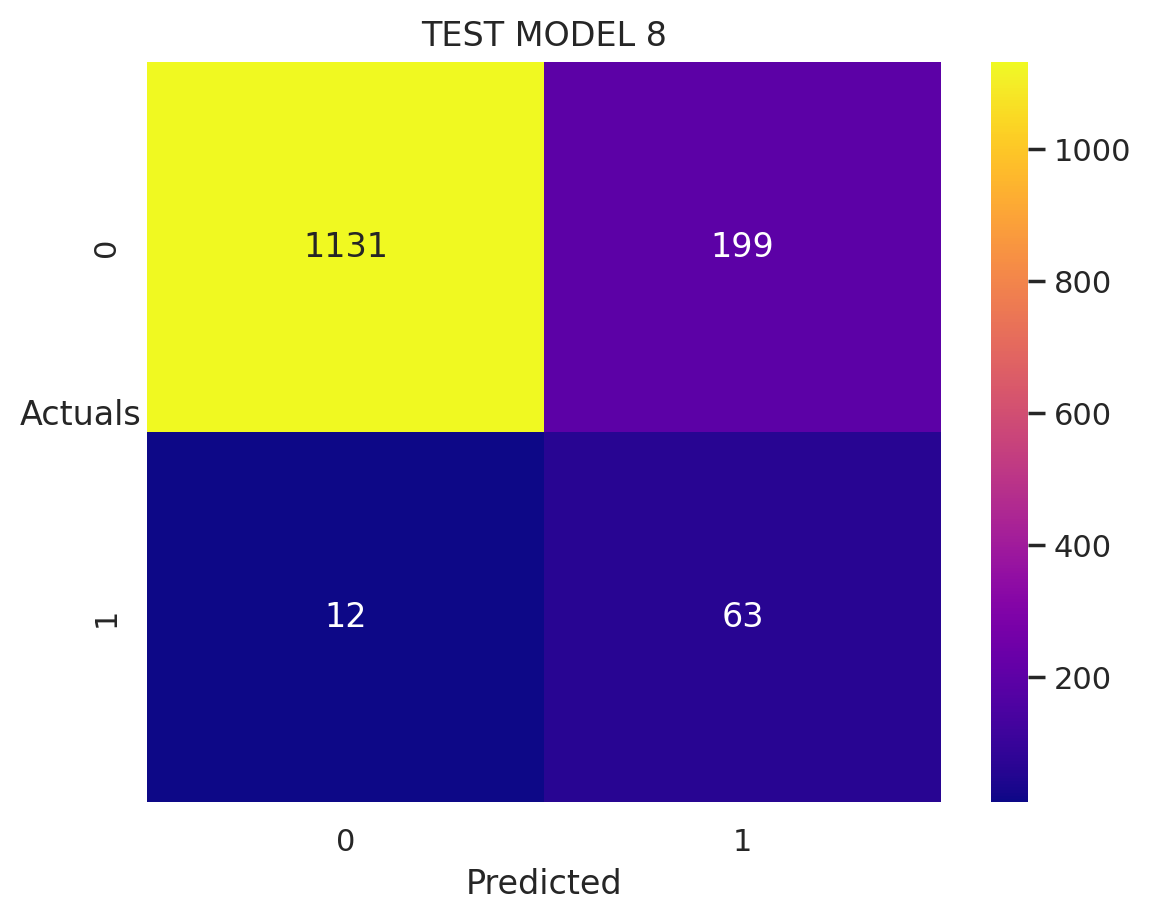

In [181]:
## MODEL 8 TEST

sns.heatmap((metrics.confusion_matrix(y_test,pred_test_smote)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('TEST MODEL 8')



In [182]:
print(metrics.classification_report(y_test,pred_test_smote))

cr = classification_report(y_test, pred_test_smote, output_dict=True)
cr = pd.DataFrame(cr).T
cr.to_csv('cr.csv')

              precision    recall  f1-score   support

         0.0       0.99      0.85      0.91      1330
         1.0       0.24      0.84      0.37        75

    accuracy                           0.85      1405
   macro avg       0.61      0.85      0.64      1405
weighted avg       0.95      0.85      0.89      1405



### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6"> Model 9

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#9B59B6"> Using SMOTE to Balance the target Variable 'default' and Choosing Optimal Threshold

In [183]:
selector_smote.predict_proba(X_res)

array([[0.97972433, 0.02027567],
       [0.85120917, 0.14879083],
       [0.88820592, 0.11179408],
       ...,
       [0.06928915, 0.93071085],
       [0.48725858, 0.51274142],
       [0.11323977, 0.88676023]])

In [184]:
from sklearn.metrics import roc_curve

y_prob_pred_train = selector_smote.predict_proba(X_res)[:,1]
y_prob_pred_test = selector_smote.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_res,y_prob_pred_train)

In [185]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.4886082544592728

In [186]:
y_prob_pred_test

array([0.01773008, 0.9434929 , 0.02882148, ..., 0.36854309, 0.16186002,
       0.96766122])

<Axes: >

Text(0.5, 19.049999999999997, 'Predicted')

Text(46.25, 0.5, 'Actuals')

Text(0.5, 1.0, 'TEST MODEL 9')

              precision    recall  f1-score   support

         0.0       0.99      0.85      0.91      1330
         1.0       0.24      0.84      0.37        75

    accuracy                           0.85      1405
   macro avg       0.61      0.84      0.64      1405
weighted avg       0.95      0.85      0.88      1405



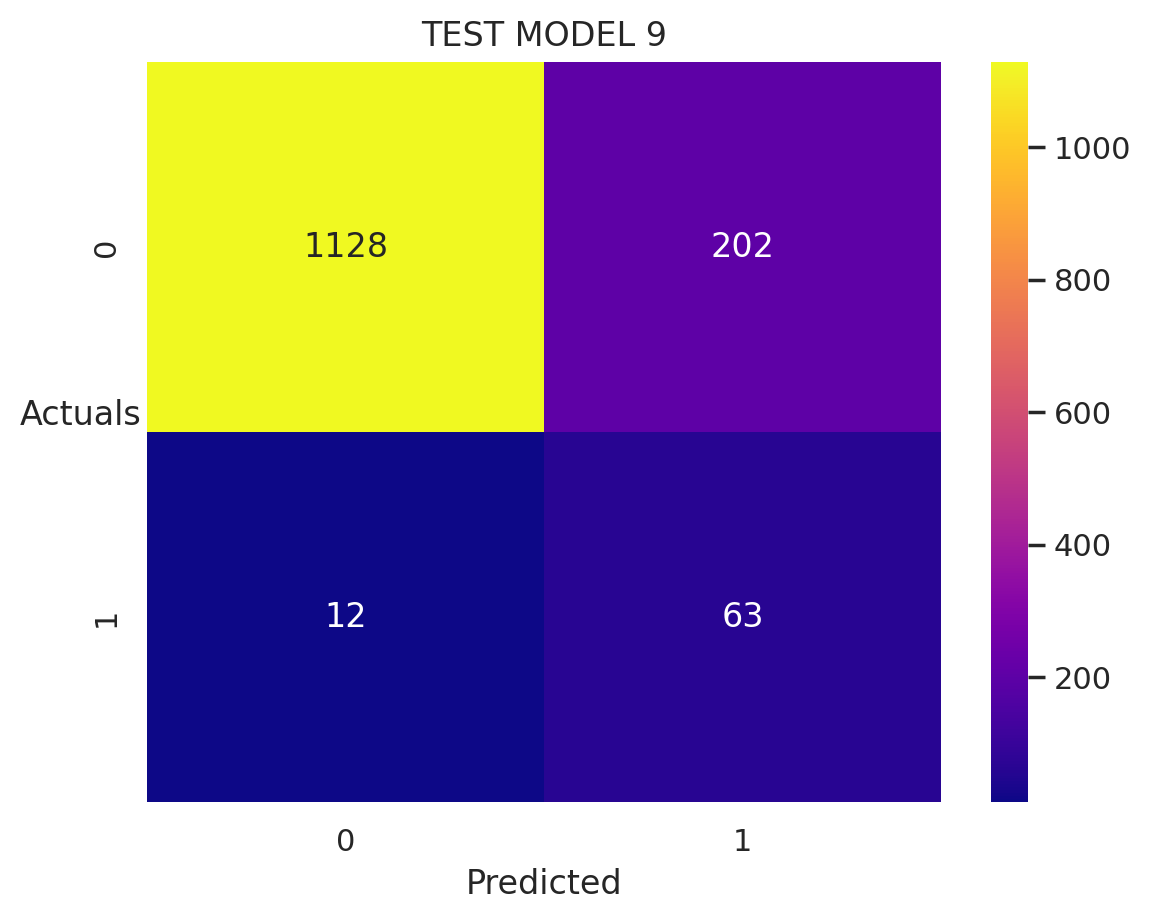

In [189]:


y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>optimal_threshold:
        a=1
    else:
        a=0
    y_class_pred.append(a)

from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('TEST MODEL 9')

print(metrics.classification_report(y_test,y_class_pred))

In [190]:
import statsmodels.api as SM

# f1 = 'default ~ Equity_Paid_Up + Total_Debt + Other_Income + Selling_Cost + Adjusted_PAT + CEPS_annualised_Unit_Curr + Cash_Flow_From_Investing_Activities + Cash_Flow_From_Financing_Activities + Cash_Flow_From_Operating_Activities + ROG-Capital_Employed_perc + ROG-Gross_Block_perc + ROG-Net_Sales_perc + ROG-Cost_of_Production_perc + ROG-PAT_perc + Current_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + CPM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Value_of_Output_to_Total_Assets + Value_of_Output_to_Gross_Block + Gross_Block + Net_Working_Capital + Current_Assets + Book_Value_Adj_Unit_Curr'
model_9 = SM.Logit(y_res, X_res).fit()
print(model_9.summary())


Optimization terminated successfully.
         Current function value: 0.340383
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 5384
Model:                          Logit   Df Residuals:                     5372
Method:                           MLE   Df Model:                           11
Date:                Sun, 02 Feb 2025   Pseudo R-squ.:                  0.5089
Time:                        13:55:53   Log-Likelihood:                -1832.6
converged:                       True   LL-Null:                       -3731.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Change_in_stock                     

In [191]:
LRresult = (model_9.summary().tables[1])
LRresult = pd.DataFrame(LRresult)
LRresult.to_csv('model_9_summary.csv')
LRresult

0           1          2          3       4          5          6
0                                                         coef    std err          z   P>|z|     [0.025     0.975]
1                                  Change_in_stock      0.1288      0.022      5.739   0.000      0.085      0.173
2                      PAT_as_perc_of_total_income     -0.3313      0.020    -16.914   0.000     -0.370     -0.293
3                     Income_from_fincial_services     -0.2977      0.046     -6.505   0.000     -0.387     -0.208
4                                     Other_income     -0.3619      0.046     -7.861   0.000     -0.452     -0.272
5                      Cumulative_retained_profits     -0.2544      0.017    -14.691   0.000     -0.288     -0.220
6                                       TOL_to_TNW      0.2535      0.045      5.670   0.000      0.166      0.341
7   Total_term_liabilities__to__tangible_net_worth      0.2959      0.051      5.799   0.000      0.196      0.396
8                              Net_working_capital     -0.1792      0.019     -9.620   0.000     -0.216     -0.143
9                                Quick_ratio_times     -0.1394      0.074     -1.881   0.060     -0.285      0.006
10               Cash_to_current_liabilities_times      0.1206      0.101      1.193   0.233     -0.078      0.319
11                                    Adjusted_EPS     -0.1611      0.024     -6.652   0.000     -0.209     -0.114
12                                       PE_on_BSE     -0.0175      0.019     -0.898   0.369     -0.056      0.021

In [192]:
import time
start = time.time()

for i in range(23):
    model_10 = SM.Logit(y_res, X_res).fit()
    v = pd.DataFrame(model_10.pvalues.sort_values(ascending=False), columns=['pvalue']).reset_index()
    if (v.iloc[0,1] > 0.05):
        X_res = X_res.drop(columns=v.iloc[0,0])

end = time.time()
print('Time taken =', end-start)

Optimization terminated successfully.
         Current function value: 0.340383
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.340458
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.340592
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.340803
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.340803
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.340803
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.340803
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.340803
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.340803
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.340803
  

In [193]:
print(model_10.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 5384
Model:                          Logit   Df Residuals:                     5375
Method:                           MLE   Df Model:                            8
Date:                Sun, 02 Feb 2025   Pseudo R-squ.:                  0.5083
Time:                        13:56:00   Log-Likelihood:                -1834.9
converged:                       True   LL-Null:                       -3731.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Change_in_stock                                    0.1303      0.022      5.976      0.000       0.088       0.173
PAT_as_perc_of_total_in

In [194]:
LRresult1 = (model_10.summary().tables[1])
LRresult1 = pd.DataFrame(LRresult1)
# LRresult1.to_csv('model_9_summary.csv')


In [198]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns

from scipy.stats import zscore                                        # ZSCORE SCALING
from sklearn.preprocessing import StandardScaler                      # ZScore
from sklearn.preprocessing import MinMaxScaler                        # Min Max Scaler

from sklearn.linear_model import LogisticRegression                   # Logistic Regression

from sklearn import metrics, model_selection                          # Evaluation Metrics
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,roc_auc_score,roc_curve, precision_recall_curve

from sklearn.model_selection import train_test_split, GridSearchCV    # Train test Split and Grid Search


%matplotlib inline
sns.set(color_codes=True)
sns.set_palette('pastel')

%config InlineBackend.figure_format ='retina'

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [199]:
comp = pd.read_csv('df_orig15.csv')
scaled_comp = pd.read_csv('data15.csv')

In [200]:
comp.drop('Unnamed: 0', axis=1, inplace=True)
scaled_comp.drop('Unnamed: 0', axis=1, inplace=True)
comp.head()

Change_in_stock  PAT_as_perc_of_total_income  Income_from_fincial_services  Other_income  Cumulative_retained_profits  TOL_to_TNW  Total_term_liabilities__to__tangible_net_worth  Net_working_capital  Quick_ratio_times  Cash_to_current_liabilities_times  Adjusted_EPS  PE_on_BSE  default
0             13.5                         7.28                           0.6           NaN                        248.9        1.28                                            0.99                163.1               0.99                               0.06          4.44        NaN      0.0
1             -3.7                         2.32                           NaN           0.2                         -8.2        1.53                                            0.21                  3.9               0.67                               0.02          0.00        NaN      0.0
2            -18.1                         1.18                           0.6           NaN                         53.1        1.70                                            0.33                 38.3               1.11                               0.19          0.00        NaN      0.0
3            212.2                         2.11                           2.0           NaN                        593.3        3.69                                            0.22               1455.1               0.99                               0.07         17.60        NaN      0.0
4              3.4                        -0.18                           0.2           0.8                         35.8        0.81                                            0.44                 20.8               0.35                               0.05         -6.52        NaN      0.0

In [201]:
scaled_comp.head()

Change_in_stock  PAT_as_perc_of_total_income  Income_from_fincial_services  Other_income  Cumulative_retained_profits  TOL_to_TNW  Total_term_liabilities__to__tangible_net_worth  Net_working_capital  Quick_ratio_times  Cash_to_current_liabilities_times  Adjusted_EPS  PE_on_BSE  default
0              3.0                         3.00                          0.60          2.84                          3.0        1.28                                            0.99                  3.0               0.99                               0.06           3.0        3.0      0.0
1             -3.0                         2.32                          1.05          0.20                         -3.0        1.53                                            0.21                  3.0               0.67                               0.02           3.0        3.0      0.0
2             -3.0                         1.18                          0.60          3.00                          3.0        1.70                                            0.33                  3.0               1.11                               0.19           3.0        3.0      0.0
3              3.0                         2.11                          2.00          3.00                          3.0        3.00                                            0.22                  3.0               0.99                               0.07           3.0        3.0      0.0
4              3.0                        -0.18                          0.20          0.80                          3.0        0.81                                            0.44                  3.0               0.35                               0.05          -3.0        3.0      0.0

<Axes: xlabel='default', ylabel='Adjusted_EPS'>

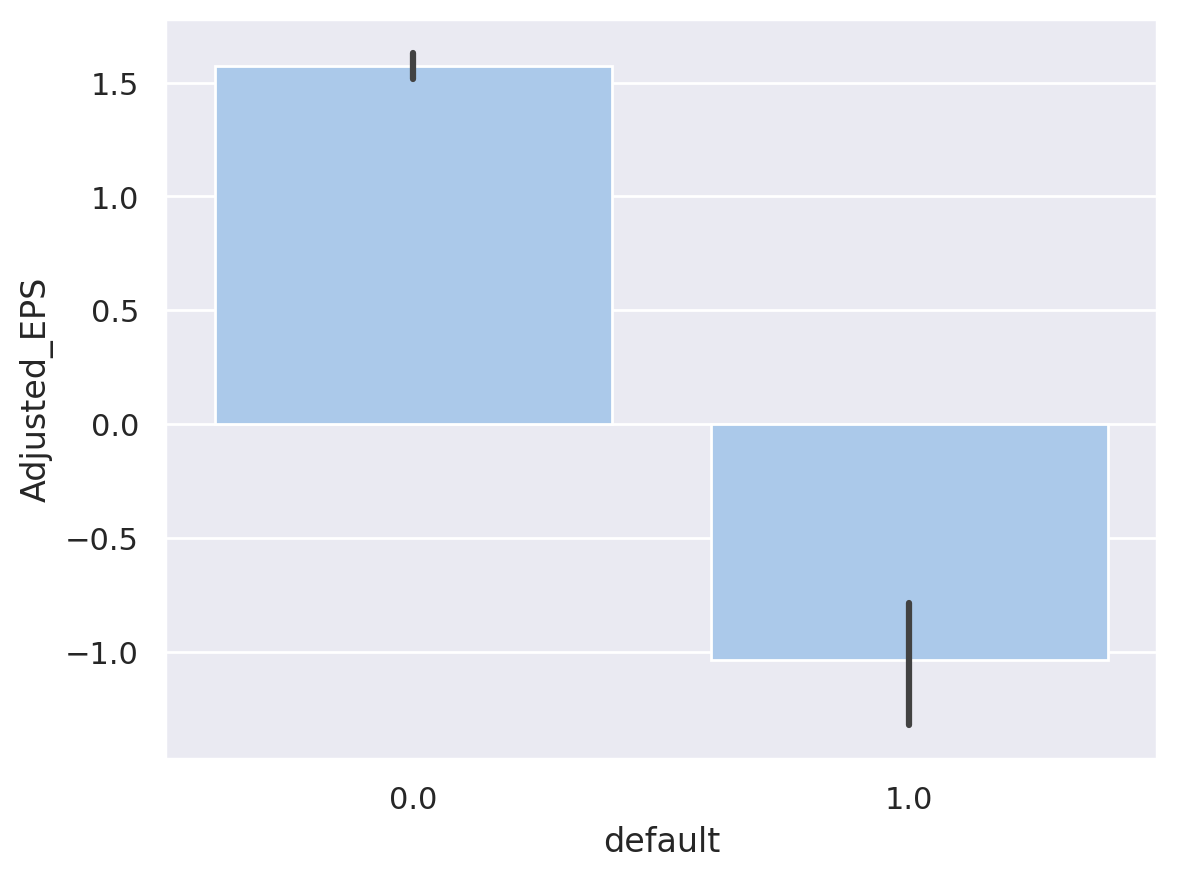

In [203]:
temp=scaled_comp.drop('default', axis=1)
sns.barplot(x=scaled_comp['default'], y=scaled_comp['Adjusted_EPS'])

In [204]:
grp_sc = scaled_comp.groupby('default').mean()

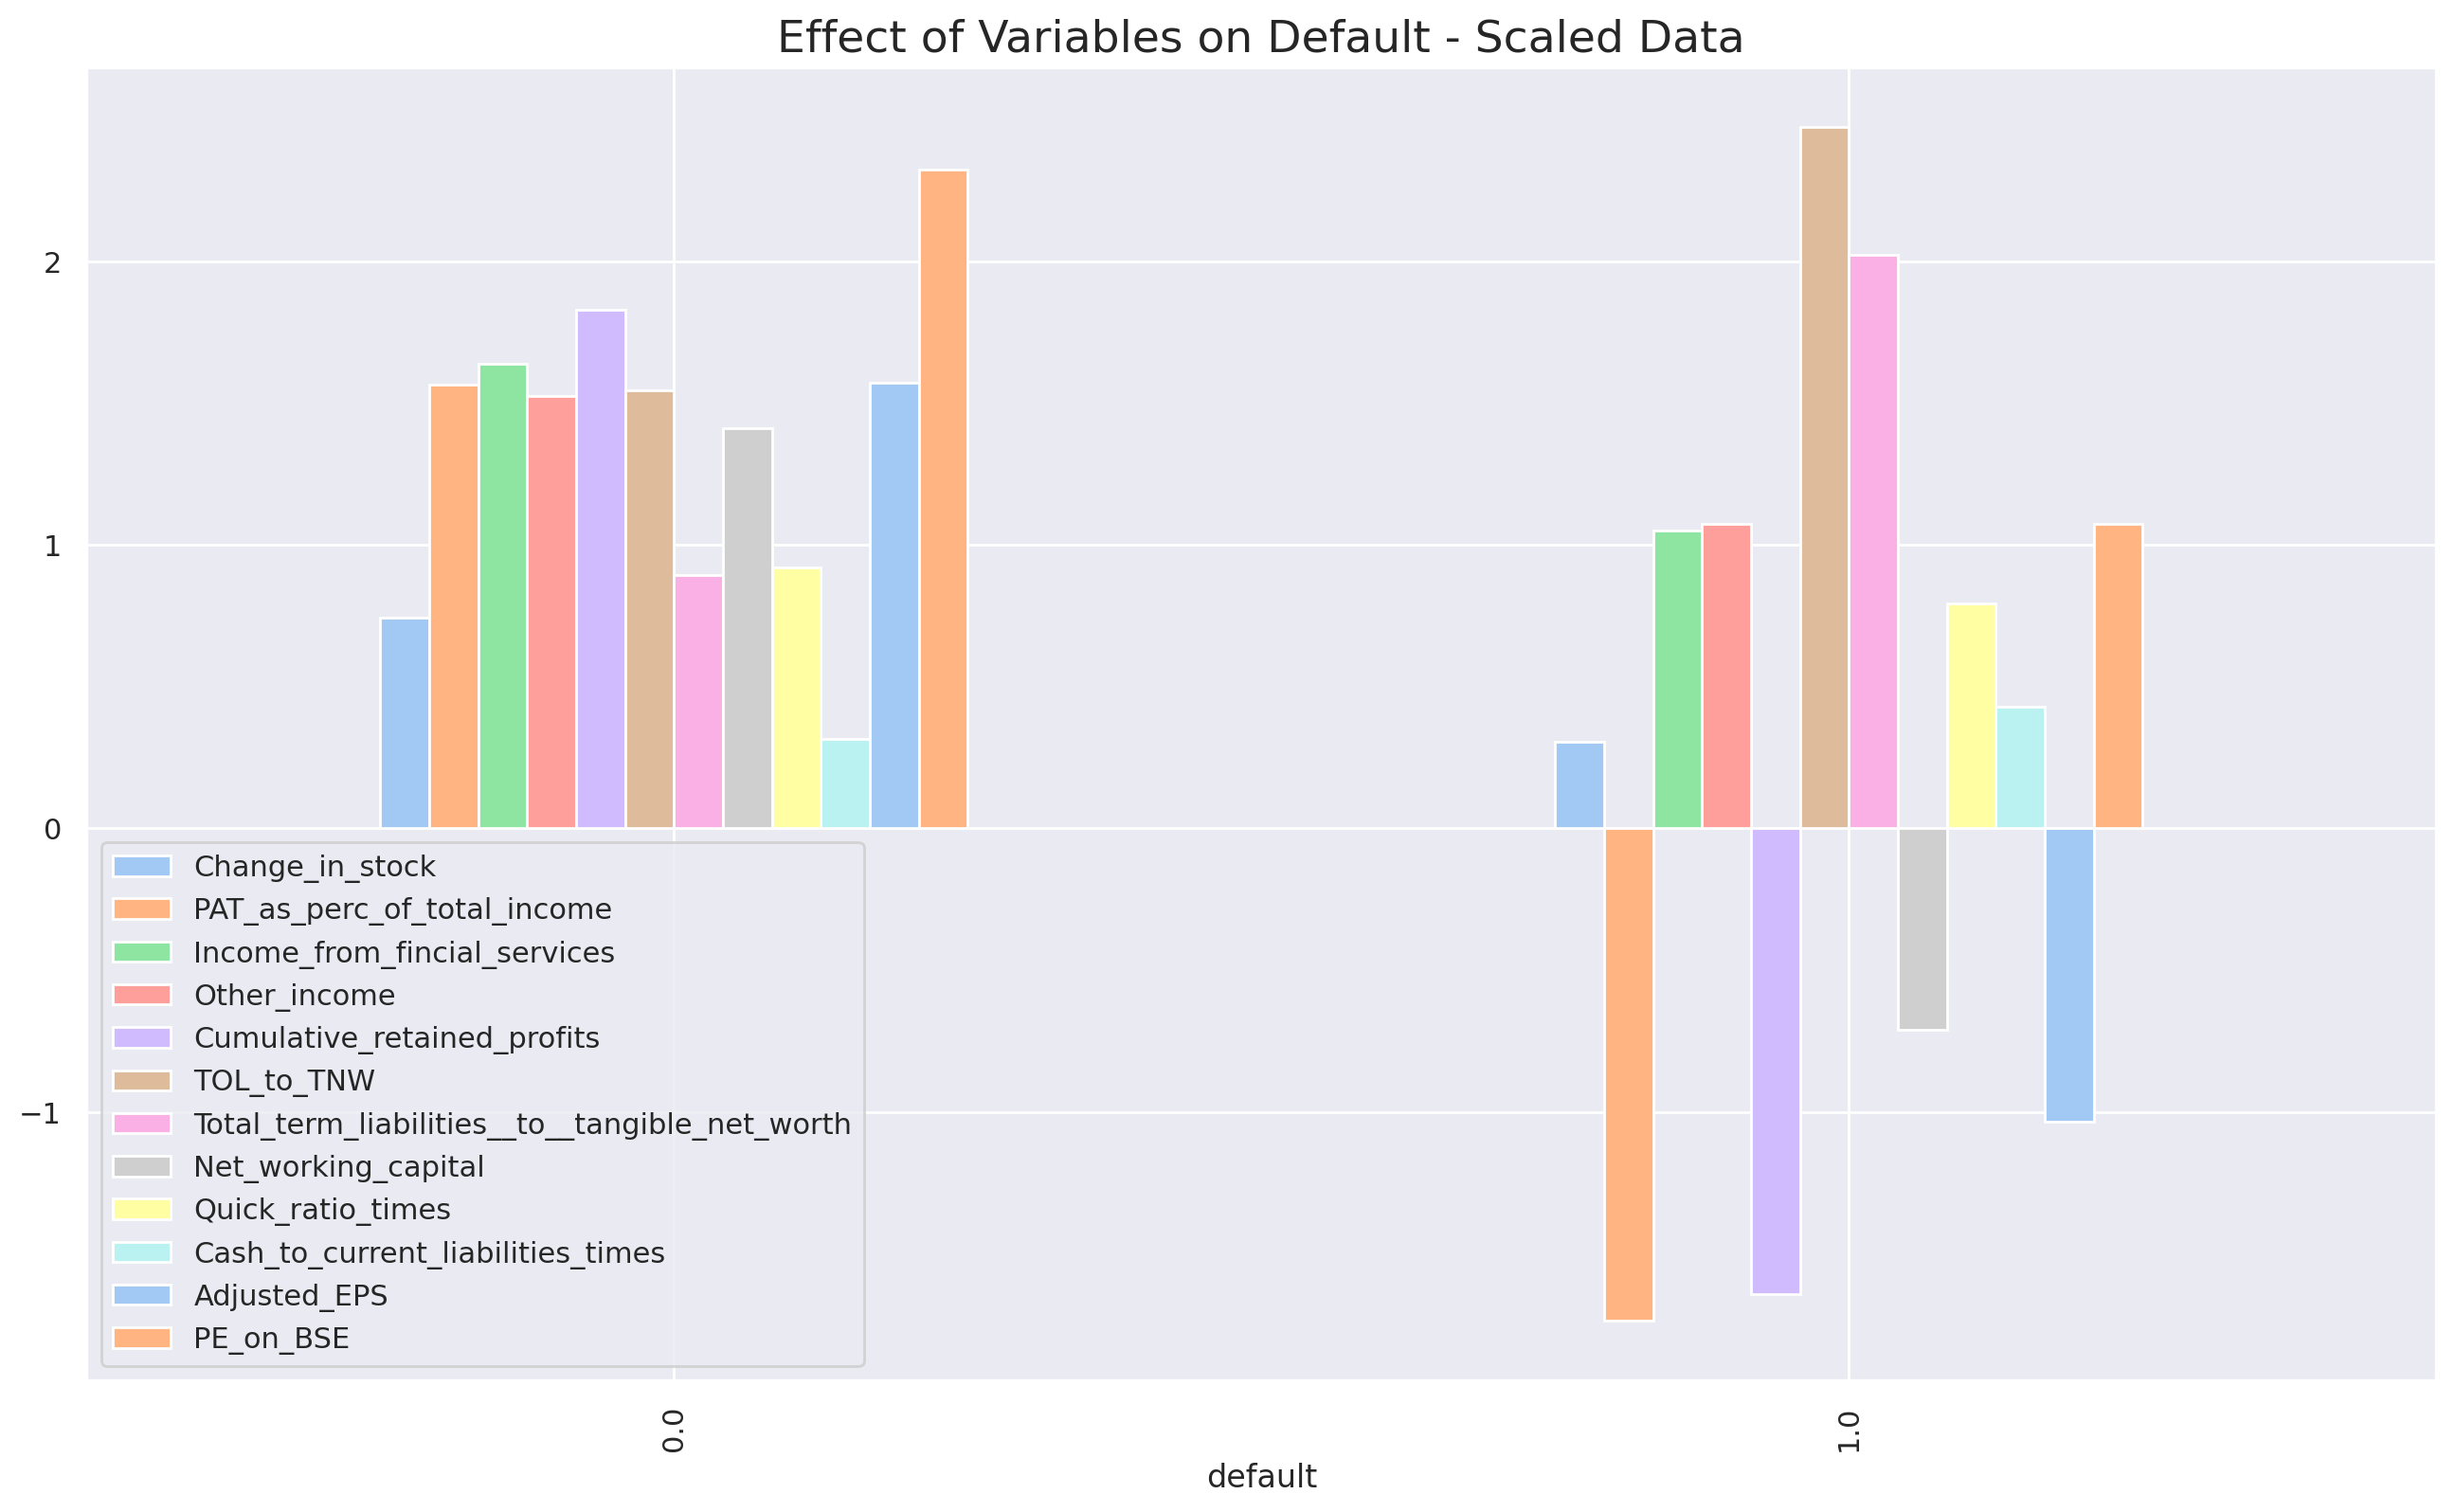

In [205]:
grp_sc.plot(kind='bar', figsize=(16,9))
plt.title('Effect of Variables on Default - Scaled Data', fontsize=17);
plt.savefig('vars_deault.jpg', bbox_inches='tight');

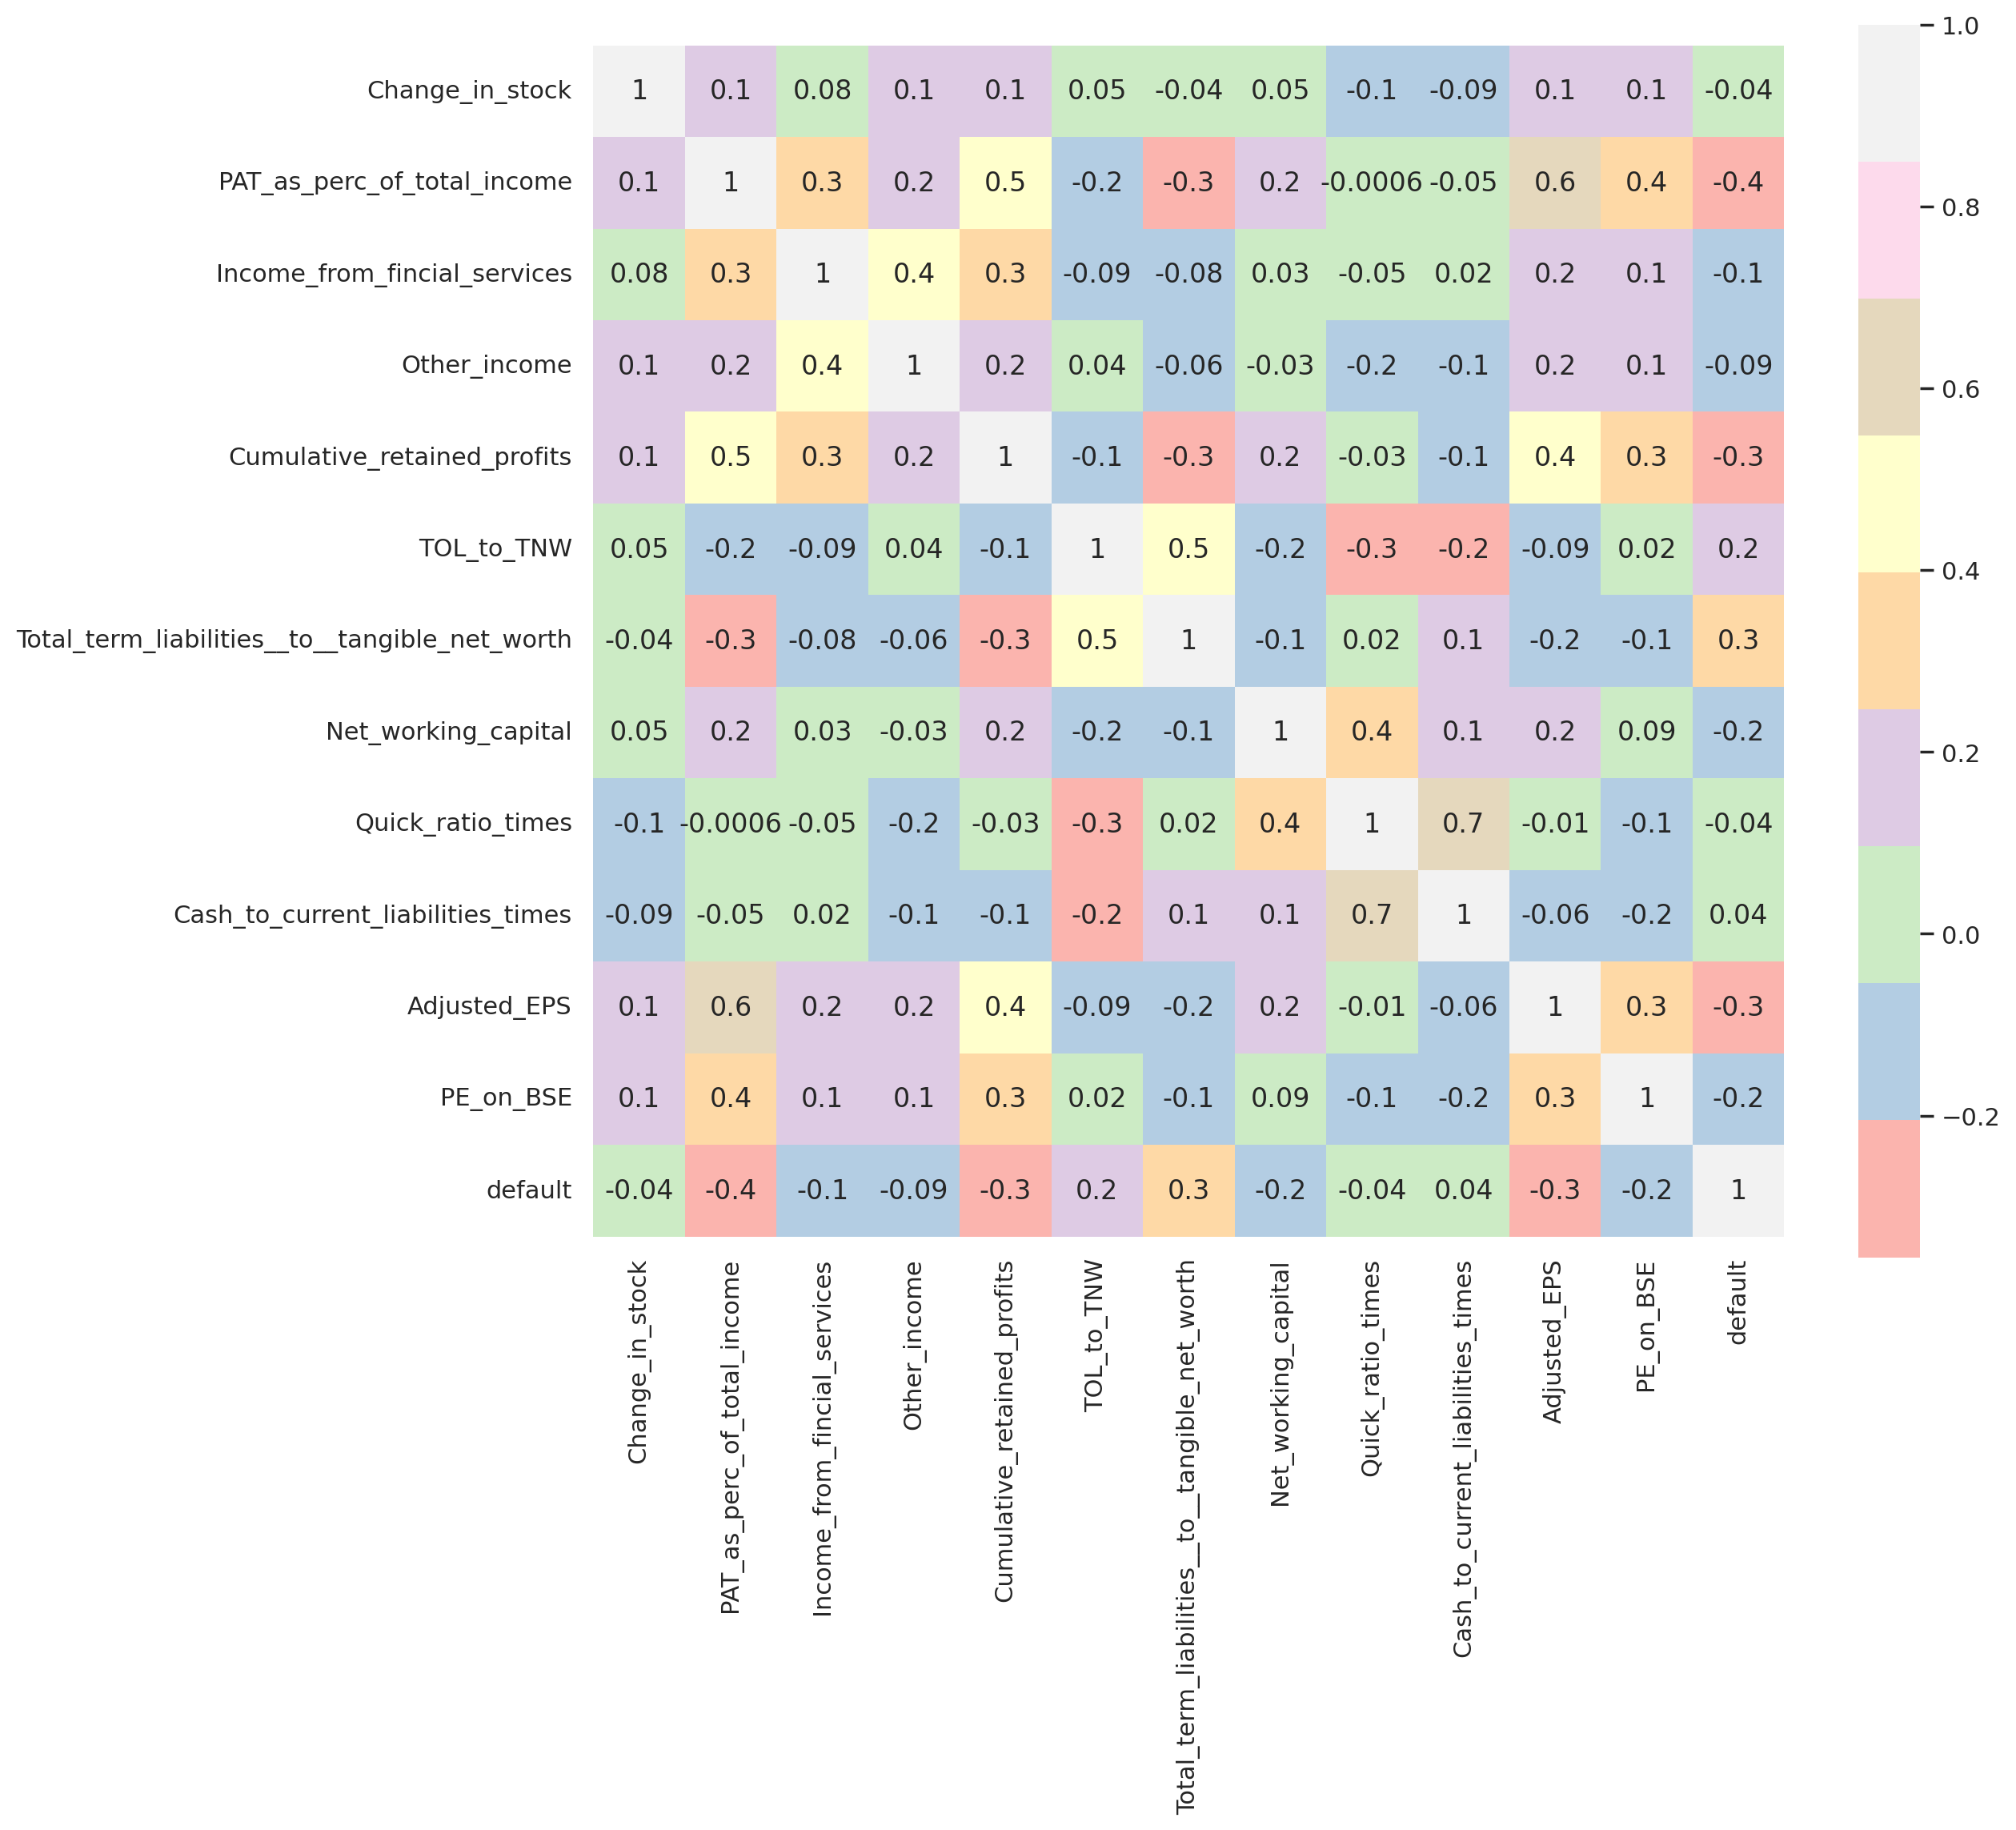

In [207]:
plt.figure(figsize=[12,10])
sns.heatmap(scaled_comp.corr(), annot=True, square=True, cmap='Pastel1', fmt='.1g')
plt.savefig('heatmap.jpg', bbox_inches='tight');

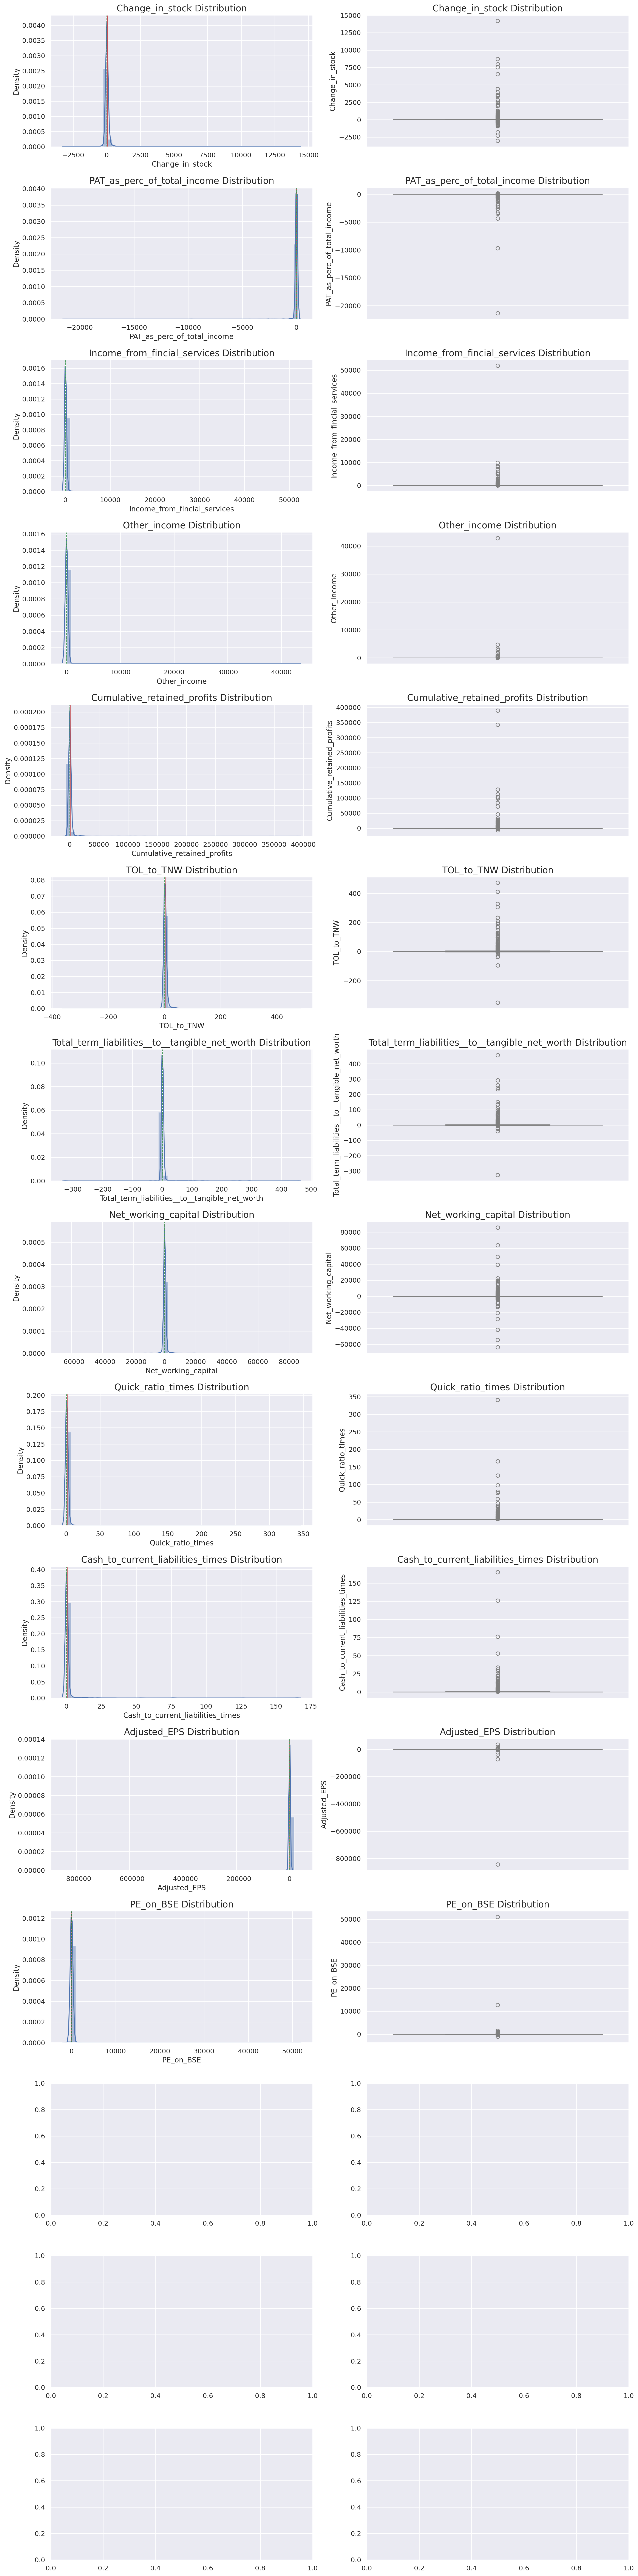

In [208]:
df = comp.drop('default', axis=1).copy()
cont=df.columns
fig, axes = plt.subplots(nrows=15,ncols=2);

fig.set_size_inches(15, 60);

for i in range(0, len(cont)):
    a = sns.distplot(df[cont[i]], ax=axes[i][0], color='b');
    a.set_title('{} Distribution'.format(cont[i]), fontsize=15);

    a.axvline(df[cont[i]].mean(), color='r', linewidth=1);
    a.axvline(df[cont[i]].median(), color='black', linestyle='dashed', linewidth=1);
    a.axvline(df[cont[i]].mode()[0], color='g', linestyle='dashed', linewidth=1);

    a = sns.boxplot(df[cont[i]], orient = "v" , ax=axes[i][1], palette='Pastel1');
    a.set_title('{} Distribution'.format(cont[i]), fontsize=15);
    plt.tight_layout();

plt.savefig('df_Distribution.jpg', bbox_inches='tight');

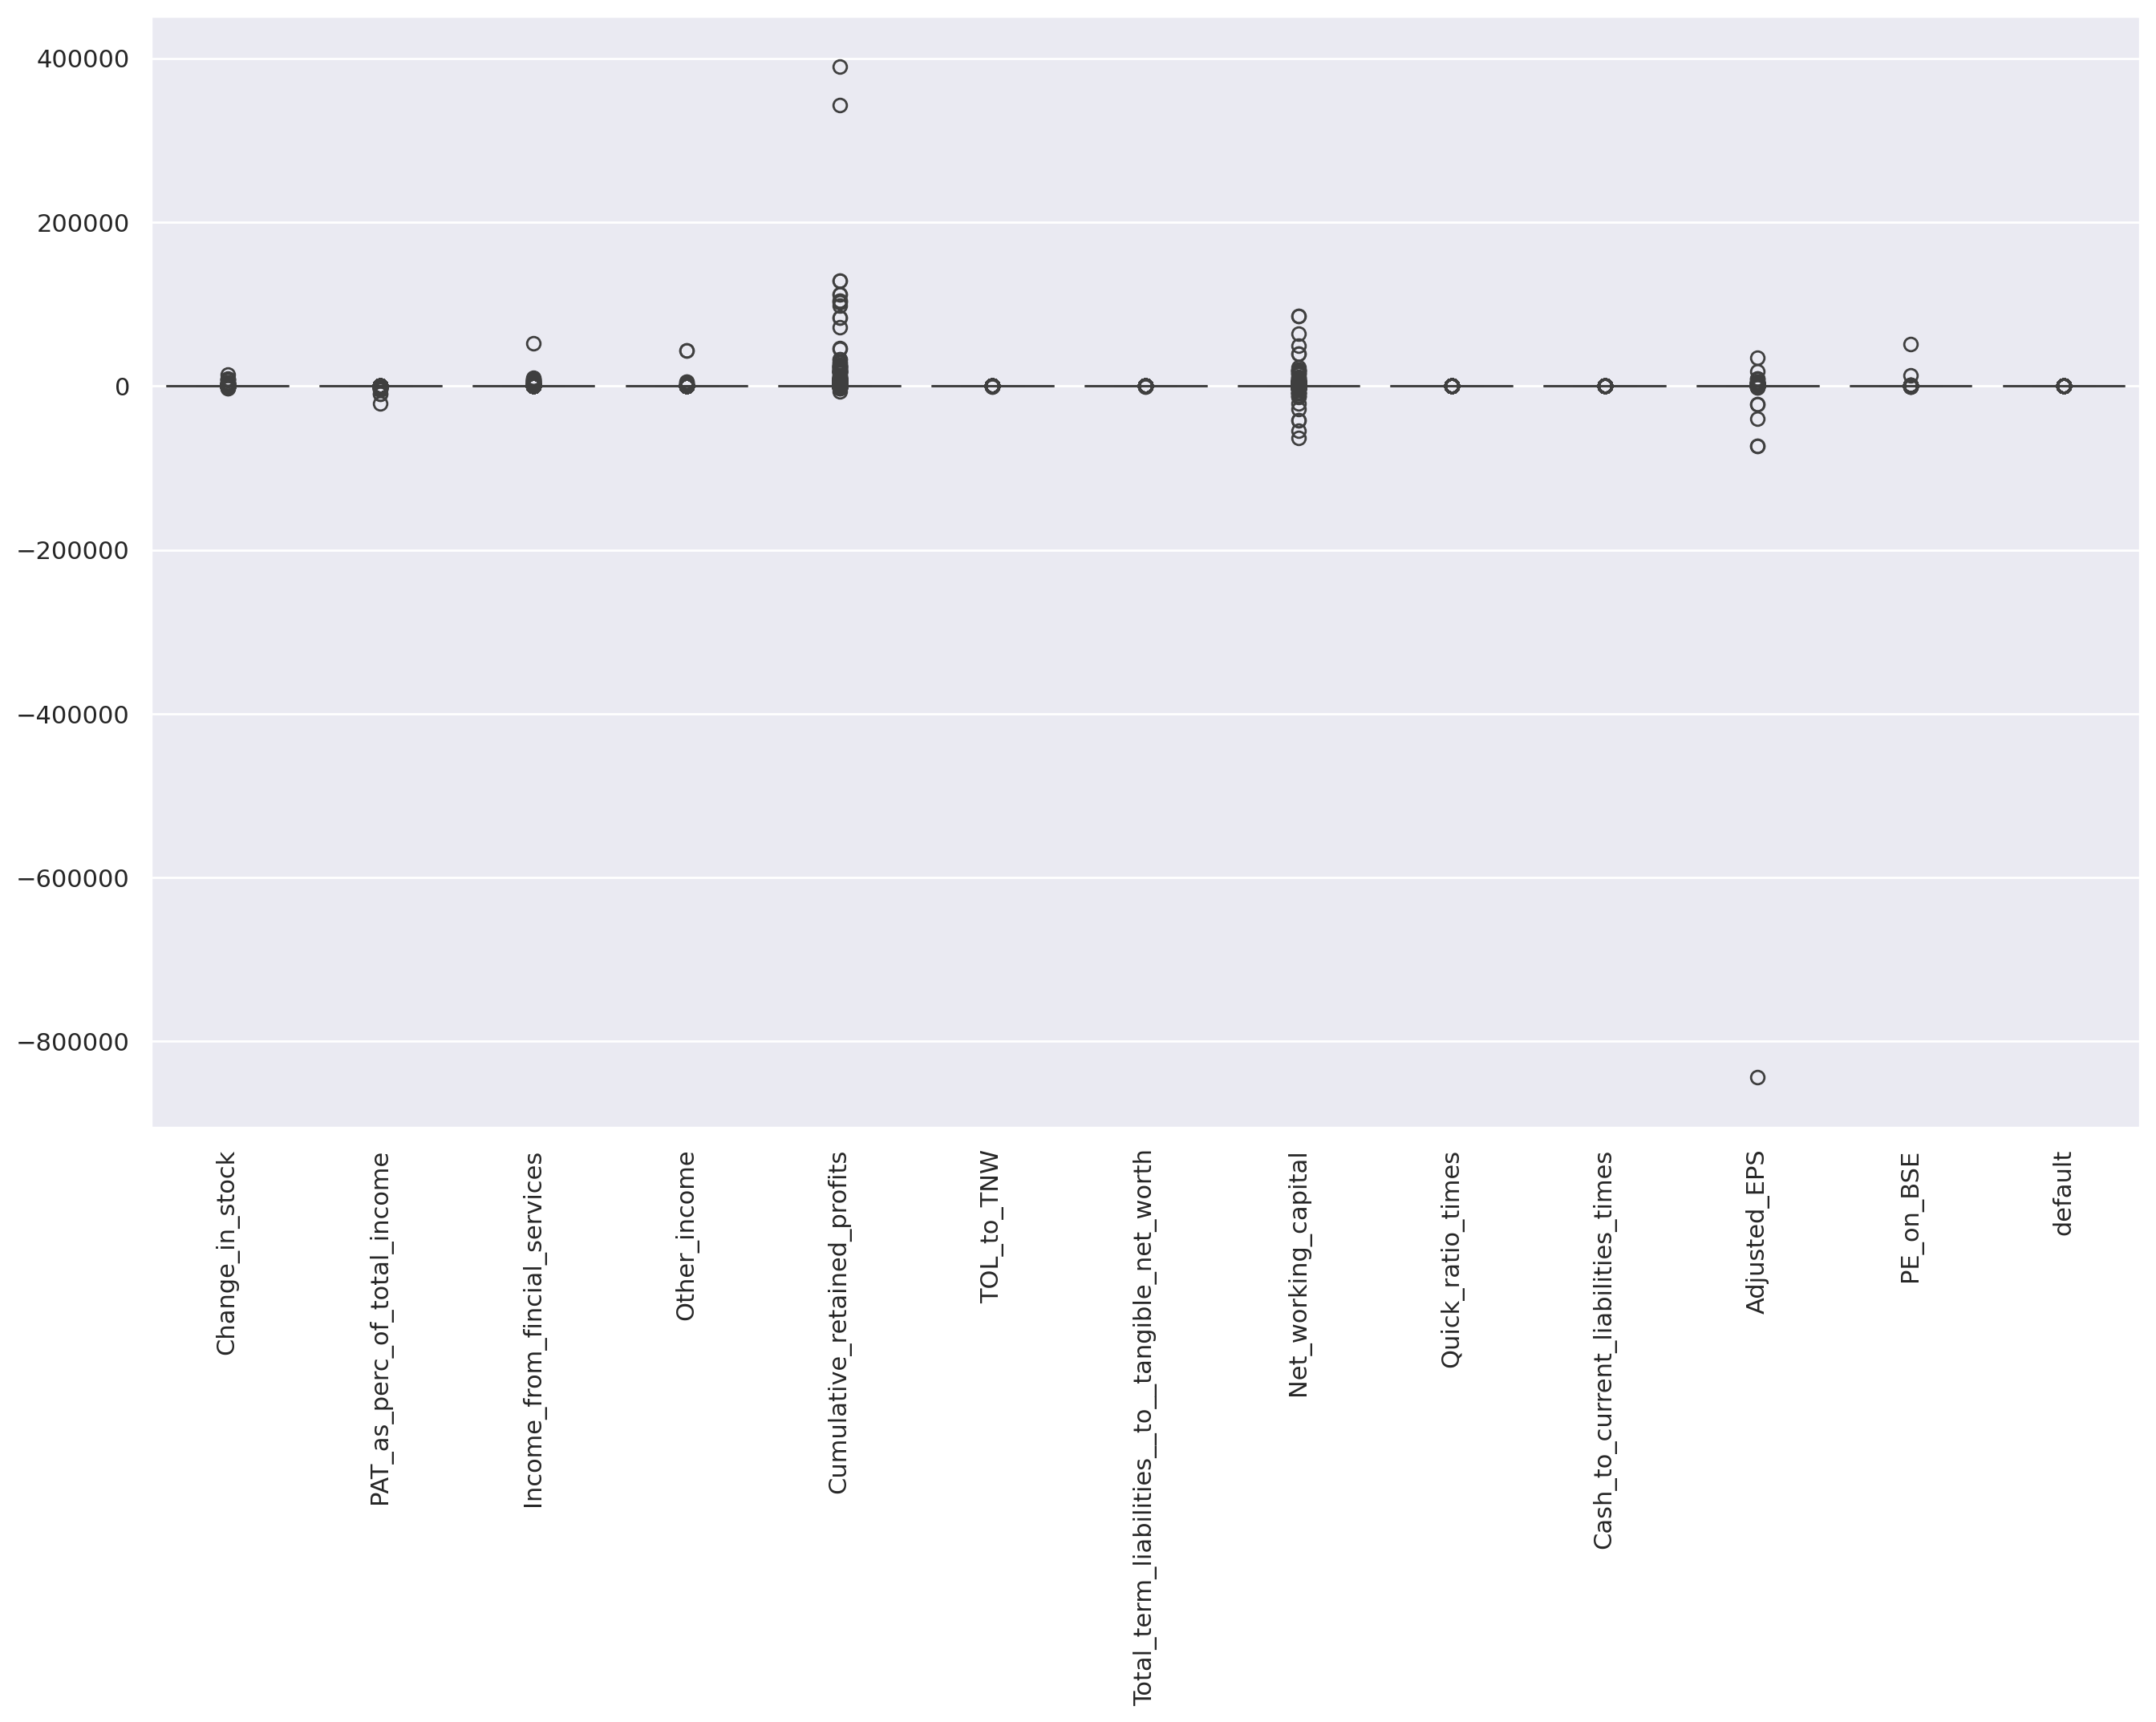

In [209]:
plt.figure(figsize=[16,9]);
sns.boxplot(data=comp);
plt.xticks(rotation=90);
plt.savefig('out_comp.jpg', bbox_inches='tight');

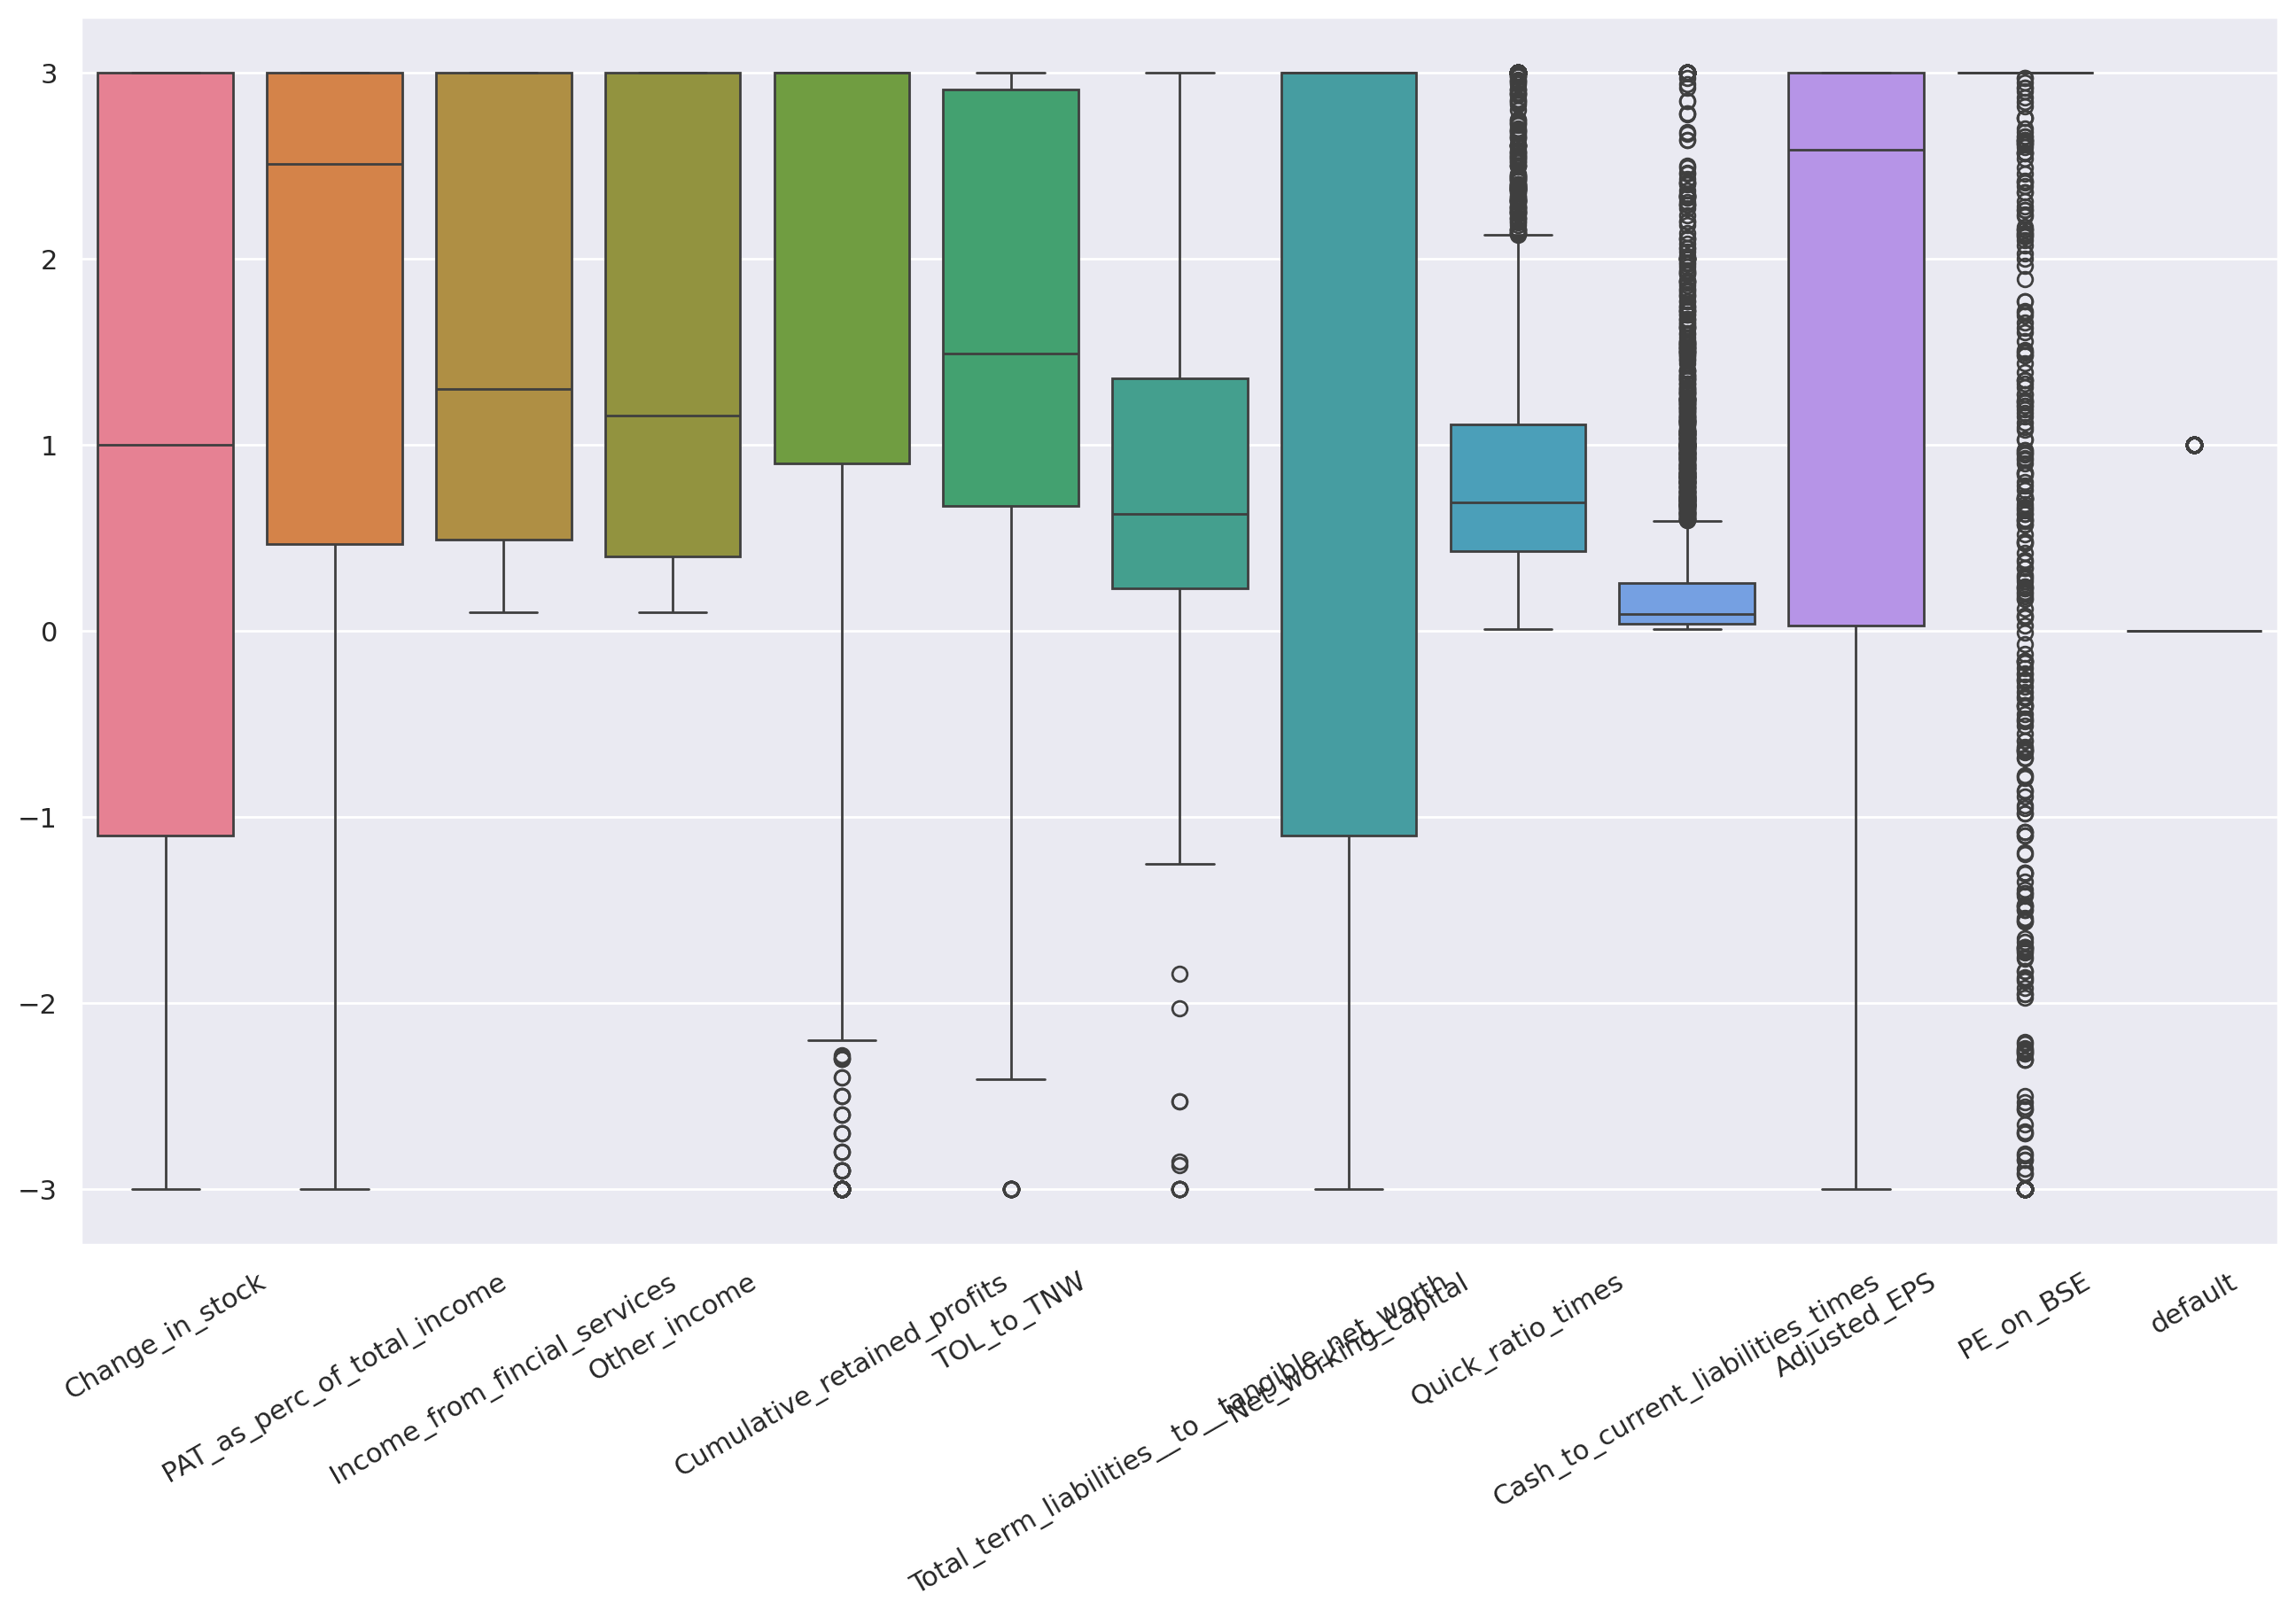

In [210]:
plt.figure(figsize=[16,9]);
sns.boxplot(data=scaled_comp);
plt.xticks(rotation=30);
plt.savefig('out_scaled_comp.jpg', bbox_inches='tight');

In [211]:
### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#9B59B6"> Outlier Treatment using IQR method

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range



In [212]:
comp_out = comp.copy()

for column in comp_out.columns:
    lr,ur=remove_outlier(comp_out[column])
    comp_out[column]=np.where(comp_out[column]>ur,ur,comp_out[column])
    comp_out[column]=np.where(comp_out[column]<lr,lr,comp_out[column])


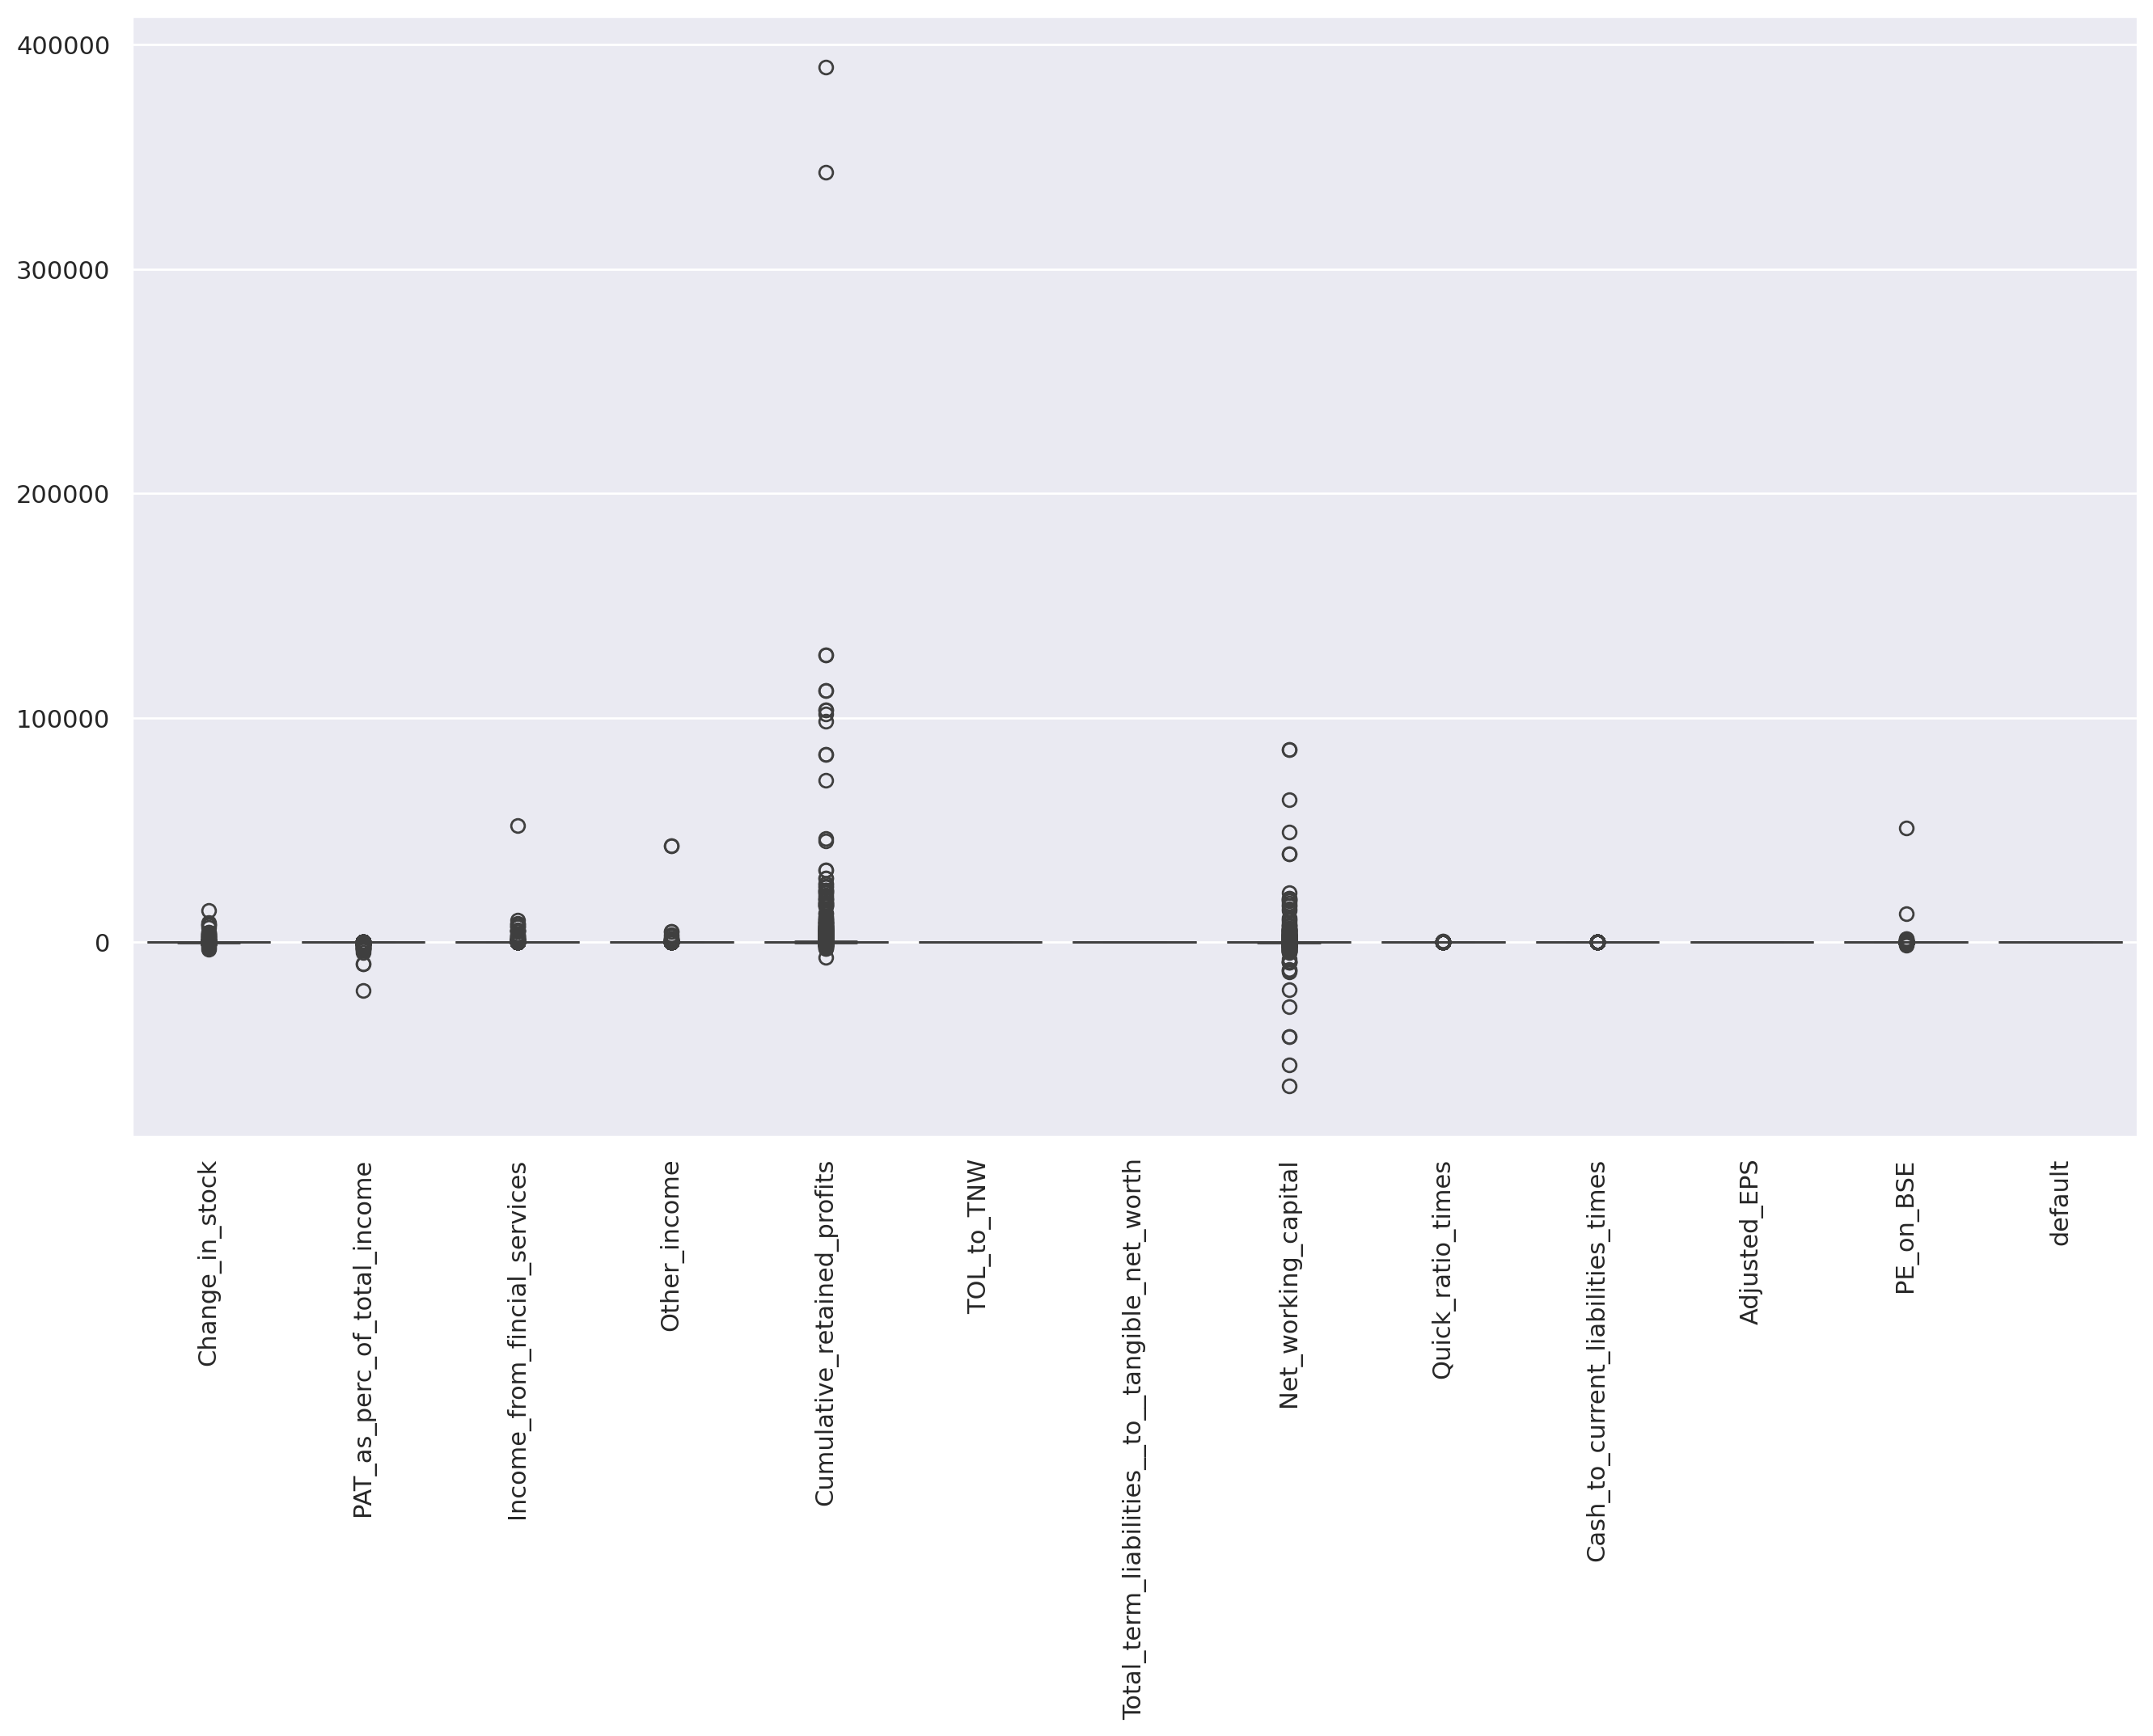

In [213]:
plt.figure(figsize=[16,9]);
sns.boxplot(data=comp_out);
plt.xticks(rotation=90);
plt.savefig('out_iqr_comp.jpg', bbox_inches='tight');

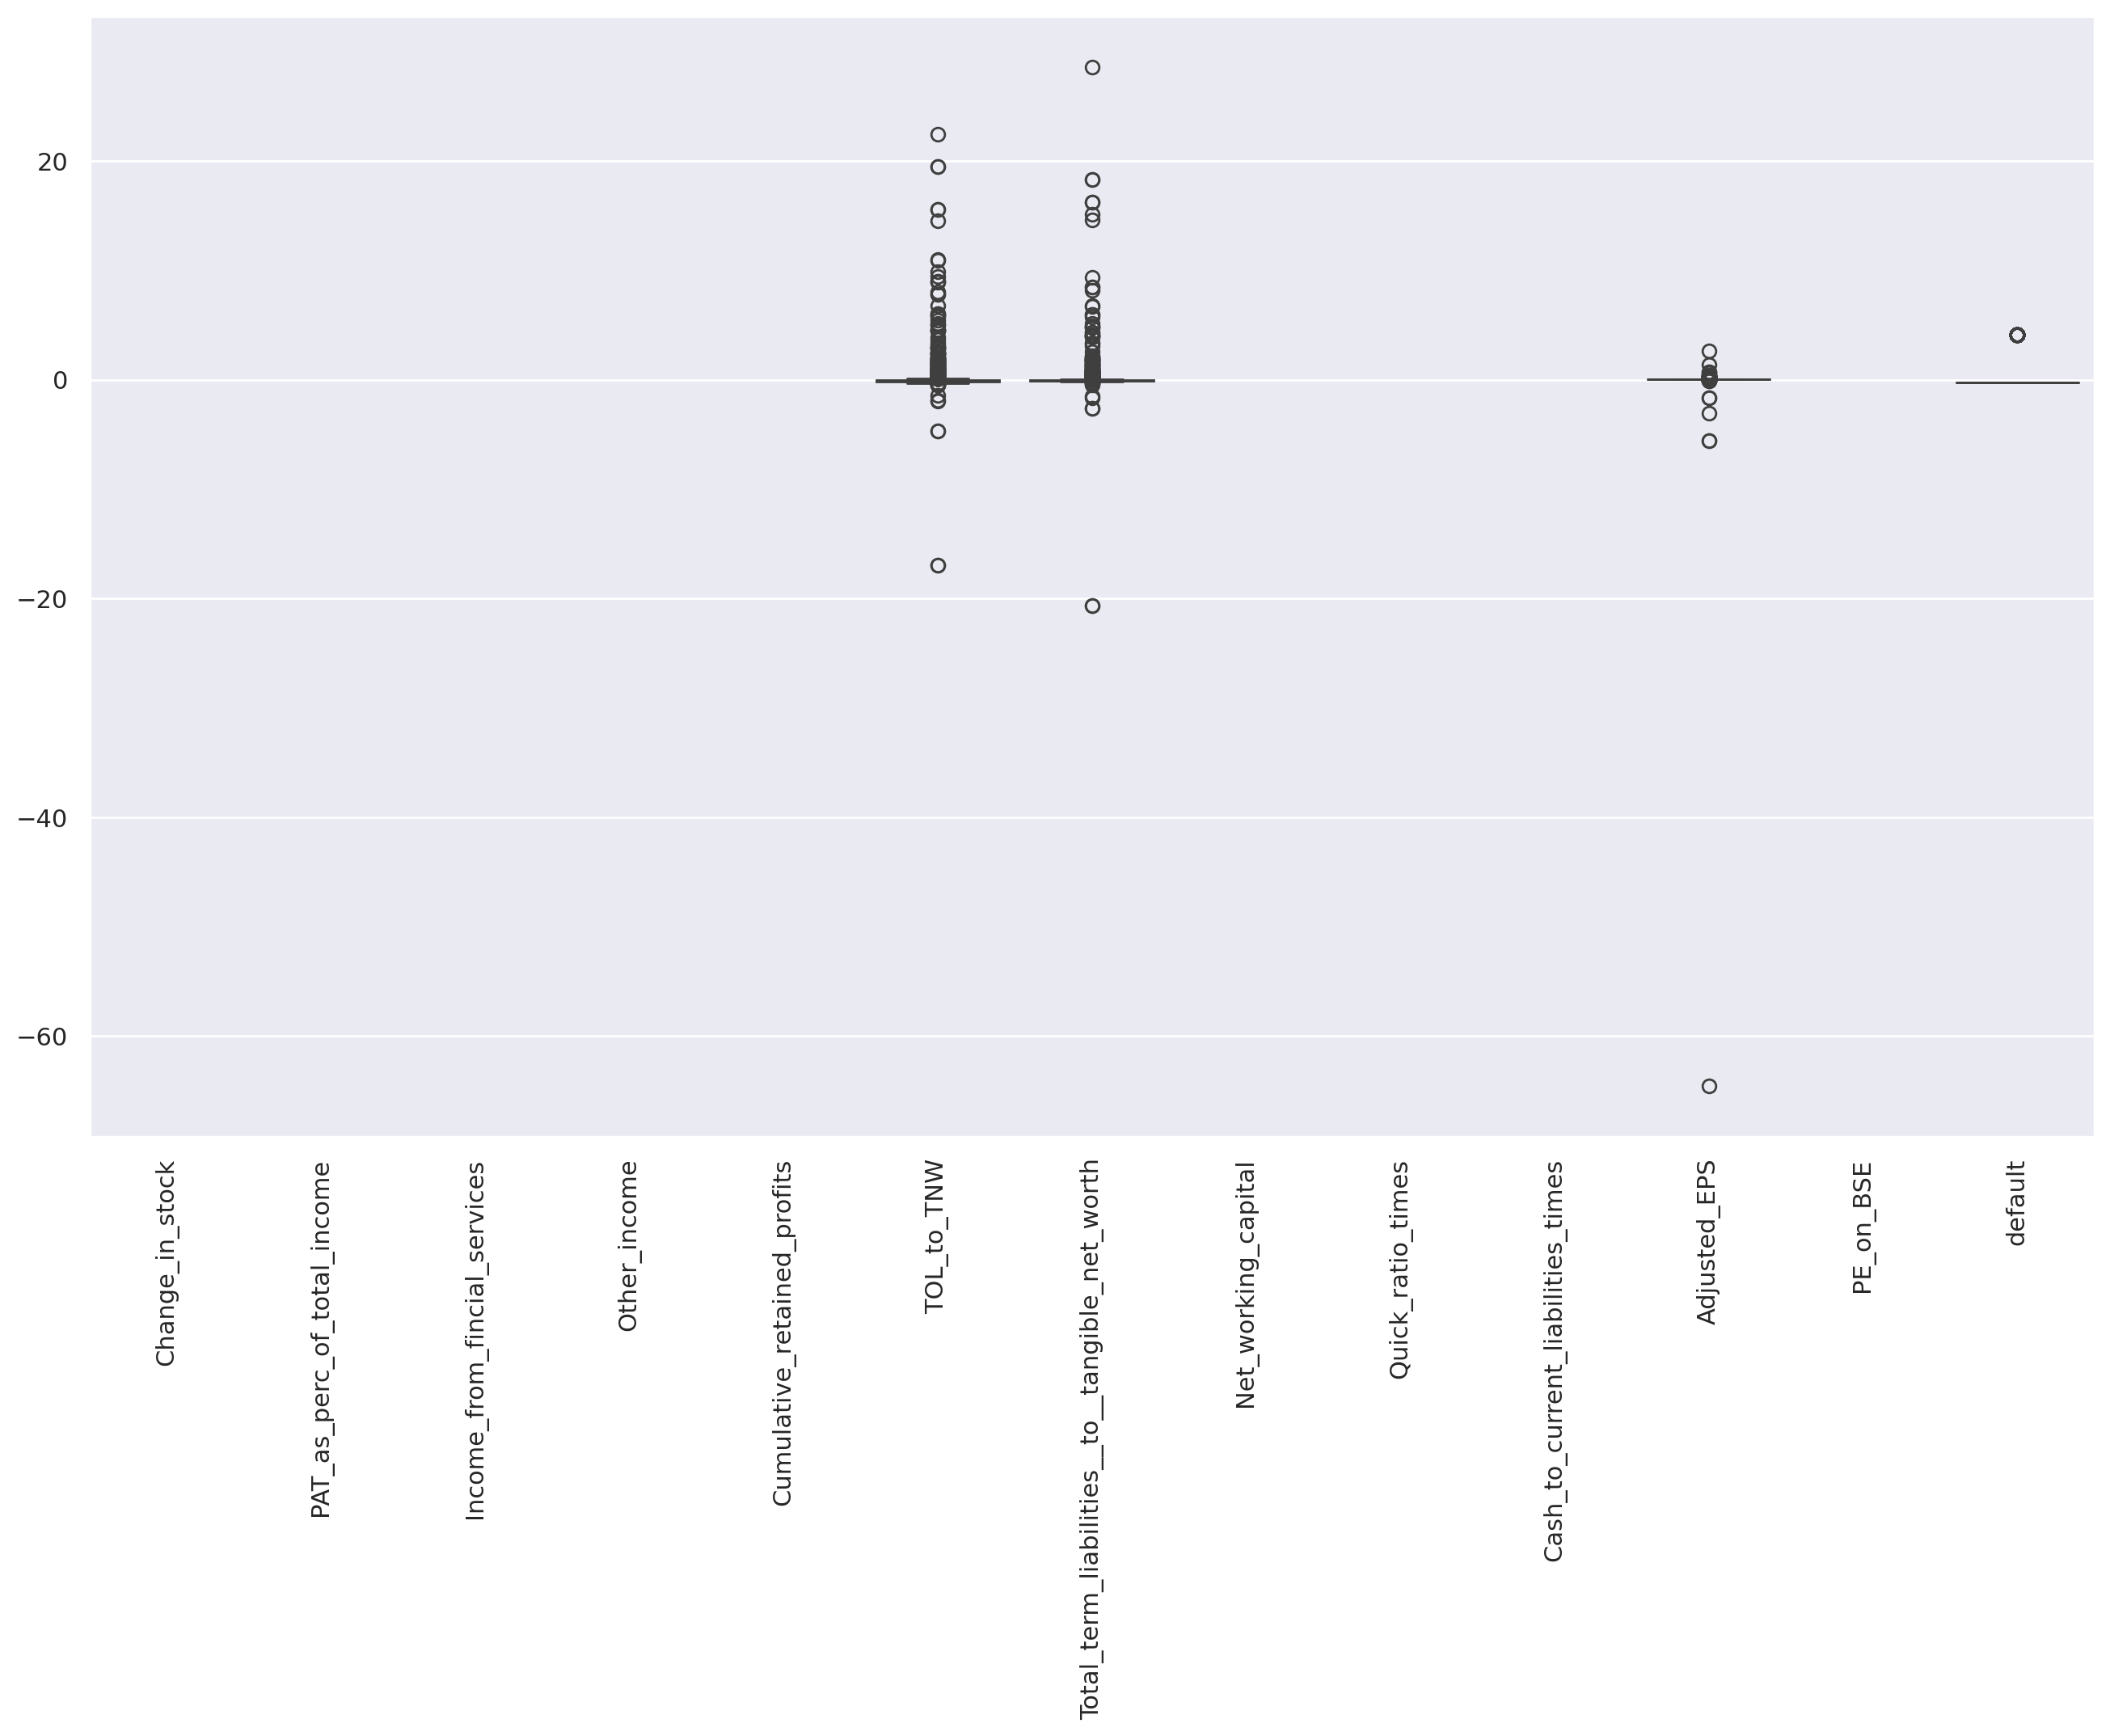

In [214]:
comp_scaled = comp.apply(zscore)

plt.figure(figsize=[16,9]);
sns.boxplot(data=comp_scaled);
plt.xticks(rotation=90);
plt.savefig('out_comp_scaled_before.jpg', bbox_inches='tight');

In [215]:
comp_out = comp_scaled.copy()

for column in comp_out.columns:
    lr,ur=remove_outlier(comp_out[column])
    comp_out[column]=np.where(comp_out[column]>ur,ur,comp_out[column])
    comp_out[column]=np.where(comp_out[column]<lr,lr,comp_out[column])



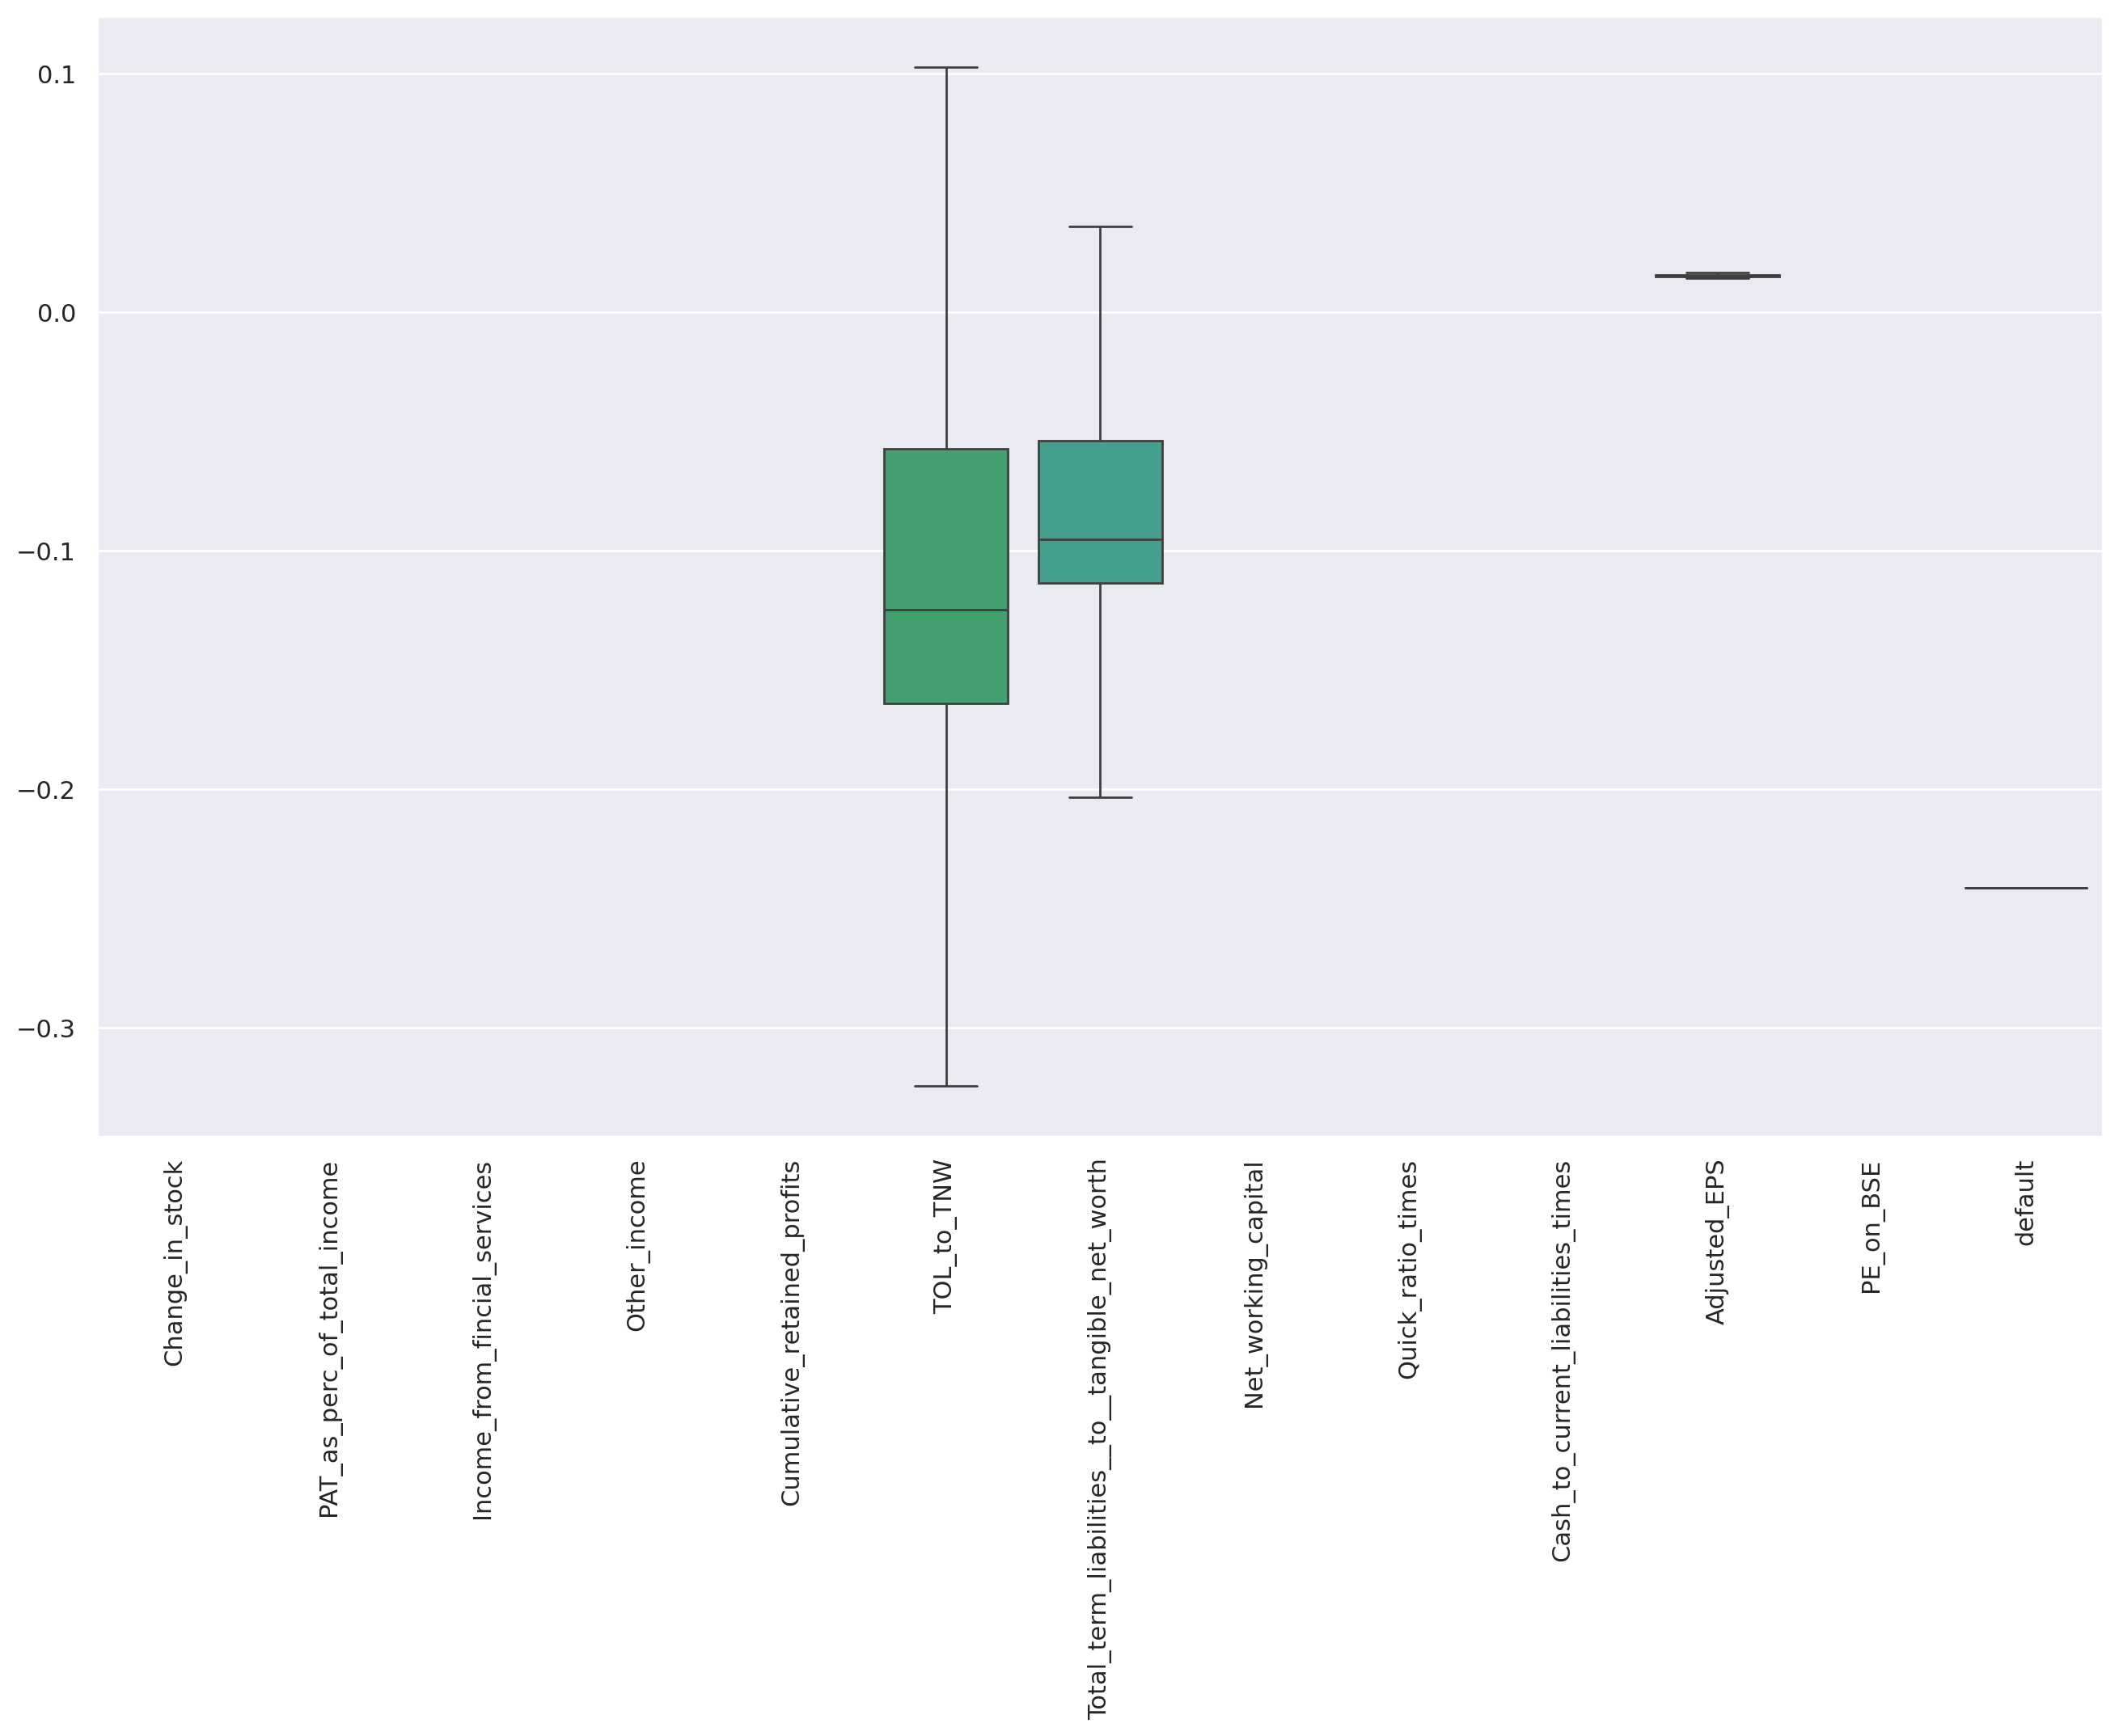

In [216]:
plt.figure(figsize=[16,9]);
sns.boxplot(data=comp_out);
plt.xticks(rotation=90);
plt.savefig('out_comp_scaled_after.jpg', bbox_inches='tight');